# C19: tracking the data in NYC, Nationwide, State, and Countries

This pulls in data from the NYC github site- it changes daily, so I can just run
this script instead of doing an excel every day. It also pulls from the Covid tracking project, both the Nationwide and the State data, in CSV format. I could have used their APIs, but the CSV was easier

I set this up to do the charts.

It's not that hard to just change the few numbers, but it's a lot easier to just run the notebook!


## UPDATES

1. Added antibody from NYC
2. Added global - some great stats there
3. Added state population dataframe- states and abbreviations- could merge it with the state cases dbase to get % incidence, etc
4. Brought in NYC zipcode db and merged with antibody!




In [1]:
#set up stuff

import pandas as pd   #just to make sure I have it in this notebook
import matplotlib.pyplot as plt  #make sure to have the plotting library
import datetime # I use this for starting dates, ending date variables
import seaborn as sns

import os  # this works for a Mac- very cool!
os.system('say "starting now"')

0

In [2]:
#seaborn
# use plt.show() to see it

In [3]:
# SET THE DATE RANGE HERE 

# set today  and yesterday in a string
tday = datetime.datetime.today().strftime('%m-%d-%Y')
yesterday = (datetime.datetime.today() + datetime.timedelta(-1)).strftime('%m-%d-%Y')

alldata = '03-01-2020'
twomonth = (datetime.datetime.today() + datetime.timedelta(-62)).strftime('%m-%d-%Y') 
onemonth =  (datetime.datetime.today() + datetime.timedelta(-32)).strftime('%m-%d-%Y') 

#this is for the end date- close to today, but 2 days off due to data lag
#lagonemonth =   (datetime.datetime.today() + datetime.timedelta(-2)).strftime('%m-%d-%Y')

print(f'Today is {tday}.')
print()
print(f'Yesterday is {yesterday}.')
print()
print('All data start date:')
print(alldata)
print()
print('Two Month start date:')
print(twomonth)
print()
print('One Month date:')
print(onemonth)
print()
#print('Two day lag for NYC data:')
#print(lagonemonth)

# GET MAC TO SPEAK ENGLISH - fairly messy to do
# parsing the string for Month
tday_month = tday.split('-')[0] # for month
datetime_object = datetime.datetime.strptime(tday_month, "%m")
month_name = datetime_object.strftime("%B")

# parsing the string for day- just keep the number
tday_day = tday.split('-')[1].lstrip('0')  #lstrip will strip leading 0
tday_year = tday.split('-')[2] 

tday_spoken = month_name +' '+ tday_day + ' ' + tday_year

os.system('say Today is')
os.system('say ' +  tday_spoken)

Today is 09-20-2020.

Yesterday is 09-19-2020.

All data start date:
03-01-2020

Two Month start date:
07-20-2020

One Month date:
08-19-2020



0

In [4]:
# define a function to tell me the size of a data frame

def saysize(df):
    print (f'The dataframe has {df.shape[0] * df.shape[1]:,} data points')
    

In [5]:
# bring in the state population CSV

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv'

df_population = pd.read_csv(url, error_bad_lines = False)

df_population['STATE'] = [ 'US', 'AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY',
 'PR']



In [6]:
# see what it looks like- states do match up- this is a good dbase to have
# could groupby region, etc
# should merge in a df with region and division names too
# also could have a DF of just states and abbreviations!

df_population

SUMLEV REGION DIVISION STATE                      NAME  POPESTIMATE2019  \
0       10      0        0    US             United States        328239523   
1       40      3        6    AL                   Alabama          4903185   
2       40      4        9    AK                    Alaska           731545   
3       40      4        8    AZ                   Arizona          7278717   
4       40      3        7    AR                  Arkansas          3017804   
5       40      4        9    CA                California         39512223   
6       40      4        8    CO                  Colorado          5758736   
7       40      1        1    CT               Connecticut          3565287   
8       40      3        5    DE                  Delaware           973764   
9       40      3        5    DC      District of Columbia           705749   
10      40      3        5    FL                   Florida         21477737   
11      40      3        5    GA                   Georgia         10617423   
12      40      4        9    HI                    Hawaii          1415872   
13      40      4        8    ID                     Idaho          1787065   
14      40      2        3    IL                  Illinois         12671821   
15      40      2        3    IN                   Indiana          6732219   
16      40      2        4    IA                      Iowa          3155070   
17      40      2        4    KS                    Kansas          2913314   
18      40      3        6    KY                  Kentucky          4467673   
19      40      3        7    LA                 Louisiana          4648794   
20      40      1        1    ME                     Maine          1344212   
21      40      3        5    MD                  Maryland          6045680   
22      40      1        1    MA             Massachusetts          6892503   
23      40      2        3    MI                  Michigan          9986857   
24      40      2        4    MN                 Minnesota          5639632   
25      40      3        6    MS               Mississippi          2976149   
26      40      2        4    MO                  Missouri          6137428   
27      40      4        8    MT                   Montana          1068778   
28      40      2        4    NE                  Nebraska          1934408   
29      40      4        8    NV                    Nevada          3080156   
30      40      1        1    NH             New Hampshire          1359711   
31      40      1        2    NJ                New Jersey          8882190   
32      40      4        8    NM                New Mexico          2096829   
33      40      1        2    NY                  New York         19453561   
34      40      3        5    NC            North Carolina         10488084   
35      40      2        4    ND              North Dakota           762062   
36      40      2        3    OH                      Ohio         11689100   
37      40      3        7    OK                  Oklahoma          3956971   
38      40      4        9    OR                    Oregon          4217737   
39      40      1        2    PA              Pennsylvania         12801989   
40      40      1        1    RI              Rhode Island          1059361   
41      40      3        5    SC            South Carolina          5148714   
42      40      2        4    SD              South Dakota           884659   
43      40      3        6    TN                 Tennessee          6829174   
44      40      3        7    TX                     Texas         28995881   
45      40      4        8    UT                      Utah          3205958   
46      40      1        1    VT                   Vermont           623989   
47      40      3        5    VA                  Virginia          8535519   
48      40      4        9    WA                Washington          7614893   
49      40      3        5    WV             West Virg

In [7]:
saysize(df_population)

The dataframe has 424 data points


In [8]:
#lets look more closely
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             53 non-null     int64  
 1   REGION             53 non-null     object 
 2   DIVISION           53 non-null     object 
 3   STATE              53 non-null     object 
 4   NAME               53 non-null     object 
 5   POPESTIMATE2019    53 non-null     int64  
 6   POPEST18PLUS2019   53 non-null     int64  
 7   PCNT_POPEST18PLUS  53 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 3.4+ KB


In [9]:
# top ten states with the lowest percentage of adults (implies the most kids)

df_population[['STATE', 'PCNT_POPEST18PLUS']].sort_values('PCNT_POPEST18PLUS').reset_index(drop = True).head(10)

STATE  PCNT_POPEST18PLUS
0    UT               71.0
1    TX               74.5
2    ID               74.9
3    AK               75.4
4    NE               75.4
5    SD               75.5
6    OK               75.9
7    KS               76.0
8    GA               76.4
9    ND               76.4

In [10]:
# top ten states with the highest percentage of minors (least kids)

( df_population[['STATE', 'PCNT_POPEST18PLUS']].sort_values('PCNT_POPEST18PLUS', ascending = False).
 reset_index(drop = True).head(10)  )

STATE  PCNT_POPEST18PLUS
0    PR               82.1
1    DC               81.8
2    VT               81.7
3    ME               81.5
4    NH               81.2
5    RI               80.7
6    MA               80.4
7    FL               80.3
8    WV               79.9
9    CT               79.6

In [11]:
#remove the US row
df_population = df_population[df_population.STATE != 'US']
df_population

SUMLEV REGION DIVISION STATE                      NAME  POPESTIMATE2019  \
1       40      3        6    AL                   Alabama          4903185   
2       40      4        9    AK                    Alaska           731545   
3       40      4        8    AZ                   Arizona          7278717   
4       40      3        7    AR                  Arkansas          3017804   
5       40      4        9    CA                California         39512223   
6       40      4        8    CO                  Colorado          5758736   
7       40      1        1    CT               Connecticut          3565287   
8       40      3        5    DE                  Delaware           973764   
9       40      3        5    DC      District of Columbia           705749   
10      40      3        5    FL                   Florida         21477737   
11      40      3        5    GA                   Georgia         10617423   
12      40      4        9    HI                    Hawaii          1415872   
13      40      4        8    ID                     Idaho          1787065   
14      40      2        3    IL                  Illinois         12671821   
15      40      2        3    IN                   Indiana          6732219   
16      40      2        4    IA                      Iowa          3155070   
17      40      2        4    KS                    Kansas          2913314   
18      40      3        6    KY                  Kentucky          4467673   
19      40      3        7    LA                 Louisiana          4648794   
20      40      1        1    ME                     Maine          1344212   
21      40      3        5    MD                  Maryland          6045680   
22      40      1        1    MA             Massachusetts          6892503   
23      40      2        3    MI                  Michigan          9986857   
24      40      2        4    MN                 Minnesota          5639632   
25      40      3        6    MS               Mississippi          2976149   
26      40      2        4    MO                  Missouri          6137428   
27      40      4        8    MT                   Montana          1068778   
28      40      2        4    NE                  Nebraska          1934408   
29      40      4        8    NV                    Nevada          3080156   
30      40      1        1    NH             New Hampshire          1359711   
31      40      1        2    NJ                New Jersey          8882190   
32      40      4        8    NM                New Mexico          2096829   
33      40      1        2    NY                  New York         19453561   
34      40      3        5    NC            North Carolina         10488084   
35      40      2        4    ND              North Dakota           762062   
36      40      2        3    OH                      Ohio         11689100   
37      40      3        7    OK                  Oklahoma          3956971   
38      40      4        9    OR                    Oregon          4217737   
39      40      1        2    PA              Pennsylvania         12801989   
40      40      1        1    RI              Rhode Island          1059361   
41      40      3        5    SC            South Carolina          5148714   
42      40      2        4    SD              South Dakota           884659   
43      40      3        6    TN                 Tennessee          6829174   
44      40      3        7    TX                     Texas         28995881   
45      40      4        8    UT                      Utah          3205958   
46      40      1        1    VT                   Vermont           623989   
47      40      3        5    VA                  Virginia          8535519   
48      40      4        9    WA                Washington          7614893   
49      40      3        5    WV             West Virginia          1792147   
50      40      2        3    WI                 Wisco

In [12]:
# make a df here that I can export to a CSV or pickle or both that is states and abbreviations

#df_state_abbreviations = df_population[['STATE','NAME']]
#df_state_abbreviations

#df_state_abbreviations.to_csv('state_abbreviations.csv', index=False)
#df_state_abbreviations.to_pickle('state_abbreviations.pickle')

In [13]:
df_population.groupby('REGION').POPESTIMATE2019.sum().reset_index()

REGION  POPESTIMATE2019
0      1         55982803
1      2         68329004
2      3        125580448
3      4         78347268
4      X          3193694

In [14]:
df_population[df_population.REGION == '4'].head()

#regions donn't make sense to me

SUMLEV REGION DIVISION STATE        NAME  POPESTIMATE2019  \
2       40      4        9    AK      Alaska           731545   
3       40      4        8    AZ     Arizona          7278717   
5       40      4        9    CA  California         39512223   
6       40      4        8    CO    Colorado          5758736   
12      40      4        9    HI      Hawaii          1415872   

    POPEST18PLUS2019  PCNT_POPEST18PLUS  
2             551562               75.4  
3            5638481               77.5  
5           30617582               77.5  
6            4499217               78.1  
12           1116004               78.8

In [15]:
df_population.REGION.value_counts()

3    17
4    13
2    12
1     9
X     1
Name: REGION, dtype: int64

In [16]:
# how to get just the top 10 most populous states (includes overall US)

df_population[['STATE', 'NAME', 'POPESTIMATE2019']]\
.sort_values('POPESTIMATE2019', ascending = False ).reset_index(drop = True).head(10)

STATE            NAME  POPESTIMATE2019
0    CA      California         39512223
1    TX           Texas         28995881
2    FL         Florida         21477737
3    NY        New York         19453561
4    PA    Pennsylvania         12801989
5    IL        Illinois         12671821
6    OH            Ohio         11689100
7    GA         Georgia         10617423
8    NC  North Carolina         10488084
9    MI        Michigan          9986857

In [17]:
# how to get just the top 10 least populous states 

df_population[['STATE', 'NAME', 'POPESTIMATE2019']]\
.sort_values('POPESTIMATE2019', ascending = True ).reset_index(drop = True).head(10)

STATE                  NAME  POPESTIMATE2019
0    WY               Wyoming           578759
1    VT               Vermont           623989
2    DC  District of Columbia           705749
3    AK                Alaska           731545
4    ND          North Dakota           762062
5    SD          South Dakota           884659
6    DE              Delaware           973764
7    RI          Rhode Island          1059361
8    MT               Montana          1068778
9    ME                 Maine          1344212

In [18]:
# would like to merge in a label for each region, like we learned in class with the restaurants
# then I would have this dbase and could monitor C19 spread better- 

df_population.groupby('REGION').POPESTIMATE2019.sum().reset_index()

REGION  POPESTIMATE2019
0      1         55982803
1      2         68329004
2      3        125580448
3      4         78347268
4      X          3193694

In [19]:
df_population.groupby(['REGION', 'DIVISION']).POPESTIMATE2019.sum().reset_index()

REGION DIVISION  POPESTIMATE2019
0      1        1         14845063
1      1        2         41137740
2      2        3         46902431
3      2        4         21426573
4      3        5         65784817
5      3        6         19176181
6      3        7         40619450
7      4        8         24854998
8      4        9         53492270
9      X        X          3193694

In [20]:
#overall population because max row is overall US
df_population.POPESTIMATE2019.max()

39512223

In [21]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SUMLEV             52 non-null     int64  
 1   REGION             52 non-null     object 
 2   DIVISION           52 non-null     object 
 3   STATE              52 non-null     object 
 4   NAME               52 non-null     object 
 5   POPESTIMATE2019    52 non-null     int64  
 6   POPEST18PLUS2019   52 non-null     int64  
 7   PCNT_POPEST18PLUS  52 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 3.7+ KB


In [22]:
#bring in the NYC C19 by age data from github

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/by-age.csv'
df_age = pd.read_csv(url, error_bad_lines = False)

df_age.head(10)

AGE_GROUP  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  CASE_COUNT  \
0      0-17     466.67              36.94        0.75        8059   
1     18-44    2682.65             281.01       21.99       90397   
2     45-64    4035.61             930.57      208.65       82974   
3     65-74    3971.15            1792.97      677.71       27763   
4       75+    4747.38            2875.82     1712.33       25967   
5  Citywide    2805.76             684.71      228.00      235649   

   HOSPITALIZED_COUNT  DEATH_COUNT  
0                 638           13  
1                9469          741  
2               19133         4290  
3               12535         4738  
4               15730         9366  
5               57507        19149

In [23]:
saysize(df_age)

The dataframe has 42 data points


In [24]:
# divide all rates by 100k to get a %
# they report rates as rate per 100k population
df_age.CASE_RATE /= 1000
df_age.HOSPITALIZED_RATE /= 1000
df_age.DEATH_RATE /= 1000
df_age.head()

AGE_GROUP  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  CASE_COUNT  \
0      0-17    0.46667            0.03694     0.00075        8059   
1     18-44    2.68265            0.28101     0.02199       90397   
2     45-64    4.03561            0.93057     0.20865       82974   
3     65-74    3.97115            1.79297     0.67771       27763   
4       75+    4.74738            2.87582     1.71233       25967   

   HOSPITALIZED_COUNT  DEATH_COUNT  
0                 638           13  
1                9469          741  
2               19133         4290  
3               12535         4738  
4               15730         9366

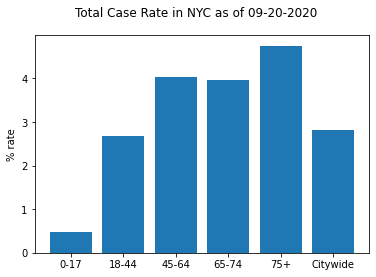

In [25]:
#Total Case RATE by age = actually all the RATES should be with the df_age

plt.bar(df_age.AGE_GROUP , df_age.CASE_RATE)
plt.suptitle(f'Total Case Rate in NYC as of {tday}')
plt.ylabel('% rate')
plt.savefig('total_case_rate_NYC_all.png', bbox_inches='tight')
plt.show()

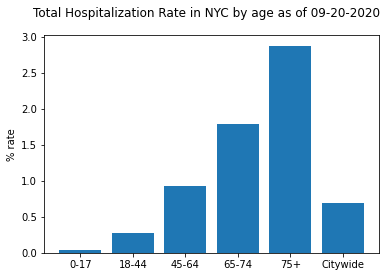

In [26]:
#Total Hospitalization RATE by age = 

plt.bar(df_age.AGE_GROUP , df_age.HOSPITALIZED_RATE)
plt.suptitle(f'Total Hospitalization Rate in NYC by age as of {tday}')
plt.ylabel('% rate')
plt.savefig('Total Hospitalization RATE by age', bbox_inches='tight')
plt.show()

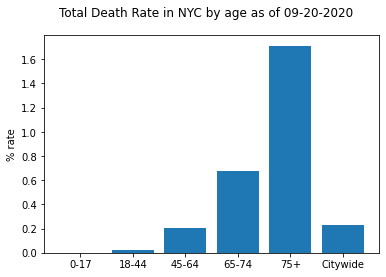

In [27]:
#Total Death RATE by age = 

plt.bar(df_age.AGE_GROUP , df_age.DEATH_RATE)
plt.suptitle(f'Total Death Rate in NYC by age as of {tday}')
plt.ylabel('% rate')
plt.savefig('Total Death Rate in NYC by age', bbox_inches='tight')

In [28]:
# So I add a df that takes away the Citywide data

df_no_citywide = df_age[df_age.AGE_GROUP != 'Citywide']  #this just takes the one row away
df_no_citywide.head(10)

AGE_GROUP  CASE_RATE  HOSPITALIZED_RATE  DEATH_RATE  CASE_COUNT  \
0      0-17    0.46667            0.03694     0.00075        8059   
1     18-44    2.68265            0.28101     0.02199       90397   
2     45-64    4.03561            0.93057     0.20865       82974   
3     65-74    3.97115            1.79297     0.67771       27763   
4       75+    4.74738            2.87582     1.71233       25967   

   HOSPITALIZED_COUNT  DEATH_COUNT  
0                 638           13  
1                9469          741  
2               19133         4290  
3               12535         4738  
4               15730         9366

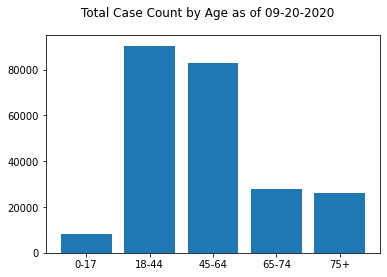

In [29]:
#Total Case Count by age

graph = 'Total Case Count by Age'

plt.bar(df_no_citywide.AGE_GROUP , df_no_citywide.CASE_COUNT)
plt.suptitle(f'{graph} as of {tday}')
plt.savefig(graph, bbox_inches='tight')

#here Citywide makes no sense on a chart

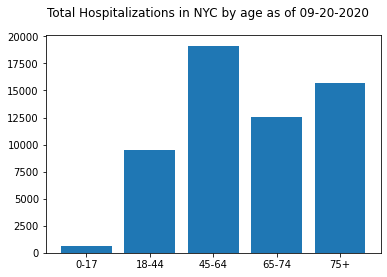

In [30]:
# Total Hospitalizations in NYC by age

graph = 'Total Hospitalizations in NYC by age'

plt.bar(df_no_citywide.AGE_GROUP , df_no_citywide.HOSPITALIZED_COUNT)
plt.suptitle(f'{graph} as of {tday}')
plt.savefig(graph, bbox_inches='tight')

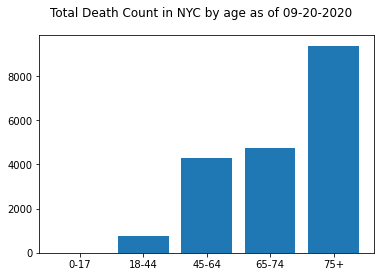

In [31]:
# Total Death Count in NYC by age as of tday

graph = 'Total Death Count in NYC by age'

plt.bar(df_no_citywide.AGE_GROUP , df_no_citywide.DEATH_COUNT)
plt.suptitle(f'{graph} as of {tday}')

plt.savefig(graph, bbox_inches='tight')

In [32]:
# just looking at the df
df_no_citywide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE_GROUP           5 non-null      object 
 1   CASE_RATE           5 non-null      float64
 2   HOSPITALIZED_RATE   5 non-null      float64
 3   DEATH_RATE          5 non-null      float64
 4   CASE_COUNT          5 non-null      int64  
 5   HOSPITALIZED_COUNT  5 non-null      int64  
 6   DEATH_COUNT         5 non-null      int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 320.0+ bytes


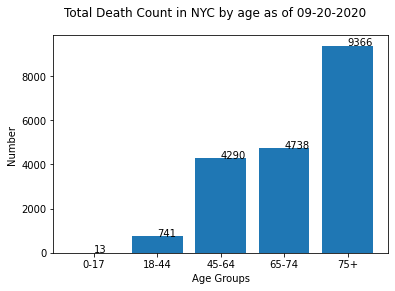

In [33]:
# a way to label the values in a bar chart- for death count- to show the actual numbers

graph = 'Total Death Count in NYC by age'

n = df_no_citywide.AGE_GROUP
s = df_no_citywide.DEATH_COUNT

line = plt.bar(n,s)

plt.xlabel('Age Groups')
plt.ylabel("Number")
plt.suptitle(f'{graph} as of {tday}')

for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]))

plt.show()

# plt.savefig(graph, bbox_inches='tight')

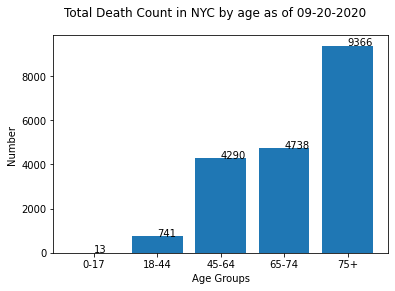

In [34]:
# try with x, y instead

# a way to label the values in a bar chart- for death count- to show the actual numbers

graph = 'Total Death Count in NYC by age'

x = df_no_citywide.AGE_GROUP
y = df_no_citywide.DEATH_COUNT

line = plt.bar(x,y)

plt.xlabel('Age Groups')
plt.ylabel("Number")
plt.suptitle(f'{graph} as of {tday}')

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]))

plt.show()
# plt.savefig(graph, bbox_inches='tight')

In [35]:
#bring in the boro data from github

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/boro.csv'
df_boro = pd.read_csv(url, error_bad_lines = False)

# divide all rates by 100k to get a %
df_boro.COVID_CASE_RATE /= 1000
df_boro.head()

df_boro.head(10)

BOROUGH_GROUP  COVID_CASE_COUNT  COVID_CASE_RATE
0      The Bronx             43252          2.94087
1       Brooklyn             51931          1.91616
2      Manhattan             23620          1.25837
3         Queens             58574          2.34637
4  Staten Island             12937          2.57239
5       Citywide            190408              NaN

In [36]:
# So I add a df that takes away the Citywide data

df_boro2 = df_boro[df_boro.BOROUGH_GROUP != 'Citywide']  #this just takes the one row away
df_boro2.head(10)

BOROUGH_GROUP  COVID_CASE_COUNT  COVID_CASE_RATE
0      The Bronx             43252          2.94087
1       Brooklyn             51931          1.91616
2      Manhattan             23620          1.25837
3         Queens             58574          2.34637
4  Staten Island             12937          2.57239

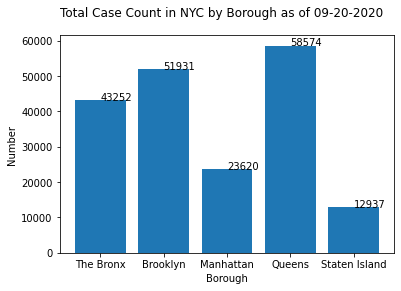

In [37]:
#Total Case Count in NYC by Borough

graph = 'Total Case Count in NYC by Borough'

x = df_boro2.BOROUGH_GROUP
y = df_boro2.COVID_CASE_COUNT

line = plt.bar(x,y)

plt.xlabel('Borough')
plt.ylabel("Number")
plt.suptitle(f'{graph} as of {tday}')

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]))

plt.show()
# plt.savefig(graph, bbox_inches='tight')

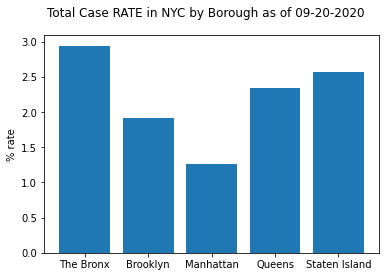

In [38]:
# Total Case RATE in NYC by Borough

graph = 'Total Case RATE in NYC by Borough'

plt.bar(df_boro2.BOROUGH_GROUP , df_boro2.COVID_CASE_RATE)
plt.suptitle(f'{graph} as of {tday}')
plt.ylabel('% rate')
plt.savefig(graph, bbox_inches='tight')

In [39]:
#bring in the citywide case, hosp, death from github, show last week

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv'
df_city = pd.read_csv(url, error_bad_lines = False)

df_city.tail(7).sort_values('DATE_OF_INTEREST', ascending = False)

DATE_OF_INTEREST  CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
203       09/19/2020           4                   0            0   
202       09/18/2020          55                   3            1   
201       09/17/2020         166                   5            1   
200       09/16/2020         260                   8            6   
199       09/15/2020         264                   7            1   
198       09/14/2020         350                   7            4   
197       09/13/2020         240                   6            3   

     CASE_COUNT_7DAY_AVG  INCOMPLETE  
203                191.0      6000.0  
202                217.0      6000.0  
201                250.0      6000.0  
200                270.0      6000.0  
199                280.0      6000.0  
198                295.0      6000.0  
197                275.0      6000.0

In [40]:
# Tell Pandas that the DATE_OF_INTEREST column contains a DATETIME
df_city.DATE_OF_INTEREST = pd.to_datetime(df_city.DATE_OF_INTEREST)
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_OF_INTEREST     204 non-null    datetime64[ns]
 1   CASE_COUNT           204 non-null    int64         
 2   HOSPITALIZED_COUNT   204 non-null    int64         
 3   DEATH_COUNT          204 non-null    int64         
 4   CASE_COUNT_7DAY_AVG  198 non-null    float64       
 5   INCOMPLETE           7 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 9.7 KB


In [41]:
saysize(df_city)

The dataframe has 1,224 data points


As of 09-20-2020, in NYC, there has been:

235,648 total cases
55,970 hospitalizations
19,110 deaths


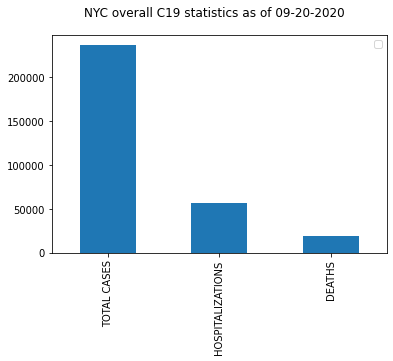

In [42]:
# High level NYC summary- print and chart

graph = 'NYC overall C19 statistics'
nyc_stats = { 'TOTAL CASES': int(df_city.CASE_COUNT.sum()),
              'HOSPITALIZATIONS' : int(df_city.HOSPITALIZED_COUNT.sum()),
              'DEATHS' : int(df_city.DEATH_COUNT.sum())}

df_nyc_stats = pd.DataFrame.from_dict(nyc_stats, orient = 'index')

df_nyc_stats.plot(kind = 'bar')
plt.suptitle(f'{graph} as of {tday}')
plt.legend('')
plt.show

print(f'As of {tday}, in NYC, there has been:')
print()
print(f'{int(df_city.CASE_COUNT.sum()):,} total cases')
print(f'{int(df_city.HOSPITALIZED_COUNT.sum()):,} hospitalizations')
print(f'{int(df_city.DEATH_COUNT.sum()):,} deaths')

In [43]:
df_nyc_stats

0
TOTAL CASES       235648
HOSPITALIZATIONS   55970
DEATHS             19110

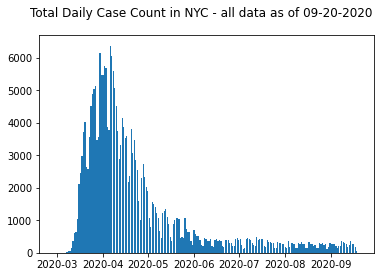

In [44]:
#Total Daily Case Count in NYC - all time data

graph = 'Total Daily Case Count in NYC - all data'

plt.bar(df_city.DATE_OF_INTEREST, df_city.CASE_COUNT)
plt.suptitle(f'{graph} as of {tday}')
plt.savefig(graph, bbox_inches='tight')

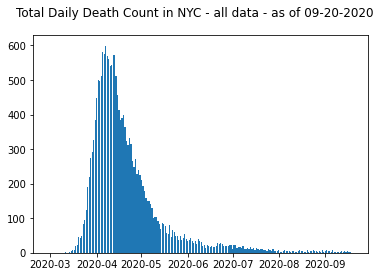

In [45]:
# Total Daily Death Count in NYC - all data

graph = 'Total Daily Death Count in NYC - all data'

plt.bar(df_city.DATE_OF_INTEREST, df_city.DEATH_COUNT)
plt.suptitle(f'{graph} - as of {tday}')
plt.savefig(graph, bbox_inches='tight')

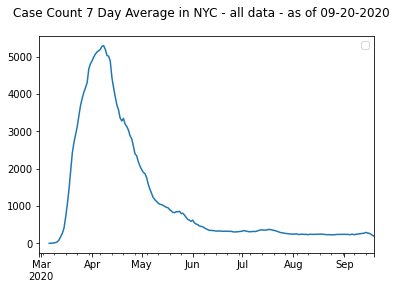

In [46]:
# FINALLY, HOW TO plot a df simple line chart

graph = 'Case Count 7 Day Average in NYC - all data'

df_city.plot(kind = 'line' , x = 'DATE_OF_INTEREST', y = 'CASE_COUNT_7DAY_AVG' )
plt.xlabel('')
plt.legend('')
plt.suptitle(f'{graph} - as of {tday}')
plt.show()

In [47]:
# just looking at the data types
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_OF_INTEREST     204 non-null    datetime64[ns]
 1   CASE_COUNT           204 non-null    int64         
 2   HOSPITALIZED_COUNT   204 non-null    int64         
 3   DEATH_COUNT          204 non-null    int64         
 4   CASE_COUNT_7DAY_AVG  198 non-null    float64       
 5   INCOMPLETE           7 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 9.7 KB


In [48]:
# Define a function chart() to make graphs for set date ranges 
# could eventually make a list of lists to just chart multiple things together
# this has no label for y axis units- add that later
# df needs to be set to the one you want to chart

def chart(df, graph, graphx, graphy, start_date, end_date):
    plt.bar(df[(df[graphx] >= start_date) & (df[graphx] <=  tday)][graphx], 
         df[(df[graphx] >= start_date) & (df[graphx] <= end_date)][graphy])
    plt.suptitle(graph)
    plt.title(f'through {end_date}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.savefig(graph, bbox_inches='tight')

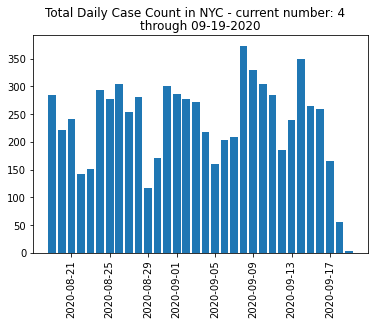

In [49]:
# Total Daily Case Count in NYC - current month

df = df_city
graph = 'Total Daily Case Count in NYC - current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].CASE_COUNT.sum()):,d}'
graphx = 'DATE_OF_INTEREST'
graphy = 'CASE_COUNT'
start_date = onemonth
end_date = yesterday

chart(df, graph, graphx, graphy, start_date, end_date)

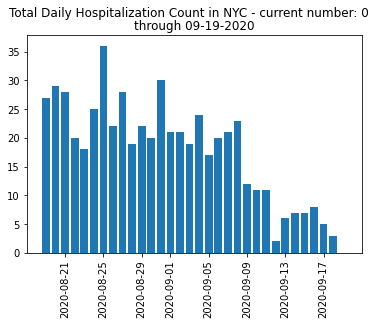

In [50]:
#Total Daily Hospitalization Count in NYC - current month

df = df_city

graph = 'Total Daily Hospitalization Count in NYC - current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].HOSPITALIZED_COUNT.sum()):,d}'
graphx = 'DATE_OF_INTEREST'
graphy = 'HOSPITALIZED_COUNT'
start_date = onemonth
end_date = yesterday

chart(df, graph, graphx, graphy, start_date, end_date)

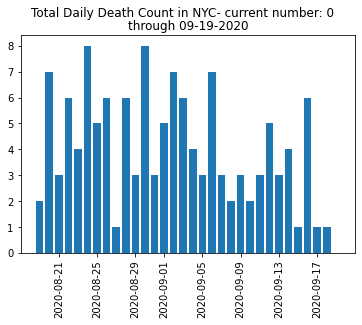

In [51]:
#Total Daily Death Count in NYC - current month

df = df_city

graph = 'Total Daily Death Count in NYC- current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].DEATH_COUNT.sum()):,d}'

graphx = 'DATE_OF_INTEREST'
graphy = 'DEATH_COUNT'
start_date = onemonth
end_date = yesterday

chart(df, graph, graphx, graphy, start_date, end_date)

In [52]:
#TWO MONTH CHARTS

print(twomonth)

07-20-2020


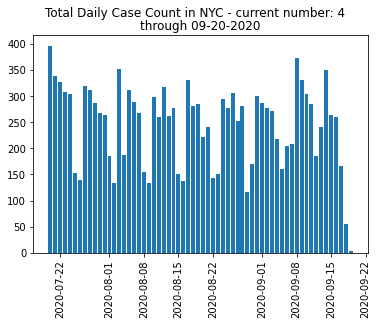

In [53]:
# Total Daily Case Count in NYC - 2 month chart

df = df_city

graph = 'Total Daily Case Count in NYC - current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].CASE_COUNT.sum()):,d}'
graphx = 'DATE_OF_INTEREST'
graphy = 'CASE_COUNT'
start_date = twomonth
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)

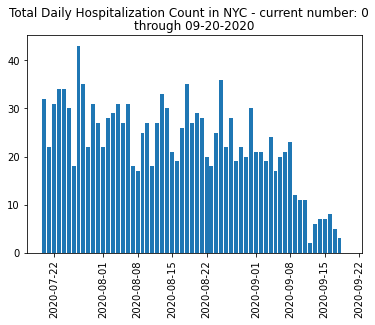

In [54]:
#Total Daily Hospitalization Count in NYC - 2 month chart

df = df_city

graph = 'Total Daily Hospitalization Count in NYC - current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].HOSPITALIZED_COUNT.sum()):,d}'
graphx = 'DATE_OF_INTEREST'
graphy = 'HOSPITALIZED_COUNT'
start_date = twomonth
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)

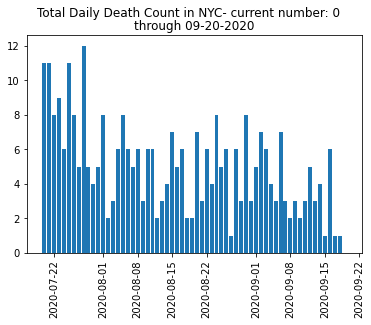

In [55]:
#Total Daily Death Count in NYC - 2 month chart

df = df_city

graph = 'Total Daily Death Count in NYC- current number: '\
+ f'{( df_city[df_city.DATE_OF_INTEREST == yesterday].DEATH_COUNT.sum()):,d}'

graphx = 'DATE_OF_INTEREST'
graphy = 'DEATH_COUNT'
start_date = twomonth
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)

In [56]:
# NEXT STEP: Nationwide data
#bring in the data, first just the nationwide data for cases, tests graph
os.system('say "getting nationwide data now"')

url = 'https://covidtracking.com/api/v1/us/daily.csv'
df_nation = pd.read_csv(url, error_bad_lines = False)

df_nation.head(10)

date  states  positive  negative  pending  hospitalizedCurrently  \
0  20200920      56   6770401  85299596  13192.0                28615.0   
1  20200919      56   6733110  84510700  13217.0                29025.0   
2  20200918      56   6688827  83566093  11805.0                29492.0   
3  20200917      56   6641341  82709952  11768.0                29900.0   
4  20200916      56   6597783  81976741  10587.0                30278.0   
5  20200915      56   6557762  81351140   4966.0                30327.0   
6  20200914      56   6522317  80701552  10494.0                29867.0   
7  20200913      56   6488453  80329804  10467.0                29816.0   
8  20200912      56   6454000  79717367  10403.0                30662.0   
9  20200911      56   6411913  78910645  10813.0                31421.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                395197.0          6012.0          19281.0   
1                394687.0          6059.0          19243.0   
2                393596.0          6175.0          19163.0   
3                392173.0          6277.0          19057.0   
4                390624.0          6308.0          18961.0   
5                389107.0          6310.0          18847.0   
6                387616.0          6233.0          18748.0   
7                386679.0          6234.0          18692.0   
8                386087.0          6454.0          18648.0   
9                385011.0          6379.0          18549.0   

   onVentilatorCurrently  ...  totalTestResults          lastModified total  \
0                 1597.0  ...          95108559  2020-09-20T00:00:00Z     0   
1                 1579.0  ...          94211463  2020-09-19T00:00:00Z     0   
2                 1605.0  ...          93150052  2020-09-18T00:00:00Z     0   
3                 1658.0  ...          92163649  2020-09-17T00:00:00Z     0   
4                 1651.0  ...          91321131  2020-09-16T00:00:00Z     0   
5                 1572.0  ...          90591294  2020-09-15T00:00:00Z     0   
6                 1507.0  ...          89864549  2020-09-14T00:00:00Z     0   
7                 1562.0  ...          89418713  2020-09-13T00:00:00Z     0   
8                 1619.0  ...          88692398  2020-09-12T00:00:00Z     0   
9                 1715.0  ...          87789009  2020-09-11T00:00:00Z     0   

   posNeg  deathIncrease  hospitalizedIncrease negativeIncrease  \
0       0            324                   510           788896   
1       0            737                  1091           944607   
2       0            901                  1423           856141   
3       0            863                  1549           733211   
4       0           1200                  1517           625601   
5       0           1031                  1491           649588   
6       0            404                   937           371748   
7       0            389                   592           612437   
8       0            810                  1076           806722   
9       0           1018                  1553           721070   

   positiveIncrease  totalTestResultsIncrease  \
0             37291                    897096   
1             44283                   1061411   
2             47486                    986403   
3             43558                    842518   
4             40021                    729837   
5             35445                    726745   
6             33864                    445836   
7             34453                    726315   
8             42087                    903389   
9             44927                    826378   

                                       hash  
0  5e96140b80f452537576f4734c93817a98796596  
1  ae9a18001f8558705a0f527f8158d4ce45123aa8  
2  574a4befe034b898cb09195b2a88bf9e4a61ed28  
3  d434b85d9699a6fcb674325367b93c530235f619  
4  71aceb9e5948e54502fddaec68839b3412d32677  
5  f2677316a97cf7cb9f8399dc78287b93f2ff5a8d  
6  e989dd0af71a0fc3fcae97d34

In [57]:
df_nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      243 non-null    int64  
 1   states                    243 non-null    int64  
 2   positive                  243 non-null    int64  
 3   negative                  243 non-null    int64  
 4   pending                   201 non-null    float64
 5   hospitalizedCurrently     188 non-null    float64
 6   hospitalizedCumulative    201 non-null    float64
 7   inIcuCurrently            179 non-null    float64
 8   inIcuCumulative           180 non-null    float64
 9   onVentilatorCurrently     180 non-null    float64
 10  onVentilatorCumulative    173 non-null    float64
 11  recovered                 180 non-null    float64
 12  dateChecked               243 non-null    object 
 13  death                     224 non-null    float64
 14  hospitaliz

In [58]:
# just looking at the df
df_nation.head()

date  states  positive  negative  pending  hospitalizedCurrently  \
0  20200920      56   6770401  85299596  13192.0                28615.0   
1  20200919      56   6733110  84510700  13217.0                29025.0   
2  20200918      56   6688827  83566093  11805.0                29492.0   
3  20200917      56   6641341  82709952  11768.0                29900.0   
4  20200916      56   6597783  81976741  10587.0                30278.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                395197.0          6012.0          19281.0   
1                394687.0          6059.0          19243.0   
2                393596.0          6175.0          19163.0   
3                392173.0          6277.0          19057.0   
4                390624.0          6308.0          18961.0   

   onVentilatorCurrently  ...  totalTestResults          lastModified total  \
0                 1597.0  ...          95108559  2020-09-20T00:00:00Z     0   
1                 1579.0  ...          94211463  2020-09-19T00:00:00Z     0   
2                 1605.0  ...          93150052  2020-09-18T00:00:00Z     0   
3                 1658.0  ...          92163649  2020-09-17T00:00:00Z     0   
4                 1651.0  ...          91321131  2020-09-16T00:00:00Z     0   

   posNeg  deathIncrease  hospitalizedIncrease negativeIncrease  \
0       0            324                   510           788896   
1       0            737                  1091           944607   
2       0            901                  1423           856141   
3       0            863                  1549           733211   
4       0           1200                  1517           625601   

   positiveIncrease  totalTestResultsIncrease  \
0             37291                    897096   
1             44283                   1061411   
2             47486                    986403   
3             43558                    842518   
4             40021                    729837   

                                       hash  
0  5e96140b80f452537576f4734c93817a98796596  
1  ae9a18001f8558705a0f527f8158d4ce45123aa8  
2  574a4befe034b898cb09195b2a88bf9e4a61ed28  
3  d434b85d9699a6fcb674325367b93c530235f619  
4  71aceb9e5948e54502fddaec68839b3412d32677  

[5 rows x 25 columns]

In [59]:
saysize(df_nation)

The dataframe has 6,075 data points


In [60]:
#change to date here- on last modified row

df_nation.lastModified = pd.to_datetime(df_nation.lastModified)

In [61]:
# looking at the types- it should change lastModified to datetime
df_nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   date                      243 non-null    int64              
 1   states                    243 non-null    int64              
 2   positive                  243 non-null    int64              
 3   negative                  243 non-null    int64              
 4   pending                   201 non-null    float64            
 5   hospitalizedCurrently     188 non-null    float64            
 6   hospitalizedCumulative    201 non-null    float64            
 7   inIcuCurrently            179 non-null    float64            
 8   inIcuCumulative           180 non-null    float64            
 9   onVentilatorCurrently     180 non-null    float64            
 10  onVentilatorCumulative    173 non-null    float64            
 11  recovered          

In [62]:
# make a new row called 'percentPositiveTest' which divides by total test results

df_nation['percentPositiveTest'] = (df_nation.positive / df_nation.totalTestResults) * 100

Text(20.625, 0.5, 'percent positive')

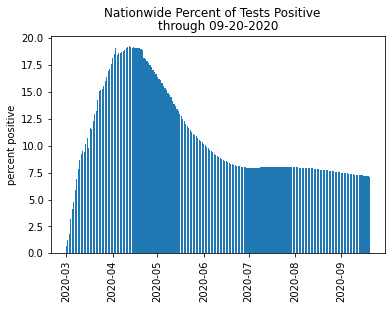

In [63]:
#Percent positive tests nationwide - all data

df = df_nation
graph = 'Nationwide Percent of Tests Positive'

graphx = 'lastModified'
graphy = 'percentPositiveTest'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('percent positive')

In [64]:
# get total positive in nation then use it in the str below to display in chart
# with strings, you have to keep building them to keep syntax correct
# in this case, the :,d at the end formats it cleanly

f'{( df_nation[df_nation.lastModified == yesterday].positive.sum()):,d}'

'6,733,110'

Text(36.625, 0.5, 'millions')

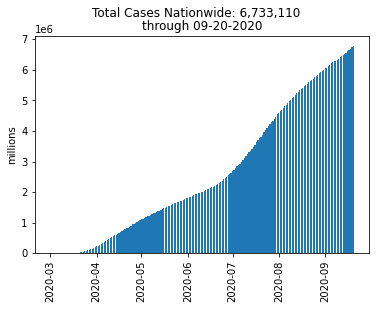

In [65]:
#Total Cases Nationwide - all data

df = df_nation
graph = 'Total Cases Nationwide: '+ f'{( df_nation[df_nation.lastModified == yesterday].positive.sum()):,d}'
graphx = 'lastModified'
graphy = 'positive'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('millions')

Text(36.625, 0.5, 'tens of millions')

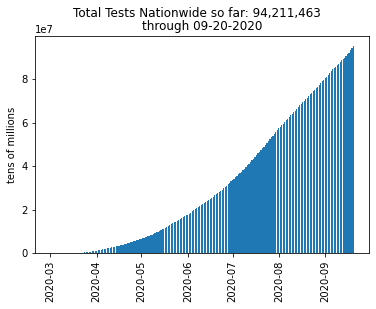

In [66]:
# Total Tests Nationwide

df = df_nation
graph = ('Total Tests Nationwide so far: ' 
         + f'{( df_nation[df_nation.lastModified == yesterday].totalTestResults.max()):,d}')
graphx = 'lastModified'
graphy = 'totalTestResults'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('tens of millions')

Text(11.625, 0.5, '')

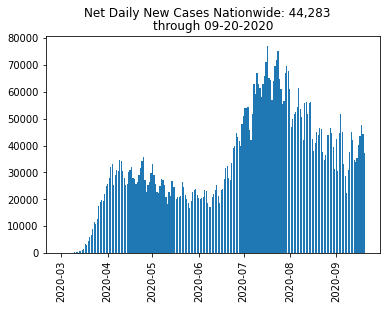

In [67]:
#Total Net Daily Cases Nationwide

df = df_nation
graph = ('Net Daily New Cases Nationwide: ' 
         + f'{( df_nation[df_nation.lastModified == yesterday].positiveIncrease.sum()):,d}')
graphx = 'lastModified'
graphy = 'positiveIncrease'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('')

Text(17.75, 0.5, '')

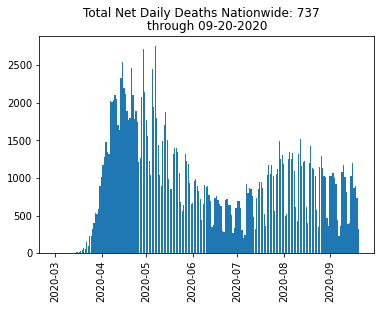

In [68]:
# Total Net Daily Deaths Nationwide

df = df_nation
graph = ('Total Net Daily Deaths Nationwide: ' 
         + f'{( df_nation[df_nation.lastModified == yesterday].deathIncrease.sum()):,d}')
graphx = 'lastModified'
graphy = 'deathIncrease'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('')

Text(11.625, 0.5, '')

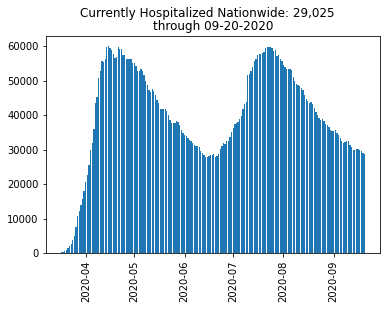

In [69]:
# Currently Hospitalized Nationwide  - this one was an integer, so had to convert it in the f string
# dealing with strings can be complicated, but satisfying when you solve a problem

graph = ('Currently Hospitalized Nationwide: ' 
         + f'{( int(df_nation[df_nation.lastModified == yesterday].hospitalizedCurrently.sum())):,d}')

df = df_nation
graphx = 'lastModified'
graphy = 'hospitalizedCurrently'
start_date = alldata
end_date = tday

chart(df, graph, graphx, graphy, start_date, end_date)
plt.ylabel('')

# State by State data

In [70]:
# state by state data
#bring in the data, first just the nationwide data for cases, tests graph
os.system('say "getting state by state data now"')

url = 'https://covidtracking.com/api/v1/states/daily.csv'
df_states = pd.read_csv(url, error_bad_lines = False)

df_states.head(10)

date state  positive    negative  pending  totalTestResults  \
0  20200920    AK    7767.0    419158.0      NaN          426925.0   
1  20200920    AL  144962.0    923366.0      NaN         1054017.0   
2  20200920    AR   75723.0    810294.0      NaN          883984.0   
3  20200920    AS       0.0      1571.0      NaN            1571.0   
4  20200920    AZ  214018.0   1169906.0      NaN         1383924.0   
5  20200920    CA  778400.0  12744758.0      NaN        13523158.0   
6  20200920    CO   64356.0    761346.0      NaN         1195379.0   
7  20200920    CT   55527.0   1366621.0      NaN         1422148.0   
8  20200920    DC   14955.0    340189.0      NaN          355144.0   
9  20200920    DE   19566.0    251855.0      NaN          271421.0   

   hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
0                   43.0                     NaN             NaN   
1                  780.0                 16227.0             NaN   
2                  404.0                  4967.0           212.0   
3                    NaN                     NaN             NaN   
4                  472.0                 21876.0           120.0   
5                 3441.0                     NaN           925.0   
6                  237.0                  7357.0             NaN   
7                   77.0                 11447.0             NaN   
8                   86.0                     NaN            25.0   
9                   60.0                     NaN            14.0   

   inIcuCumulative  ...    posNeg  deathIncrease  hospitalizedIncrease  \
0              NaN  ...    426925              0                     0   
1           1643.0  ...   1068328              0                     0   
2              NaN  ...    886017              8                     4   
3              NaN  ...      1571              0                     0   
4              NaN  ...   1383924              9                    -6   
5              NaN  ...  13523158             75                     0   
6              NaN  ...    825702              0                    10   
7              NaN  ...   1422148              0                     0   
8              NaN  ...    355144              1                     0   
9              NaN  ...    271421              0                     0   

                                       hash commercialScore  \
0  d939ccbfc0a45044ede4b81384f1a41520b50f87               0   
1  1068eacf936cf84dc1349d453d2454fa7e85ffa1               0   
2  7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0               0   
3  3e8d4473820fe86e6e0d374bbcf084d1a4283566               0   
4  7389ef357a7c4b8e64ccabb01a376c6e67e87d75               0   
5  fd88a82366b400053d994227a86f175bbe8112b4               0   
6  53538ff2d6fb07c9a2a5be3d98b592c35770bf7b               0   
7  c23b8f09fd8aeea712d8e464d7f2456f8097e929               0   
8  64545b24e233cc19e1139412d3c0df143abd32c4               0   
9  a7697ebb4a222e020c6d40a7b15fcd80eafacfcc               0   

  negativeRegularScore negativeScore  positiveScore  score grade  
0                    0             0              0      0   NaN  
1                    0             0              0      0   NaN  
2                    0             0              0      0   NaN  
3                    0             0              0      0   NaN  
4                    0             0              0      0   NaN  
5                    0             0              0      0   NaN  
6                    0             0              0      0   NaN  
7                    0             0              0      0   NaN  
8                    0             0              0      0   NaN  
9                    0             0              0      0   NaN  

[10 rows x 54 columns]

In [71]:
# just to look at the types
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11242 entries, 0 to 11241
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         11242 non-null  int64  
 1   state                        11242 non-null  object 
 2   positive                     11143 non-null  float64
 3   negative                     11005 non-null  float64
 4   pending                      1299 non-null   float64
 5   totalTestResults             11125 non-null  float64
 6   hospitalizedCurrently        8426 non-null   float64
 7   hospitalizedCumulative       6332 non-null   float64
 8   inIcuCurrently               4694 non-null   float64
 9   inIcuCumulative              1797 non-null   float64
 10  onVentilatorCurrently        3964 non-null   float64
 11  onVentilatorCumulative       630 non-null    float64
 12  recovered                    7574 non-null   float64
 13  dataQualityGrade

In [72]:
saysize(df_states)

The dataframe has 607,068 data points


In [73]:
# just too look at the df
df_states.head()

date state  positive   negative  pending  totalTestResults  \
0  20200920    AK    7767.0   419158.0      NaN          426925.0   
1  20200920    AL  144962.0   923366.0      NaN         1054017.0   
2  20200920    AR   75723.0   810294.0      NaN          883984.0   
3  20200920    AS       0.0     1571.0      NaN            1571.0   
4  20200920    AZ  214018.0  1169906.0      NaN         1383924.0   

   hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
0                   43.0                     NaN             NaN   
1                  780.0                 16227.0             NaN   
2                  404.0                  4967.0           212.0   
3                    NaN                     NaN             NaN   
4                  472.0                 21876.0           120.0   

   inIcuCumulative  ...   posNeg  deathIncrease  hospitalizedIncrease  \
0              NaN  ...   426925              0                     0   
1           1643.0  ...  1068328              0                     0   
2              NaN  ...   886017              8                     4   
3              NaN  ...     1571              0                     0   
4              NaN  ...  1383924              9                    -6   

                                       hash commercialScore  \
0  d939ccbfc0a45044ede4b81384f1a41520b50f87               0   
1  1068eacf936cf84dc1349d453d2454fa7e85ffa1               0   
2  7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0               0   
3  3e8d4473820fe86e6e0d374bbcf084d1a4283566               0   
4  7389ef357a7c4b8e64ccabb01a376c6e67e87d75               0   

  negativeRegularScore negativeScore  positiveScore  score grade  
0                    0             0              0      0   NaN  
1                    0             0              0      0   NaN  
2                    0             0              0      0   NaN  
3                    0             0              0      0   NaN  
4                    0             0              0      0   NaN  

[5 rows x 54 columns]

In [74]:
#first clean up the df to make the objects integers, and fillna the null with 0
# and round the numbers to integers- you can't have decimal points cases, deaths, etc.

df_states.positive = df_states.positive.fillna(0)
df_states["positive"] = df_states["positive"].astype(int)
df_states.death = df_states.death.fillna(0)
df_states["death"] = df_states["death"].astype(int)
df_states.hospitalizedCurrently = df_states.hospitalizedCurrently.fillna(0)
df_states["hospitalizedCurrently"] = df_states["hospitalizedCurrently"].astype(int)

#set up a column with deathrate, rounded to 2 digits
# something wrong here- it is by day, I want it by state

df_states['deathrate'] = (df_states.death / df_states.positive * 100).round(1)

In [75]:
# Top ten cases states

print('Total cases in the top 10 states')
( df_states.groupby('state').positive.max().reset_index()
 .sort_values('positive', ascending = False).head(10) )

Total cases in the top 10 states


state  positive
5     CA    778400
47    TX    688534
10    FL    683754
37    NY    449900
11    GA    306155
16    IL    276456
4     AZ    214018
34    NJ    199762
30    NC    193581
46    TN    183514

In [76]:
# Peak hospitalizations for top ten states

print('Peak hospitalizations in the top 10 states')
( df_states.groupby('state').hospitalizedCurrently.max().reset_index()
 .sort_values('hospitalizedCurrently', ascending = False).head(10) )

Peak hospitalizations in the top 10 states


state  hospitalizedCurrently
37    NY                  18825
47    TX                  10893
10    FL                   9520
5     CA                   8820
34    NJ                   8270
16    IL                   5036
24    MI                   3986
21    MA                   3977
4     AZ                   3517
11    GA                   3200

In [77]:
# Top ten cases, and deaths there, and percent
# need to make a separate df first

df_states_top_ten = df_states.groupby('state')[['positive', 'death']].max()
df_states_top_ten['percent_deathrate'] = (df_states_top_ten.death / df_states_top_ten.positive * 100).round(2)

df_states_top_ten.sort_values('positive', ascending = False).head(10).reset_index() 

state  positive  death  percent_deathrate
0    CA    778400  14987               1.93
1    TX    688534  14893               2.16
2    FL    683754  13459               1.97
3    NY    449900  25427               5.65
4    GA    306155   6602               2.16
5    IL    276456   8686               3.14
6    AZ    214018   5476               2.56
7    NJ    199762  16067               8.04
8    NC    193581   3243               1.68
9    TN    183514   2218               1.21

In [78]:
# Top ten death rates

print('Top 10 states with highest death rates')
df_states_top_ten[['percent_deathrate']].sort_values('percent_deathrate', ascending = False).head(10).reset_index() 

#( df_states_top_ten.groupby('state').percent_deathrate.max().reset_index().
# sort_values('percent_deathrate', ascending = False).head(10) )

Top 10 states with highest death rates


state  percent_deathrate
0    CT               8.09
1    NJ               8.04
2    MA               7.22
3    NY               5.65
4    NH               5.51
5    MI               5.44
6    PA               5.30
7    RI               4.61
8    DC               4.15
9    VT               3.38

In [79]:
#how many total positive in a state?

state = 'NY'

print(f'Total positive in {state} is {df_states[(df_states.state == state )].positive.max():,}')

Total positive in NY is 449,900


In [80]:
# just getting the data for NY state only
df_states[(df_states.state == 'NY')].head()

date state  positive   negative  pending  totalTestResults  \
37   20200920    NY    449900  9472546.0      NaN         9922446.0   
93   20200919    NY    449038  9373053.0      NaN         9822091.0   
149  20200918    NY    448052  9263595.0      NaN         9711647.0   
205  20200917    NY    447262  9174658.0      NaN         9621920.0   
261  20200916    NY    446366  9084050.0      NaN         9530416.0   

     hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
37                     468                 89995.0           132.0   
93                     467                 89995.0           144.0   
149                    478                 89995.0           141.0   
205                    486                 89995.0           135.0   
261                    483                 89995.0           138.0   

     inIcuCumulative  ...  deathIncrease  hospitalizedIncrease  \
37               NaN  ...              2                     0   
93               NaN  ...              2                     0   
149              NaN  ...             10                     0   
205              NaN  ...              3                     0   
261              NaN  ...              5                     0   

                                         hash commercialScore  \
37   b9792dc99d6549db085101b4cec82e1ef562405f               0   
93   6428fa42a0444dfe549a7a14c8e0e10ffbb91404               0   
149  484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9               0   
205  5e44bc2c7424a256603012991c84a330c2f41244               0   
261  247d677a0fea26706b310e8053dd5198afd55927               0   

    negativeRegularScore negativeScore positiveScore  score  grade deathrate  
37                     0             0             0      0    NaN       5.7  
93                     0             0             0      0    NaN       5.7  
149                    0             0             0      0    NaN       5.7  
205                    0             0             0      0    NaN       5.7  
261                    0             0             0      0    NaN       5.7  

[5 rows x 55 columns]

In [81]:
saysize(df_states)

The dataframe has 618,310 data points


In [82]:
# Sort by state, then date, and resets index - no real need to do this other than look at the data

df_states.sort_values(["state", "date"], ascending = True).reset_index(drop = True)

date state  positive  negative  pending  totalTestResults  \
0      20200306    AK         0       8.0      1.0               8.0   
1      20200307    AK         0      12.0      2.0              12.0   
2      20200308    AK         0      14.0      6.0              14.0   
3      20200309    AK         0      23.0      9.0              23.0   
4      20200310    AK         0      23.0      9.0              23.0   
...         ...   ...       ...       ...      ...               ...   
11237  20200916    WY      4566   85403.0      NaN           89969.0   
11238  20200917    WY      4652   86800.0      NaN           91452.0   
11239  20200918    WY      4747   87560.0      NaN           92307.0   
11240  20200919    WY      4780   87560.0      NaN           92340.0   
11241  20200920    WY      4871   87560.0      NaN           92431.0   

       hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
0                          0                     NaN             NaN   
1                          0                     NaN             NaN   
2                          0                     NaN             NaN   
3                          0                     NaN             NaN   
4                          0                     NaN             NaN   
...                      ...                     ...             ...   
11237                     16                   235.0             NaN   
11238                     16                   236.0             NaN   
11239                     16                   240.0             NaN   
11240                     16                   242.0             NaN   
11241                     16                   243.0             NaN   

       inIcuCumulative  ...  deathIncrease  hospitalizedIncrease  \
0                  NaN  ...              0                     0   
1                  NaN  ...              0                     0   
2                  NaN  ...              0                     0   
3                  NaN  ...              0                     0   
4                  NaN  ...              0                     0   
...                ...  ...            ...                   ...   
11237              NaN  ...              0                     5   
11238              NaN  ...              3                     1   
11239              NaN  ...              0                     4   
11240              NaN  ...              0                     2   
11241              NaN  ...              0                     1   

                                           hash commercialScore  \
0      21a9fd54bd38e461fd39885bfa77c8aaf7559737               0   
1      8bfa10ec1a5b2be5876b88e6216bfea42987ea88               0   
2      6b81cc323d5c85c152509d7e64cf0e428abfee4f               0   
3      b8b486c180550e26c0b854402d263c6ea577c196               0   
4      6d443490185ffdb4d9b96f00797b9a8ecac9d152               0   
...                                         ...             ...   
11237  5129dc37b55ebafca36b4006811e137c2129b202               0   
11238  0c9b8c6a623b305f330199dcd84f70a11ddd8013               0   
11239  aa382d85846954b1f30212d75ea6b92d966327f8               0   
11240  8ae20c9ed8247904e507a53d7cec0fa4b906a90c               0   
11241  9cb70b4c22b37559f6d01bbea1fcfd6677e8e770               0   

      negativeRegularScore negativeScore positiveScore  score  grade deathrate  
0                        0             0             0      0    NaN       NaN  
1                        0             0             0      0    NaN       NaN  
2                        0             0             0      0    NaN       NaN  
3                        0             0             0      0    NaN       NaN  
4                        0             0             0      0    NaN       NaN  
...                    ...           ...           ...    ...    ...       ...  
11237                    0             0             0      0    NaN       1.0  
11238      

In [83]:
# I was having trouble with the to_datetime function so I converted date to a string first, then to datetime

df_states['date'] = df_states['date'].astype(str)
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11242 entries, 0 to 11241
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         11242 non-null  object 
 1   state                        11242 non-null  object 
 2   positive                     11242 non-null  int64  
 3   negative                     11005 non-null  float64
 4   pending                      1299 non-null   float64
 5   totalTestResults             11125 non-null  float64
 6   hospitalizedCurrently        11242 non-null  int64  
 7   hospitalizedCumulative       6332 non-null   float64
 8   inIcuCurrently               4694 non-null   float64
 9   inIcuCumulative              1797 non-null   float64
 10  onVentilatorCurrently        3964 non-null   float64
 11  onVentilatorCumulative       630 non-null    float64
 12  recovered                    7574 non-null   float64
 13  dataQualityGrade

In [84]:
# need to change date to date time, now that it's a string

df_states.date = pd.to_datetime(df_states.date, dayfirst = False, yearfirst = True, utc = None )
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11242 entries, 0 to 11241
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         11242 non-null  datetime64[ns]
 1   state                        11242 non-null  object        
 2   positive                     11242 non-null  int64         
 3   negative                     11005 non-null  float64       
 4   pending                      1299 non-null   float64       
 5   totalTestResults             11125 non-null  float64       
 6   hospitalizedCurrently        11242 non-null  int64         
 7   hospitalizedCumulative       6332 non-null   float64       
 8   inIcuCurrently               4694 non-null   float64       
 9   inIcuCumulative              1797 non-null   float64       
 10  onVentilatorCurrently        3964 non-null   float64       
 11  onVentilatorCumulative       630 non-null

In [85]:
#testing to see if the datetime worked, on just NY state (set the variable above this)

df_states[(df_states.state == state)].head(5)

date state  positive   negative  pending  totalTestResults  \
37  2020-09-20    NY    449900  9472546.0      NaN         9922446.0   
93  2020-09-19    NY    449038  9373053.0      NaN         9822091.0   
149 2020-09-18    NY    448052  9263595.0      NaN         9711647.0   
205 2020-09-17    NY    447262  9174658.0      NaN         9621920.0   
261 2020-09-16    NY    446366  9084050.0      NaN         9530416.0   

     hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
37                     468                 89995.0           132.0   
93                     467                 89995.0           144.0   
149                    478                 89995.0           141.0   
205                    486                 89995.0           135.0   
261                    483                 89995.0           138.0   

     inIcuCumulative  ...  deathIncrease  hospitalizedIncrease  \
37               NaN  ...              2                     0   
93               NaN  ...              2                     0   
149              NaN  ...             10                     0   
205              NaN  ...              3                     0   
261              NaN  ...              5                     0   

                                         hash commercialScore  \
37   b9792dc99d6549db085101b4cec82e1ef562405f               0   
93   6428fa42a0444dfe549a7a14c8e0e10ffbb91404               0   
149  484099c5cadb392fbd9a1cdd91d0dfbb3d880cf9               0   
205  5e44bc2c7424a256603012991c84a330c2f41244               0   
261  247d677a0fea26706b310e8053dd5198afd55927               0   

    negativeRegularScore negativeScore positiveScore  score  grade deathrate  
37                     0             0             0      0    NaN       5.7  
93                     0             0             0      0    NaN       5.7  
149                    0             0             0      0    NaN       5.7  
205                    0             0             0      0    NaN       5.7  
261                    0             0             0      0    NaN       5.7  

[5 rows x 55 columns]

In [86]:
#Dataframe of just today- across all 50 states

#create a  df of all states just today - syntax is tricky- but I'm learning

#first- to limit df, use df[()]  key is bracket, then logic inside()
df_today = df_states[(df_states.date >=  yesterday) & (df_states.date <= tday)]

#next, to display only part, use df[[]] which is a list inside brackets
df_today[['date', 'state','positiveIncrease', 'hospitalizedIncrease', 'deathIncrease']]

date state  positiveIncrease  hospitalizedIncrease  deathIncrease
0   2020-09-20    AK                93                     0              0
1   2020-09-20    AL               798                     0              0
2   2020-09-20    AR              1641                     4              8
3   2020-09-20    AS                 0                     0              0
4   2020-09-20    AZ               467                    -6              9
..         ...   ...               ...                   ...            ...
107 2020-09-19    VT                 4                     0              0
108 2020-09-19    WA                 0                     0              0
109 2020-09-19    WI              2403                    50              3
110 2020-09-19    WV               191                     0             11
111 2020-09-19    WY                33                     2              0

[112 rows x 5 columns]

In [87]:
# look at the entire thing
df_today

date state  positive   negative  pending  totalTestResults  \
0   2020-09-20    AK      7767   419158.0      NaN          426925.0   
1   2020-09-20    AL    144962   923366.0      NaN         1054017.0   
2   2020-09-20    AR     75723   810294.0      NaN          883984.0   
3   2020-09-20    AS         0     1571.0      NaN            1571.0   
4   2020-09-20    AZ    214018  1169906.0      NaN         1383924.0   
..         ...   ...       ...        ...      ...               ...   
107 2020-09-19    VT      1710   153090.0      NaN          154800.0   
108 2020-09-19    WA     81602  1623068.0      NaN         1704670.0   
109 2020-09-19    WI    105557  1325447.0    121.0         1431004.0   
110 2020-09-19    WV     13874   495612.0      NaN          509486.0   
111 2020-09-19    WY      4780    87560.0      NaN           92340.0   

     hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
0                       43                     NaN             NaN   
1                      780                 16227.0             NaN   
2                      404                  4967.0           212.0   
3                        0                     NaN             NaN   
4                      472                 21876.0           120.0   
..                     ...                     ...             ...   
107                      3                     NaN             NaN   
108                    248                  7215.0             NaN   
109                    342                  6619.0            98.0   
110                    169                     NaN            58.0   
111                     16                   242.0             NaN   

     inIcuCumulative  ...  deathIncrease  hospitalizedIncrease  \
0                NaN  ...              0                     0   
1             1643.0  ...              0                     0   
2                NaN  ...              8                     4   
3                NaN  ...              0                     0   
4                NaN  ...              9                    -6   
..               ...  ...            ...                   ...   
107              NaN  ...              0                     0   
108              NaN  ...              0                     0   
109           1112.0  ...              3                    50   
110              NaN  ...             11                     0   
111              NaN  ...              0                     2   

                                         hash commercialScore  \
0    d939ccbfc0a45044ede4b81384f1a41520b50f87               0   
1    1068eacf936cf84dc1349d453d2454fa7e85ffa1               0   
2    7ae6e9d3ea3d6cd32353b9b22df4862a9d40f1e0               0   
3    3e8d4473820fe86e6e0d374bbcf084d1a4283566               0   
4    7389ef357a7c4b8e64ccabb01a376c6e67e87d75               0   
..                                        ...             ...   
107  d0b35c04784e2e162d57021fb7d47ab5ab1e275f               0   
108  09a5a1ca1ac431f57b4278c1cce4978ed0610be0               0   
109  34e8e8ad012178a8db7d16e5463594ac22b4bb56               0   
110  900beb20e05dbcf7c11d2d367c625da81cf247dd               0   
111  8ae20c9ed8247904e507a53d7cec0fa4b906a90c               0   

    negativeRegularScore negativeScore positiveScore  score  grade deathrate  
0                      0             0             0      0    NaN       0.6  
1                      0             0             0      0    NaN       1.7  
2                      0             0             0      0    NaN       1.6  
3                      0             0             0      0    NaN       NaN  
4                      0             0             0      0    NaN       2.6  
..                   ...           ...           ...    ...    ...       ...  
107                    0             0             0      0    NaN       3.4  
108                    0             0             0      0    NaN       2.5  
109                

In [88]:
# look at info to see what kind of data we have
df_today.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         112 non-null    datetime64[ns]
 1   state                        112 non-null    object        
 2   positive                     112 non-null    int64         
 3   negative                     112 non-null    float64       
 4   pending                      10 non-null     float64       
 5   totalTestResults             112 non-null    float64       
 6   hospitalizedCurrently        112 non-null    int64         
 7   hospitalizedCumulative       74 non-null     float64       
 8   inIcuCurrently               72 non-null     float64       
 9   inIcuCumulative              24 non-null     float64       
 10  onVentilatorCurrently        54 non-null     float64       
 11  onVentilatorCumulative       8 non-null      

In [89]:
# use a groupby to see how many positive per state so far
# groupby syntax is df.groupby('key').then what you want to display

df_states.groupby('state').positive.max().reset_index()

state  positive
0     AK      7767
1     AL    144962
2     AR     75723
3     AS         0
4     AZ    214018
5     CA    778400
6     CO     64356
7     CT     55527
8     DC     14955
9     DE     19566
10    FL    683754
11    GA    306155
12    GU      2117
13    HI     11326
14    IA     77679
15    ID     37247
16    IL    276456
17    IN    111505
18    KS     52285
19    KY     61542
20    LA    162258
21    MA    128888
22    MD    120156
23    ME      5079
24    MI    128087
25    MN     90017
26    MO    112844
27    MP        68
28    MS     93364
29    MT     10299
30    NC    193581
31    ND     17958
32    NE     40797
33    NH      7947
34    NJ    199762
35    NM     27512
36    NV     75804
37    NY    449900
38    OH    144309
39    OK     76807
40    OR     30801
41    PA    150578
42    PR     41838
43    RI     23620
44    SC    137708
45    SD     18696
46    TN    183514
47    TX    688534
48    UT     63772
49    VA    140511
50    VI      1269
51    VT      1715
52    WA     82199
53    WI    107292
54    WV     14054
55    WY      4871

In [90]:
# what was the peak hospitalizations at any one day?

df_states.groupby('state').hospitalizedCurrently.max().reset_index()

state  hospitalizedCurrently
0     AK                     56
1     AL                   1613
2     AR                    526
3     AS                      0
4     AZ                   3517
5     CA                   8820
6     CO                   1084
7     CT                   1972
8     DC                    447
9     DE                    337
10    FL                   9520
11    GA                   3200
12    GU                     59
13    HI                    297
14    IA                    417
15    ID                    242
16    IL                   5036
17    IN                   1558
18    KS                    393
19    KY                    717
20    LA                   2134
21    MA                   3977
22    MD                   1711
23    ME                     60
24    MI                   3986
25    MN                    606
26    MO                   1064
27    MP                      0
28    MS                   1245
29    MT                    163
30    NC                   1291
31    ND                     81
32    NE                    211
33    NH                    126
34    NJ                   8270
35    NM                    223
36    NV                   1165
37    NY                  18825
38    OH                   1144
39    OK                    663
40    OR                    321
41    PA                   2800
42    PR                    533
43    RI                    352
44    SC                   1723
45    SD                    170
46    TN                   1497
47    TX                  10893
48    UT                    296
49    VA                   1625
50    VI                      3
51    VT                     77
52    WA                    655
53    WI                    748
54    WV                    175
55    WY                     20

In [91]:
# what was the peak deaths on any one day?

df_states.groupby('state').deathIncrease.max().reset_index()

state  deathIncrease
0     AK              4
1     AL             61
2     AR            147
3     AS              0
4     AZ            172
5     CA            219
6     CO            122
7     CT            245
8     DC             19
9     DE             49
10    FL            277
11    GA            122
12    GU              3
13    HI             13
14    IA             20
15    ID             17
16    IL            198
17    IN            164
18    KS             52
19    KY             32
20    LA            129
21    MA            252
22    MD             69
23    ME              5
24    MI            169
25    MN             39
26    MO             77
27    MP              1
28    MS             67
29    MT             10
30    NC             51
31    ND              6
32    NE             17
33    NH             19
34    NJ            481
35    NM             16
36    NV             38
37    NY            951
38    OH            138
39    OK             21
40    OR             14
41    PA            554
42    PR             19
43    RI             32
44    SC             80
45    SD              8
46    TN             61
47    TX            675
48    UT             10
49    VA             96
50    VI              2
51    VT              5
52    WA             73
53    WI             22
54    WV             11
55    WY              4

In [92]:
# what was the average cases  each day?

df_states.groupby('state').deathIncrease.mean().reset_index()

state  deathIncrease
0     AK       0.226131
1     AL      12.308081
2     AR       5.934673
3     AS       0.000000
4     AZ      27.243781
5     CA      74.562189
6     CO       9.565000
7     CT      22.686869
8     DC       3.100000
9     DE       3.120603
10    FL      66.960199
11    GA      32.845771
12    GU       0.179894
13    HI       0.606061
14    IA       6.356784
15    ID       2.227273
16    IL      43.213930
17    IN      17.618090
18    KS       2.994975
19    KY       5.582915
20    LA      27.101010
21    MA      38.312757
22    MD      19.395000
23    ME       0.702020
24    MI      34.161765
25    MN      10.135678
26    MO       9.065657
27    MP       0.010582
28    MS      14.191919
29    MT       0.792929
30    NC      16.134328
31    ND       0.717172
32    NE       2.210000
33    NH       2.179104
34    NJ      71.727679
35    NM       4.256281
36    NV       7.655000
37    NY     126.502488
38    OH      23.075000
39    OK       4.777778
40    OR       2.616915
41    PA      40.105528
42    PR       3.216931
43    RI       5.333333
44    SC      15.915423
45    SD       1.020202
46    TN      11.090000
47    TX      74.094527
48    UT       2.222222
49    VA      14.565217
50    VI       0.100529
51    VT       0.291457
52    WA       8.382716
53    WI       6.218905
54    WV       1.557789
55    WY       0.247475

In [93]:
#Total cases so far- top ten states
#have to code in 2 steps I guess

print('Top ten states by number of cases')
df_states_positive = df_states.groupby('state').positive.max().reset_index()
df_states_positive.sort_values('positive', ascending = False).head(10)

Top ten states by number of cases


state  positive
5     CA    778400
47    TX    688534
10    FL    683754
37    NY    449900
11    GA    306155
16    IL    276456
4     AZ    214018
34    NJ    199762
30    NC    193581
46    TN    183514

Text(0.5, 1.0, 'Top ten states by number of cases')

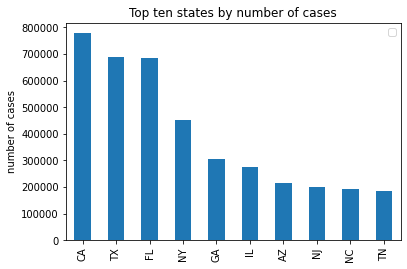

In [94]:
#plot just the top ten  Uses the nlargest function.  syntax is nlargest( 10, 'state')

df_states_positive.nlargest(10, 'positive').plot(kind = 'bar', x = 'state' )

plt.legend('')
plt.xlabel('')
plt.ylabel('number of cases')
plt.title('Top ten states by number of cases')

In [95]:
#Total DEATHS so far- top ten states

print('Top ten states ranked by most Deaths')
df_states_positive = df_states.groupby('state').death.max().reset_index()
df_states_positive.sort_values('death', ascending = False).head(10)

Top ten states ranked by most Deaths


state  death
37    NY  25427
34    NJ  16067
5     CA  14987
47    TX  14893
10    FL  13459
21    MA   9310
16    IL   8686
41    PA   7981
24    MI   6969
11    GA   6602

In [96]:
# plot positive, hosp, and death for entire US.  Format for numbers with , is simply :, in {}

print(f'On {tday}, nationwide there was:')
print()
print(f'{int(df_today.totalTestResultsIncrease.sum()):,} total tests')
print(f'{int(df_today.positiveIncrease.sum()):,} total cases')
print(f'{int(df_today.hospitalizedIncrease.sum()):,} new hospitalizations')
print(f'{int(df_today.deathIncrease.sum()):,} deaths')
print()
print(f'Cumulatively there have been:')
print()
print(f'{int(df_today.posNeg.sum()):,} cumulative tests')
print(f'{int(df_states.positiveIncrease.sum()):,} total cases')
print(f'{int(df_states.hospitalizedIncrease.sum()):,} hospitalizations')
print(f'{int(df_states.deathIncrease.sum()):,} deaths')

On 09-20-2020, nationwide there was:

1,958,507 total tests
81,574 total cases
1,601 new hospitalizations
1,061 deaths

Cumulatively there have been:

183,313,807 cumulative tests
6,770,293 total cases
395,193 hospitalizations
191,627 deaths


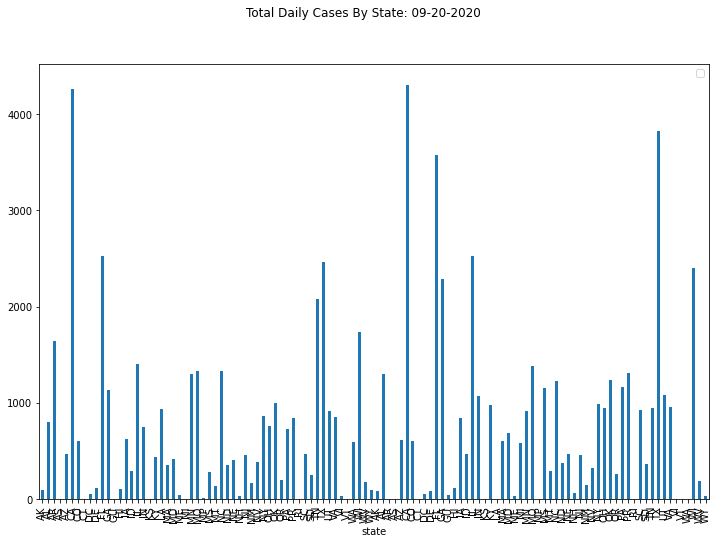

In [97]:
#plot cases by state - just one day

df_today.plot(kind = 'bar', x = 'state', y = 'positiveIncrease', figsize = (12,8))
plt.suptitle(f'Total Daily Cases By State: {tday}')
plt.legend('')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

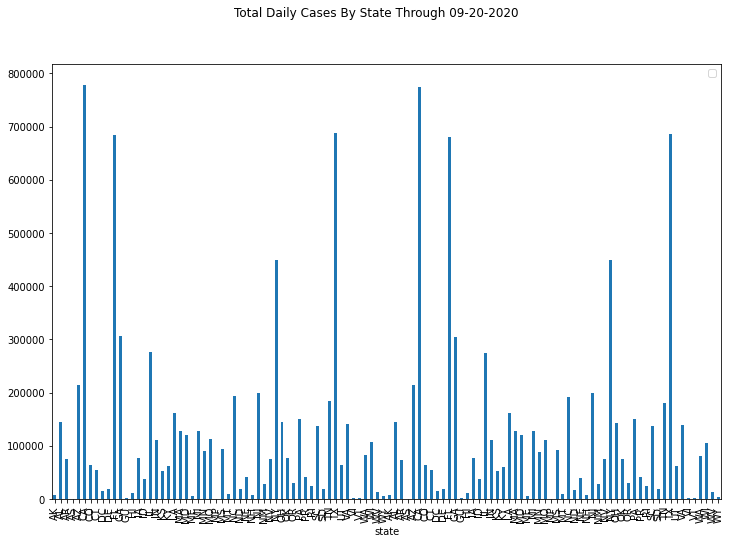

In [98]:
#plot cases by state - since pandemic started

df_today.plot(kind = 'bar', x = 'state', y = 'positive', figsize = (12,8))
plt.suptitle(f'Total Daily Cases By State Through {tday}')
plt.legend('')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

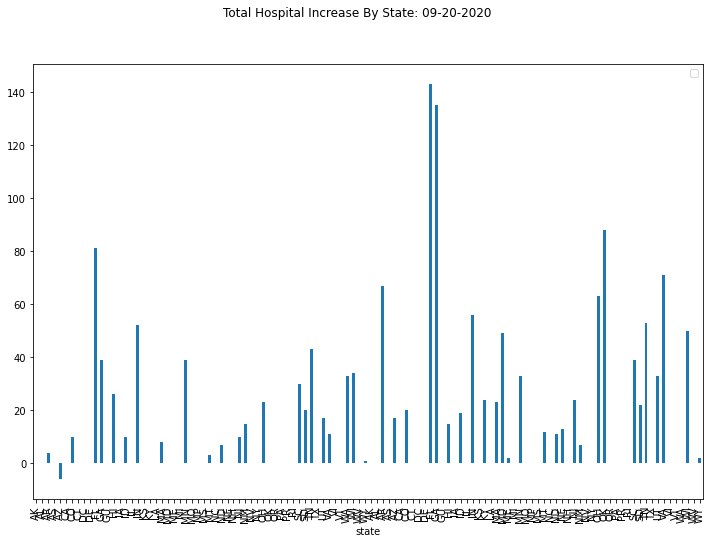

In [99]:
#plot hositalized by state

df_today.plot(kind = 'bar', x = 'state', y = 'hospitalizedIncrease', figsize = (12,8))
plt.suptitle(f'Total Hospital Increase By State: {tday}')
plt.legend('')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

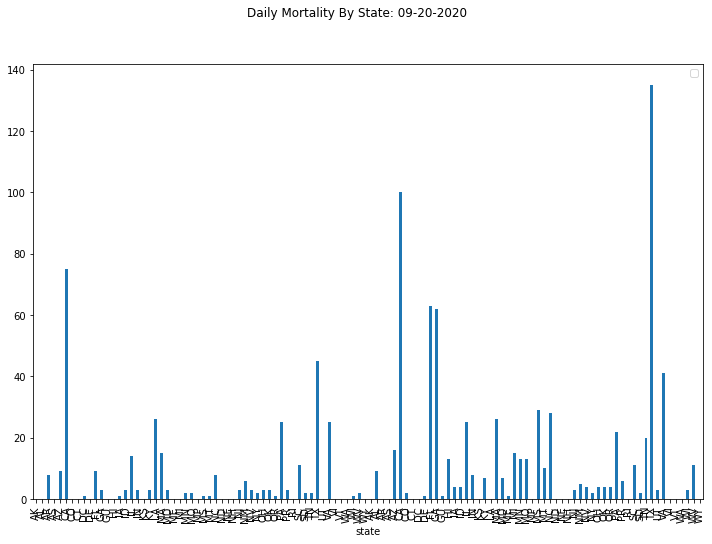

In [100]:
#plot deaths by state

df_today.plot(kind = 'bar', x = 'state', y = 'deathIncrease', figsize = (12,8))
plt.suptitle(f'Daily Mortality By State: {tday}')
plt.legend('')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

# Code to chart state by state

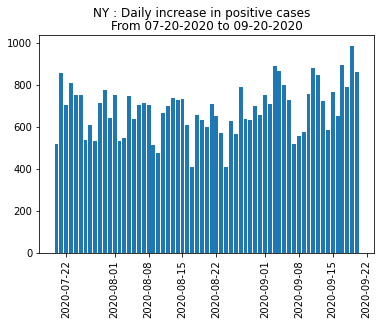

In [101]:
# MASTER CHART FOR STATE BY STATE

#The master chart code for doing all the state by state graphs- but this is still missing the date paramaters
# The hardest part here was the complicated code to get by one exact state, in a date range

graph = 'Daily increase in positive cases'

df = df_states[(df_states.state == state)] #to make the code less complicated, I do this step first

plt.bar(df[(df.date >= twomonth) & (df.date <= tday)].date, 
        df[(df.date >= twomonth) & (df.date <= tday)].positiveIncrease)

plt.suptitle(f'{state} : {graph}')
plt.title(f'From {twomonth} to {tday}')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

# Here I do the actual charts using a loop on a limited list of states

In [102]:
# make a list of ALL states, use len() to see how many there are

all_states = df_states.state.unique().tolist()
len(all_states)

56

In [103]:
# let's see what they are:
all_states

['AK',
 'AL',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [104]:
# I don't want the territories, but I'll leave in 'PR' and 'DC' for now
all_states.remove('AS')
all_states.remove('GU')
all_states.remove('MP')
all_states.remove('VI')
len(all_states)

52

In [105]:
# Set up for the loops - including states of interest
# use this cell to set up dates, state list desired, etc.

end_date =         tday  #this is for the end date- for nationiwide

state_list = all_states

#state_list = ['AZ', 'CA', 'CT', 'FL', 'HI', 'MA', 'MN', 'MT','NJ','NY', 'TX'] 

# I use all_states instead of my shorter list, but I could use the shorter one instead

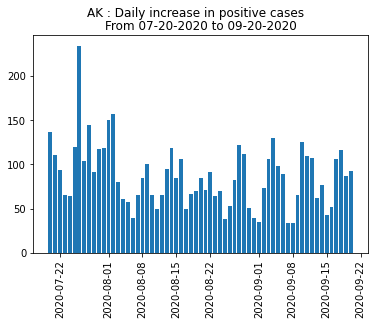

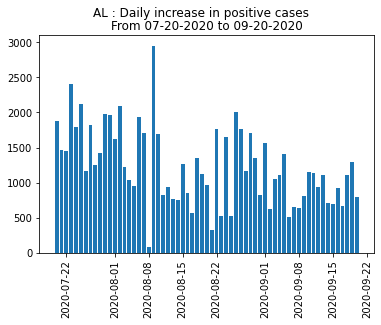

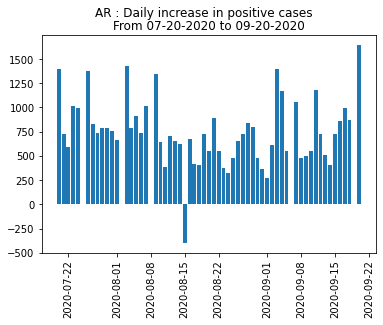

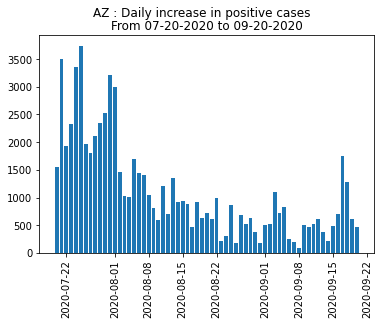

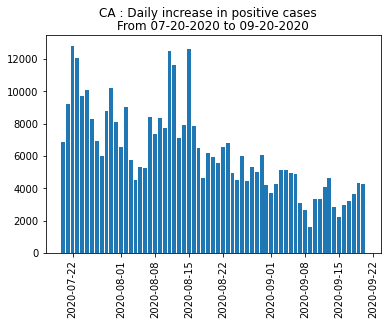

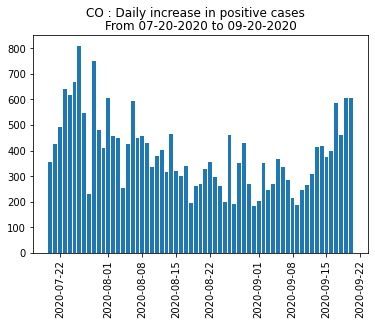

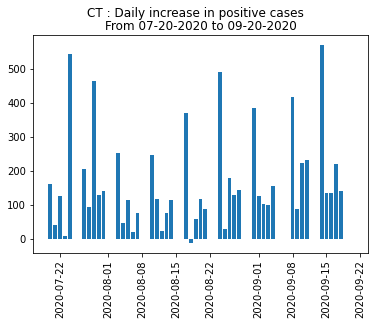

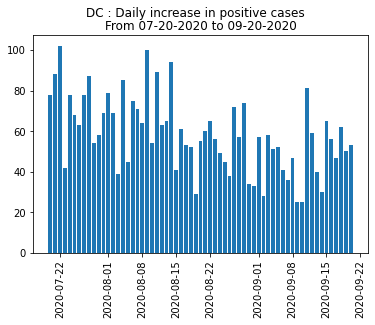

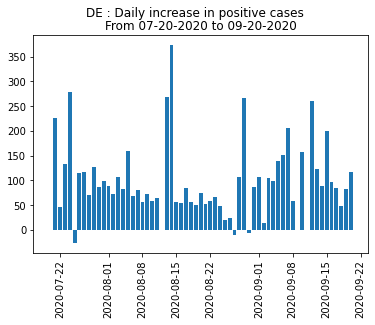

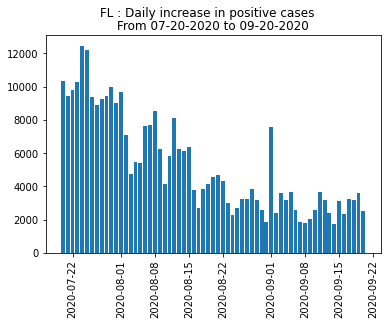

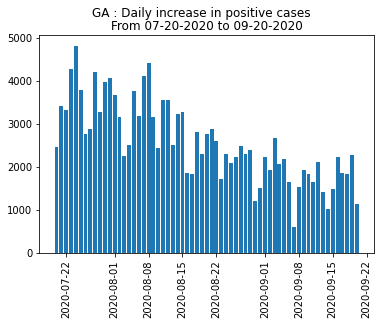

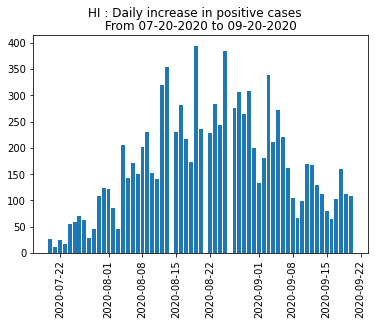

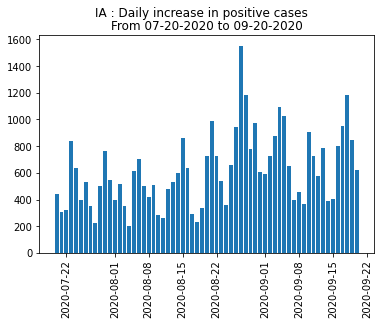

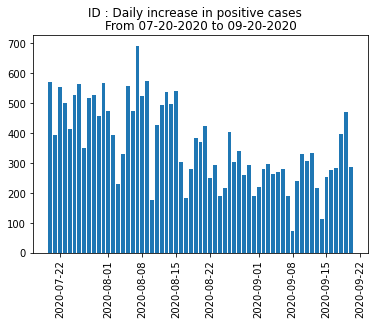

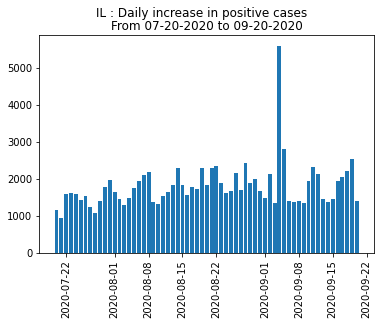

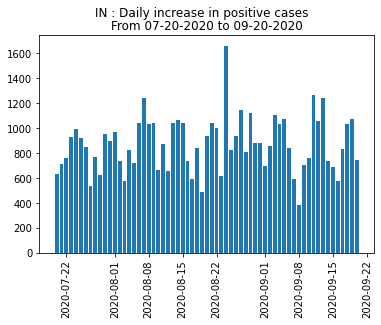

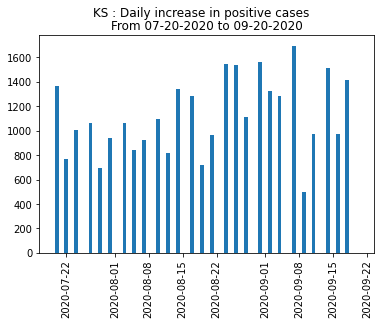

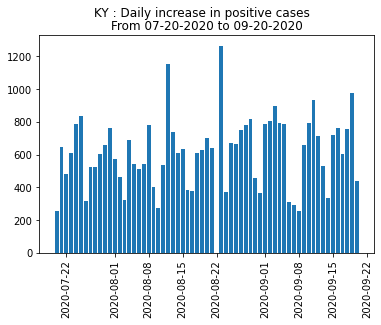

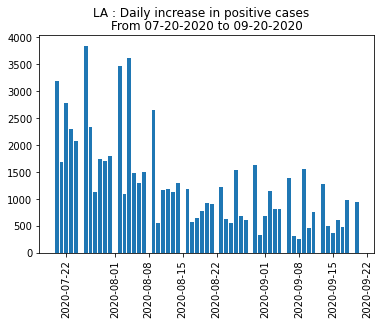

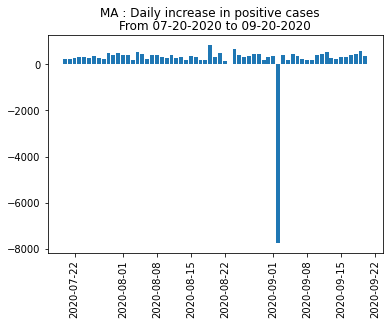

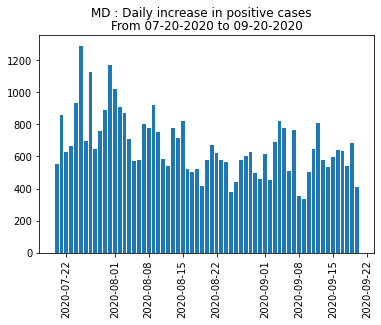

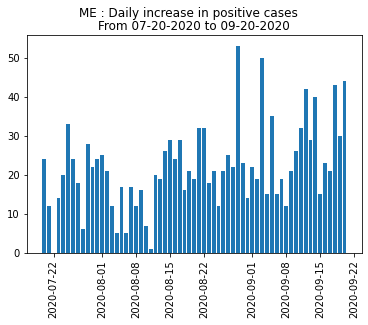

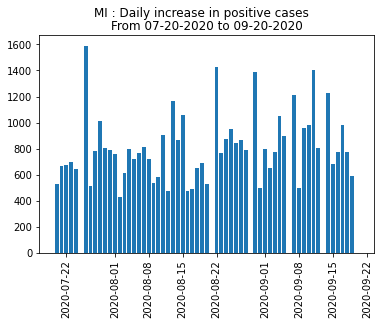

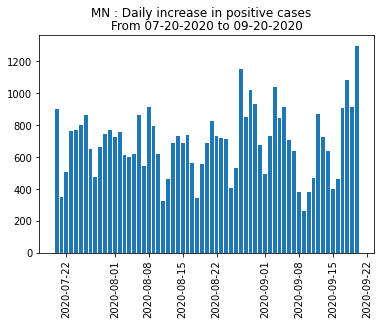

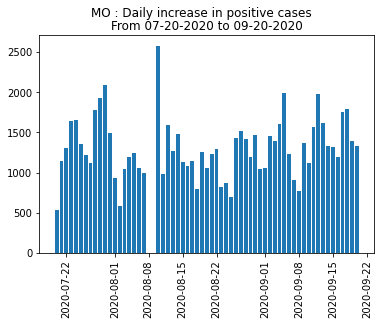

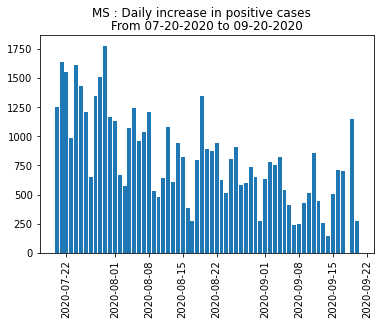

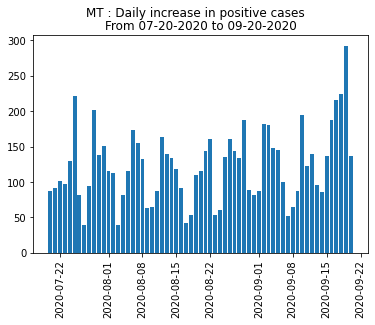

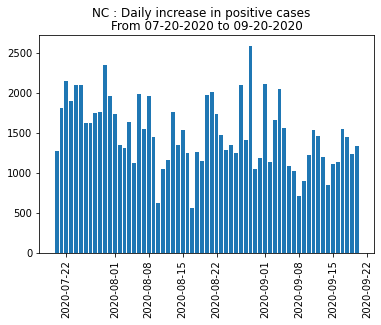

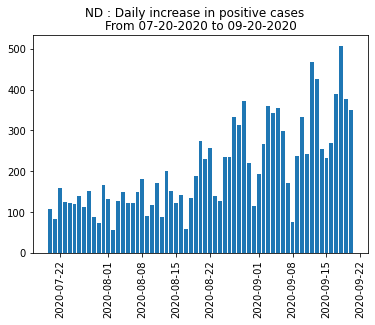

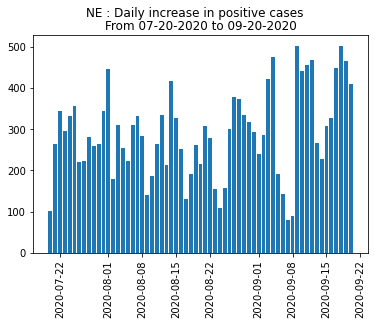

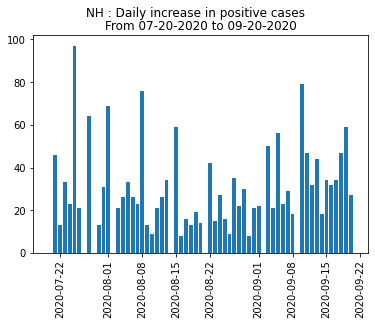

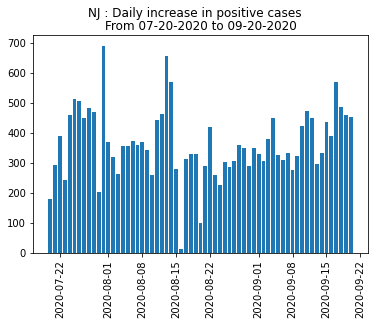

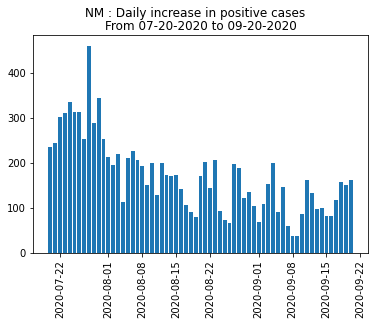

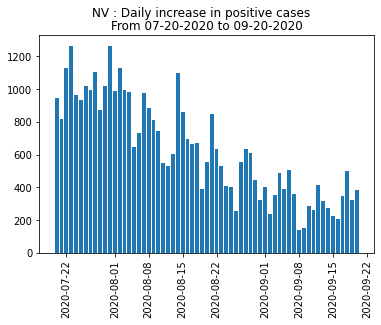

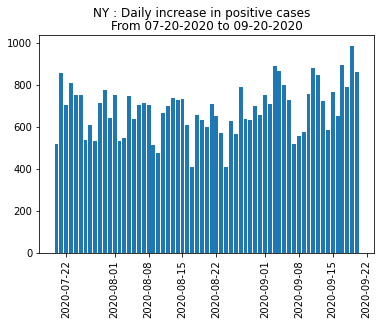

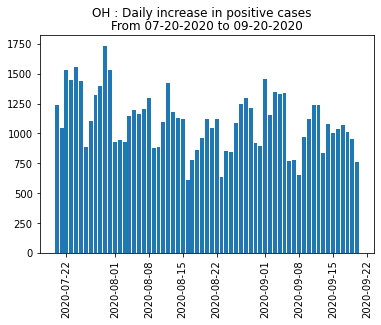

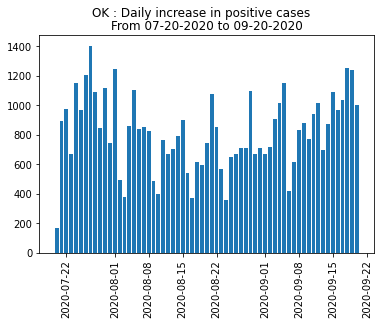

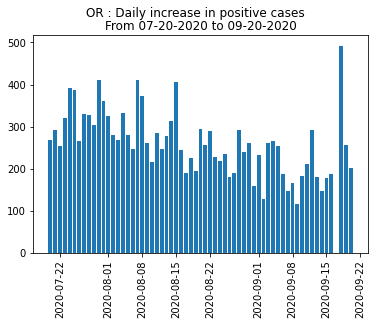

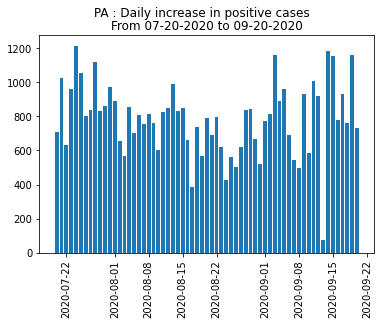

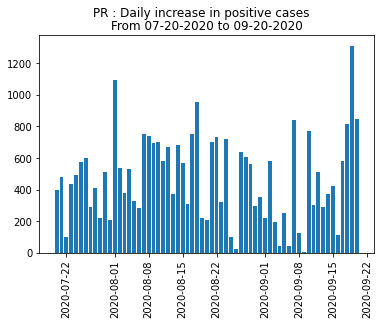

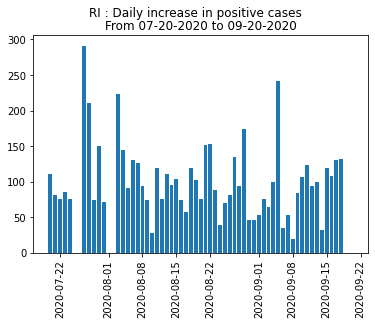

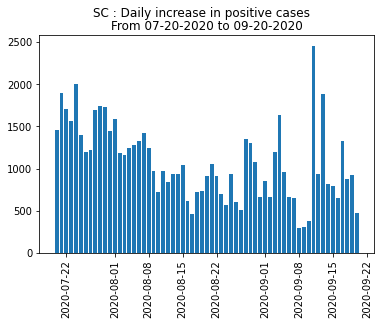

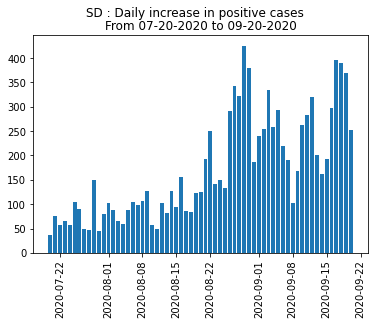

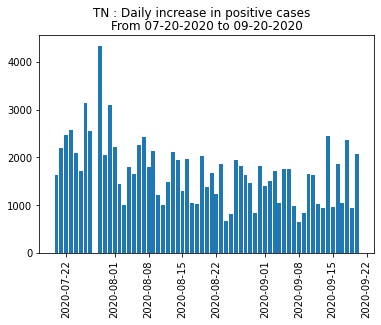

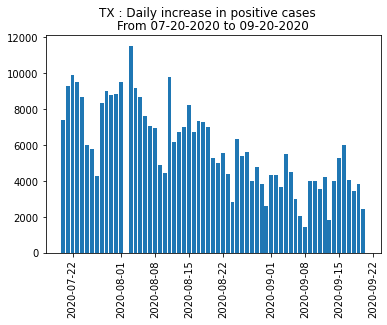

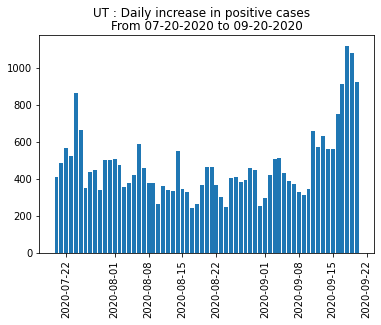

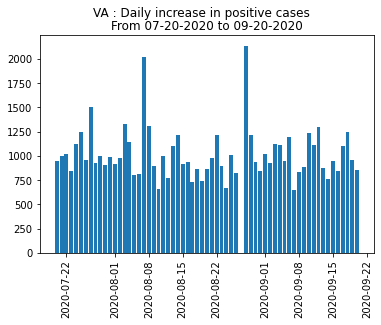

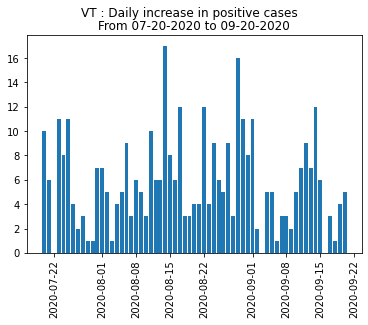

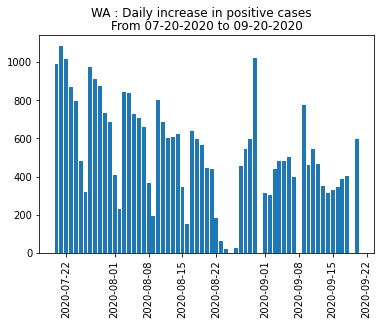

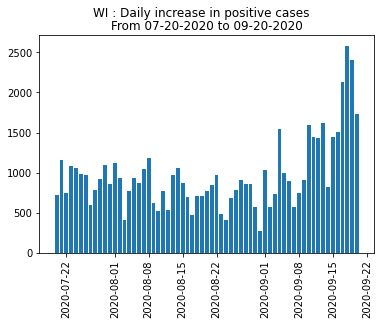

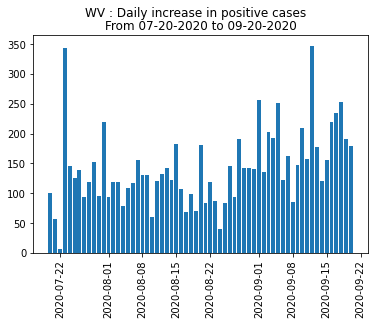

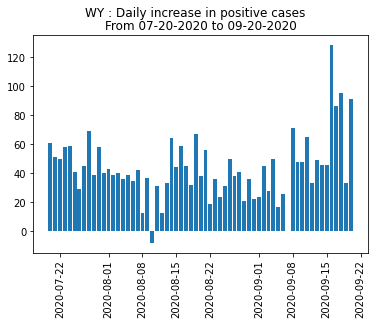

In [106]:
# Daily increase in positive cases - short term charts, loop them all through the  state_list

for i in state_list:
    graph = 'Daily increase in positive cases'
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= twomonth) & (df.date <= tday)].date, 
            df[(df.date >= twomonth) & (df.date <= tday)].positiveIncrease)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {twomonth} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

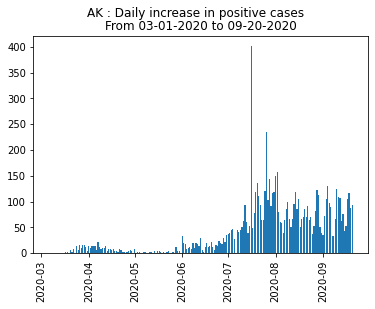

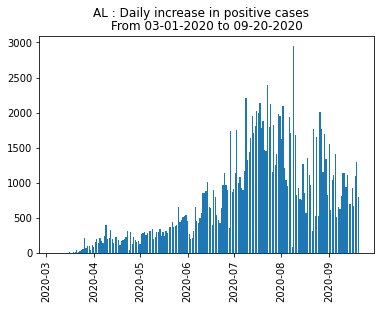

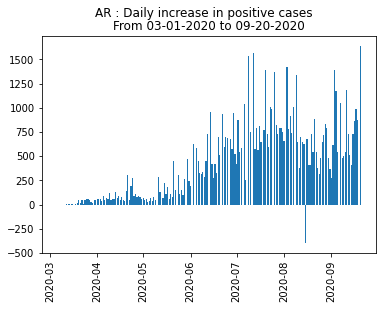

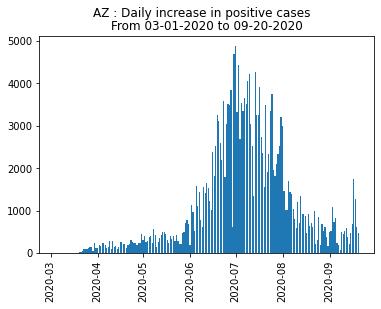

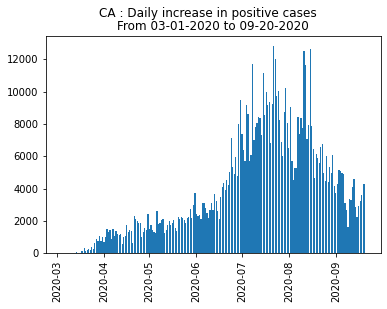

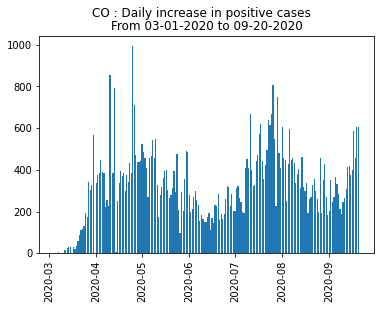

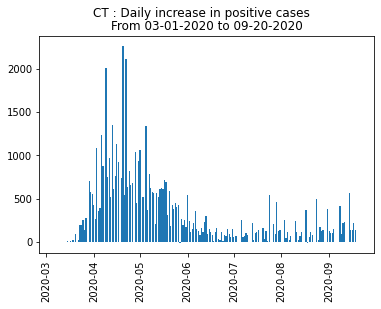

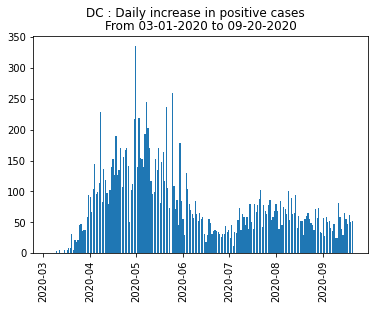

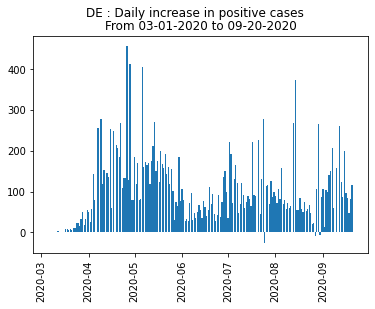

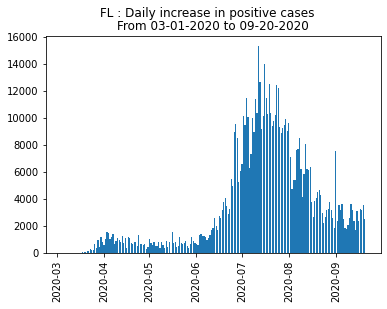

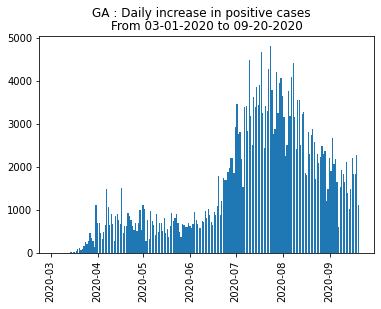

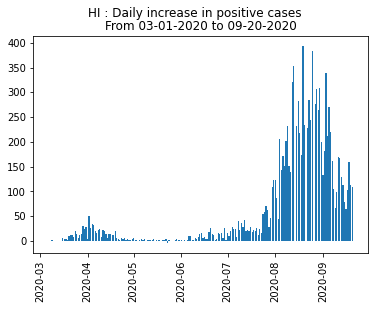

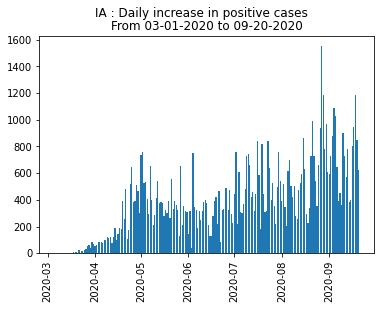

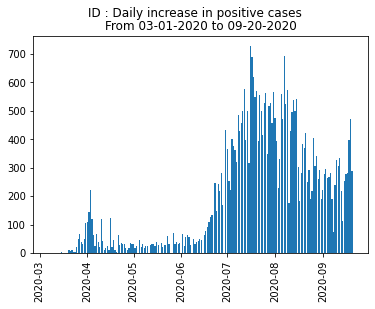

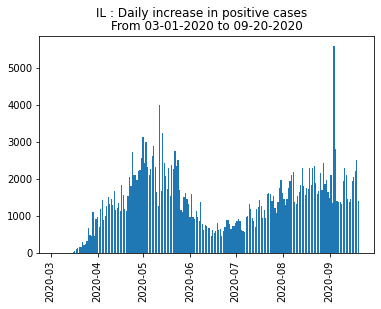

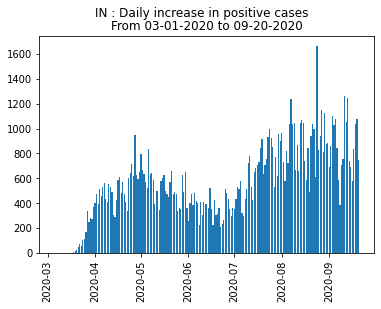

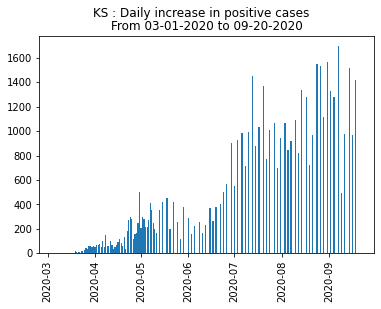

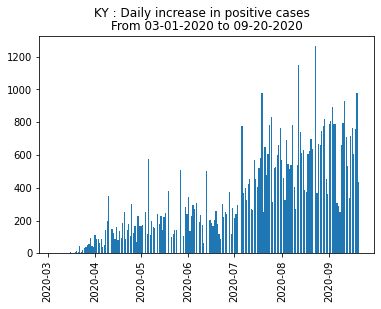

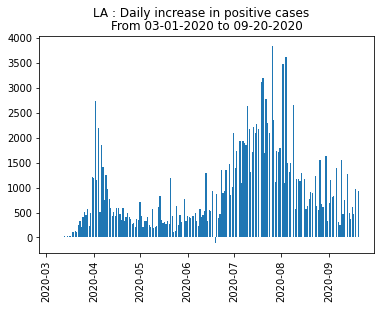

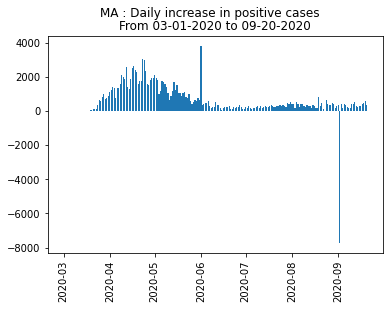

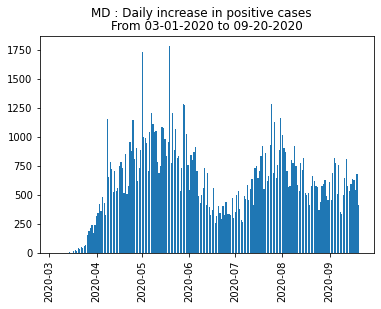

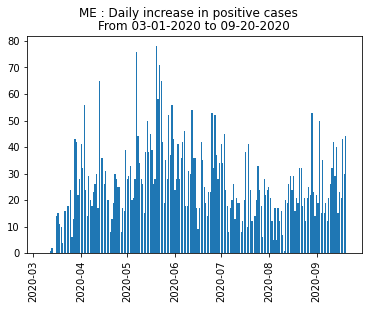

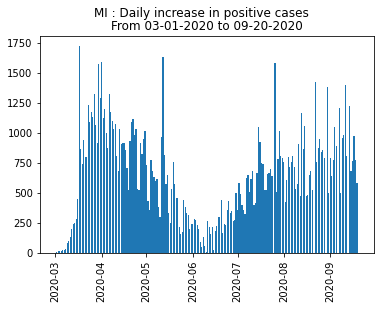

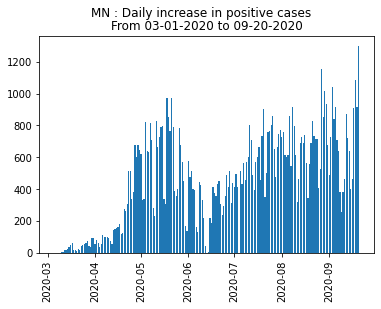

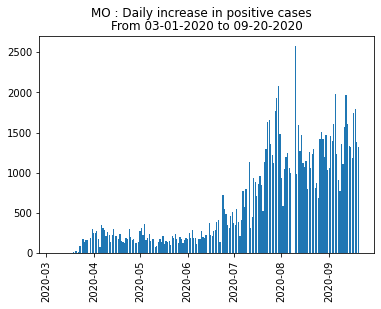

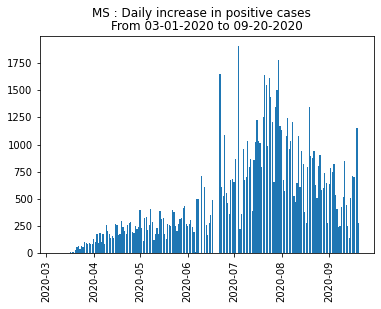

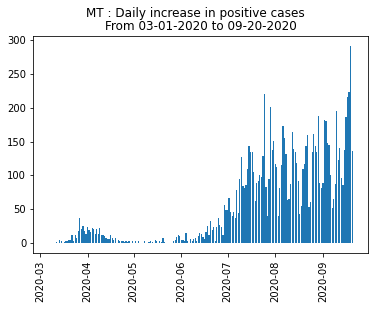

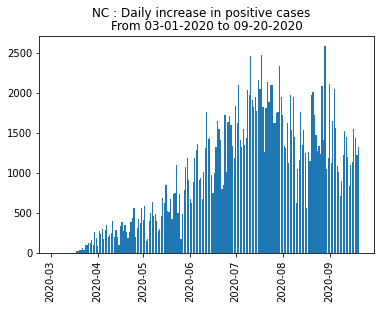

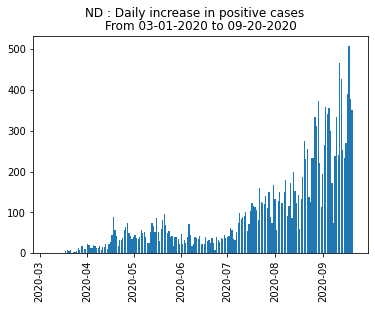

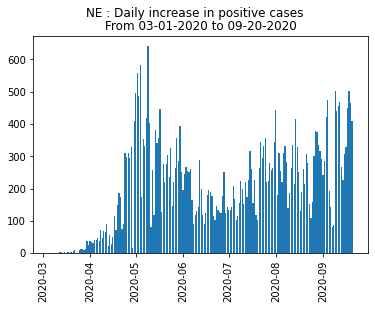

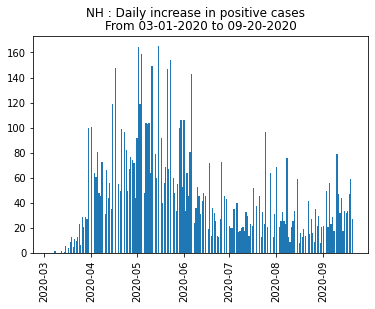

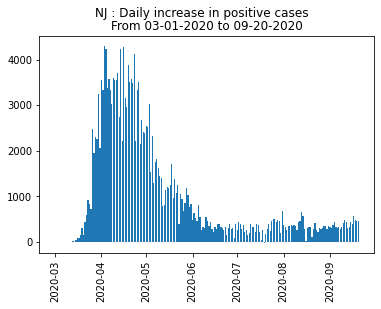

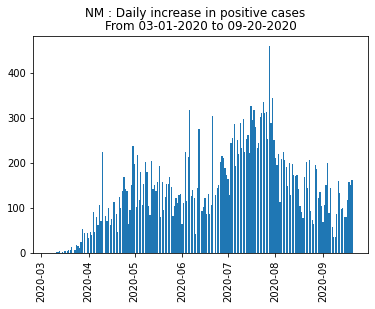

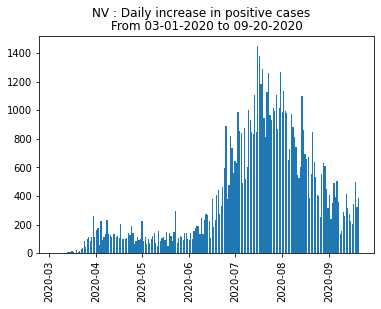

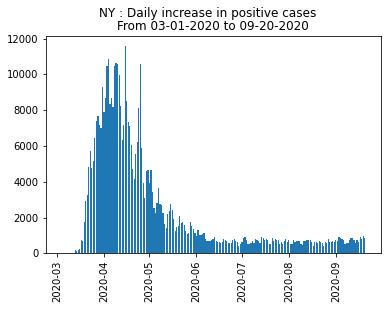

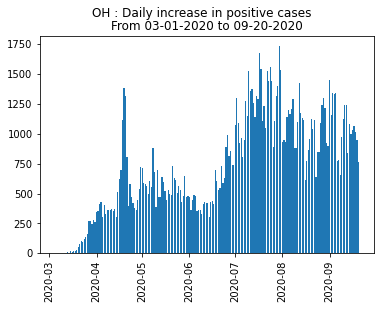

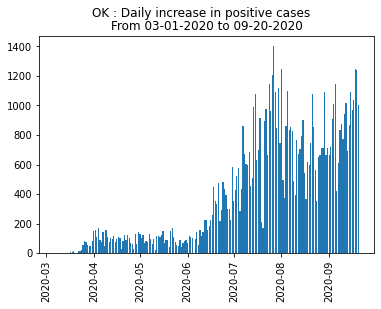

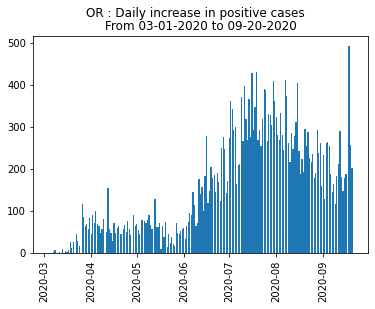

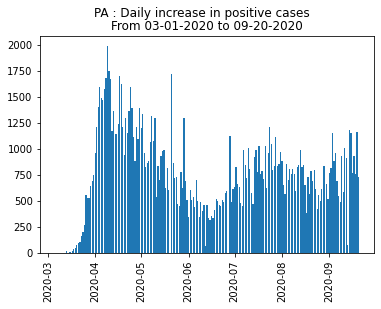

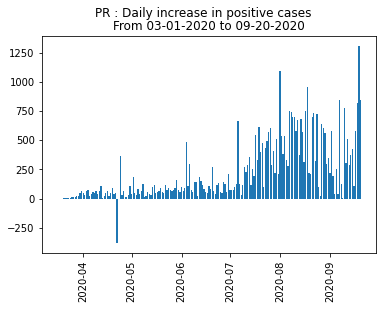

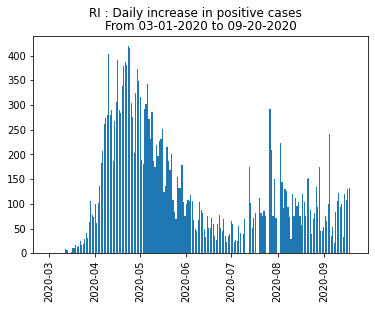

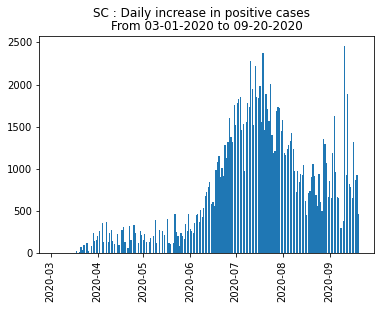

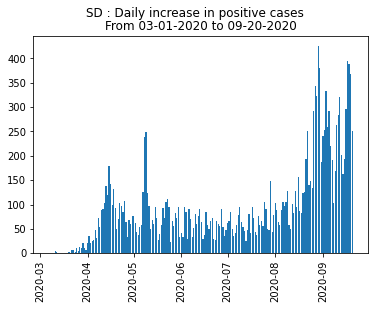

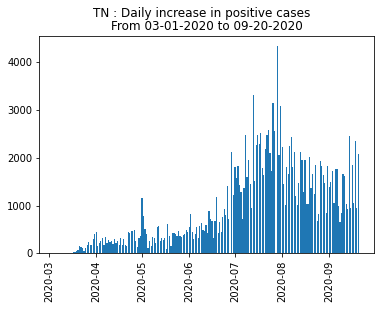

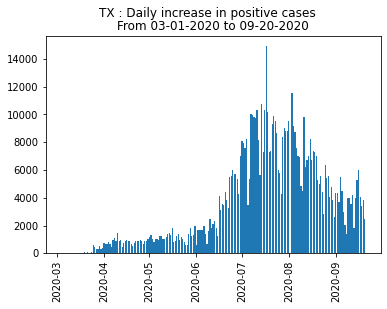

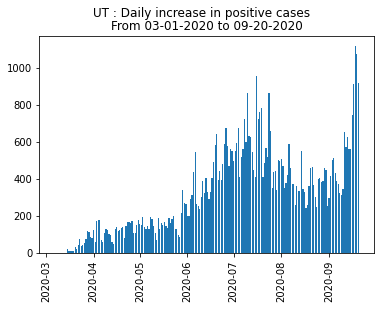

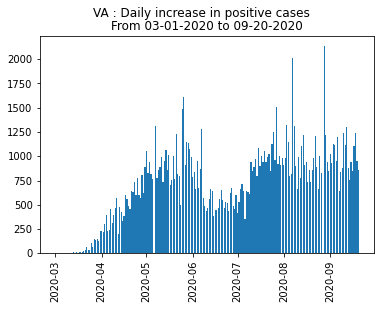

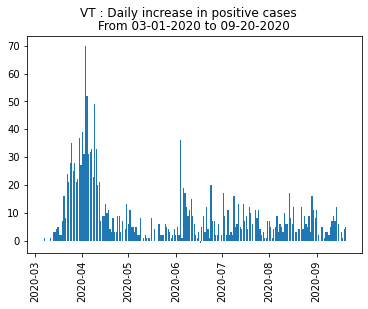

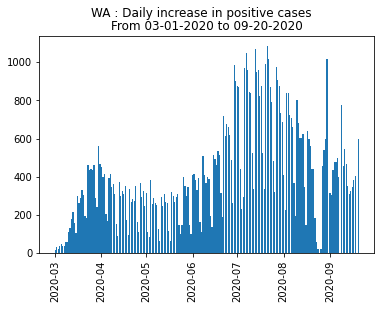

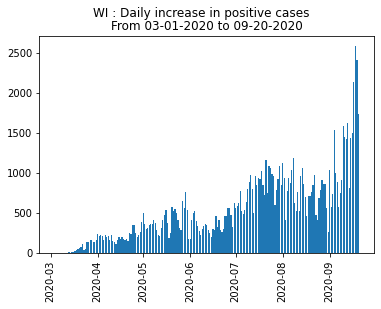

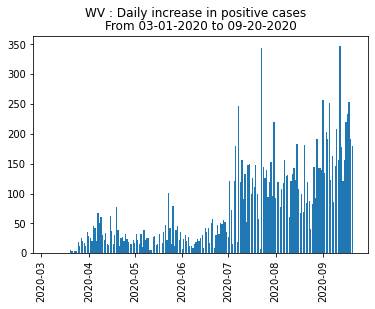

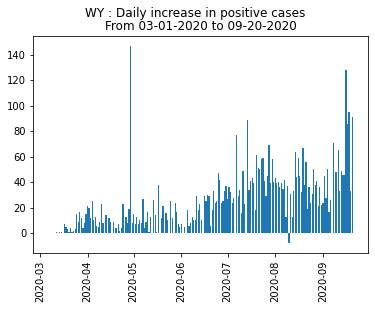

In [107]:
# Daily increase in positive cases - long term charts

for i in state_list:
    graph = 'Daily increase in positive cases'
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].positiveIncrease)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {alldata} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

# How to fix specific bad data points

In this case, MA has a bad data point that screws up the graph.  
In some day, which we don't know, there is bad data.

### Process:
1. Graph it to see the problem. 
2. Make a new df for MA only  
3. Show the df, ranked by the value in question  
4. Re-set that data point to some number. 
5. Plot again  

## Takeaway- I had to google for syntax, but I got it!  A new function 'at'
also this won't be correct next time I run it if they fix it

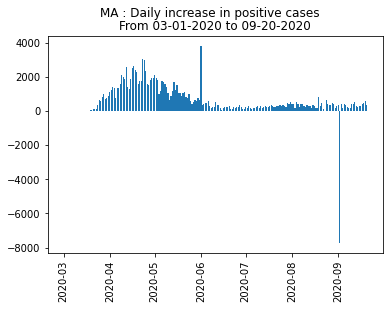

In [108]:
#fix the bad data in MA for practice
# first graph it again:

i = "MA"
graph = 'Daily increase in positive cases'
df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].positiveIncrease)

plt.suptitle(f'{i} : {graph}')
plt.title(f'From {alldata} to {tday}')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

In [109]:
# make the new df of ma only- for some reason, this syntax is hard for me to recall
df_ma = df_states[df_states.state == 'MA']

In [110]:
# find the bad value
df_ma.sort_values('positiveIncrease', ascending = True)[['date', 'positiveIncrease']].head(5)

# how can there by -7757 cases on 9-2?

date  positiveIncrease
1029  2020-09-02             -7757
11240 2020-01-22                 0
11057 2020-03-06                 0
11204 2020-02-09                 0
11087 2020-03-05                 0

In [111]:
# how do I overwrite the bad data point to make it 0?

# df_ma[df_ma.positiveIncrease == -7757].replace([-7757, 0])

# df_ma.at[973, 'positiveIncrease']= 0

df_ma.at[973, 'positiveIncrease']= 0

In [112]:
# did it work?  maybe
df_ma.sort_values('positiveIncrease', ascending = True)[['date', 'positiveIncrease']].head(5)

date  positiveIncrease
1029  2020-09-02             -7757
11240 2020-01-22                 0
11057 2020-03-06                 0
11206 2020-02-08                 0
11087 2020-03-05                 0

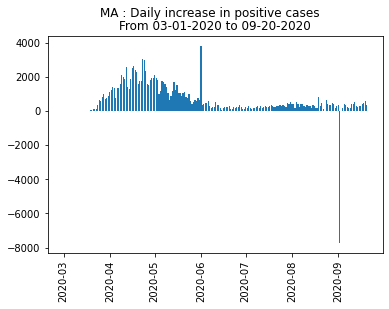

In [113]:
# Do the graph again- see if it worked

graph = 'Daily increase in positive cases'
df = df_ma[(df_ma.state == i)] #to make the code less complicated, I do this step first

plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].positiveIncrease)

plt.suptitle(f'{i} : {graph}')
plt.title(f'From {alldata} to {tday}')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

In [114]:
# still has another bad data point!  Let's do this again, but from highest

df_ma.sort_values('positiveIncrease', ascending = False)[['date', 'positiveIncrease']].head(5)

# the 6-1 datapoint is obviously wrong at 3840

date  positiveIncrease
6237 2020-06-01              3840
8421 2020-04-23              3079
8365 2020-04-24              2977
8757 2020-04-17              2633
9037 2020-04-12              2615

In [115]:
# fix the one bad data point, approximately based on graph above

df_ma.at[6181, 'positiveIncrease']= 500

In [116]:
# check again to make sure it worked- looks good
df_ma.sort_values('positiveIncrease', ascending = False)[['date', 'positiveIncrease']].head(5)

date  positiveIncrease
6237 2020-06-01              3840
8421 2020-04-23              3079
8365 2020-04-24              2977
8757 2020-04-17              2633
9037 2020-04-12              2615

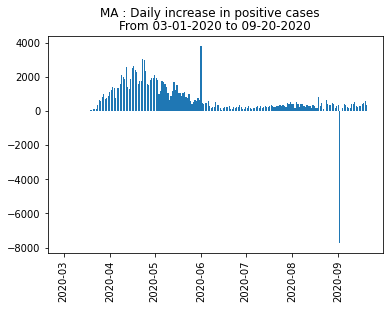

In [117]:
# graph it again to see did it work- looks like it did!  A lot of work!

graph = 'Daily increase in positive cases'
df = df_ma[(df_ma.state == i)] #to make the code less complicated, I do this step first

plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].positiveIncrease)

plt.suptitle(f'{i} : {graph}')
plt.title(f'From {alldata} to {tday}')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

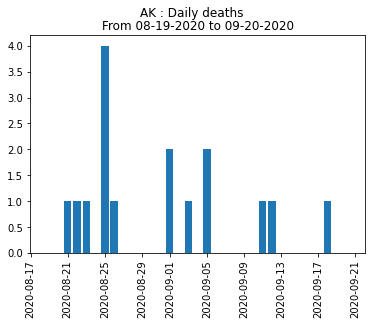

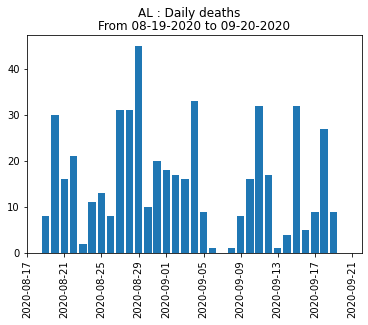

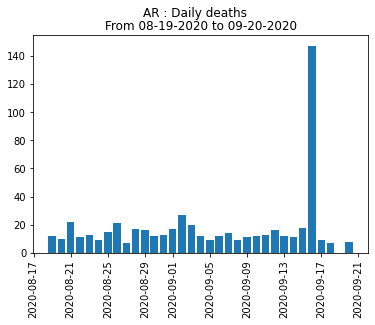

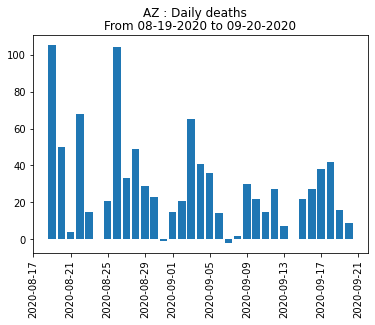

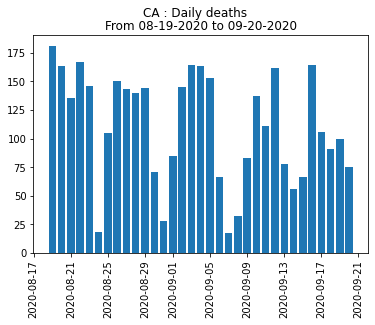

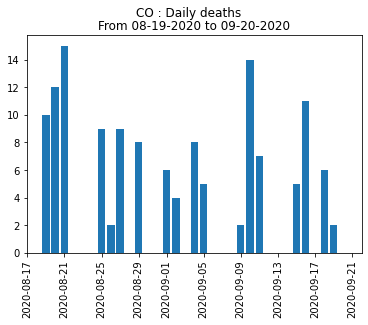

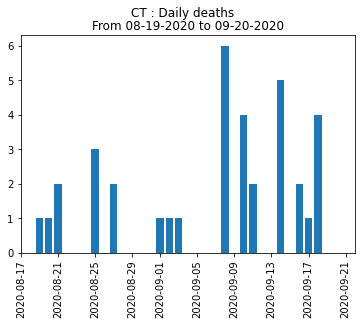

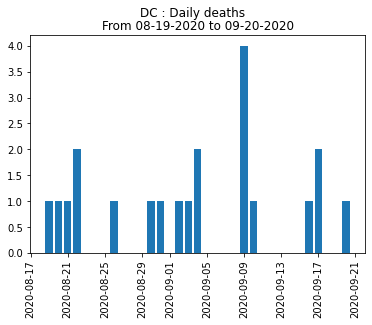

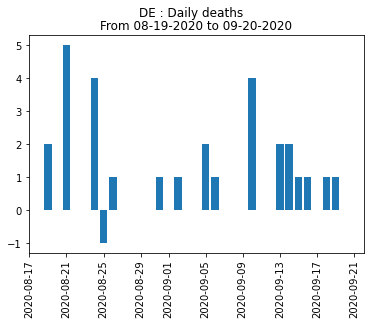

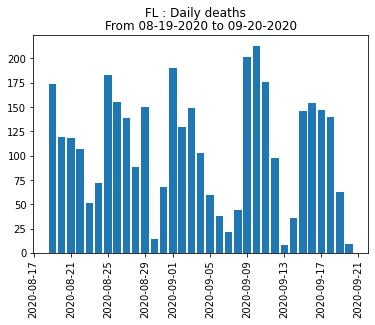

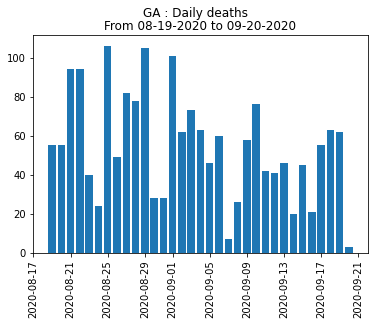

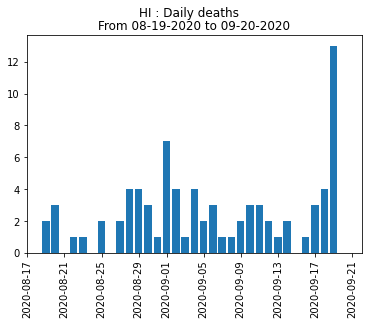

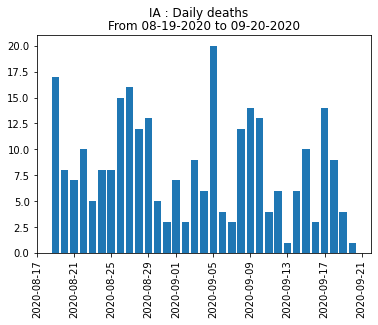

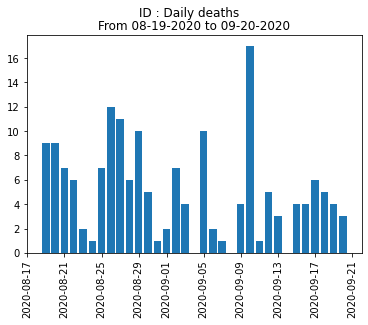

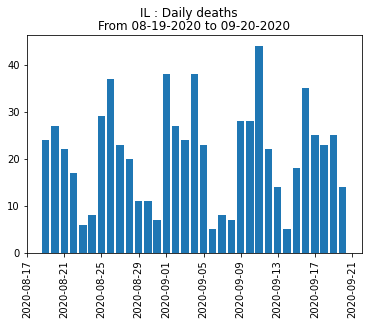

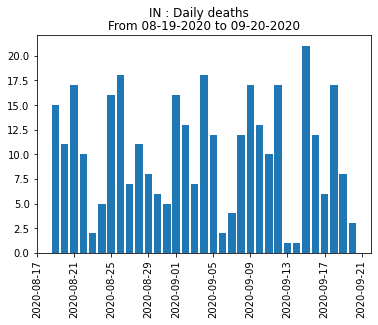

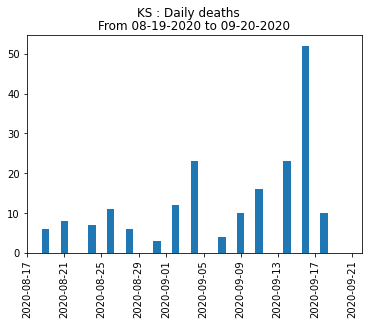

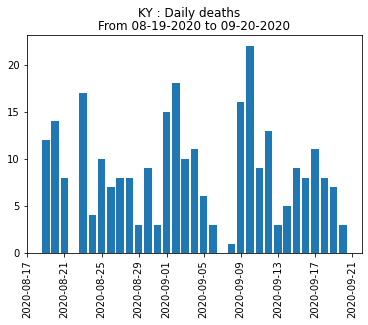

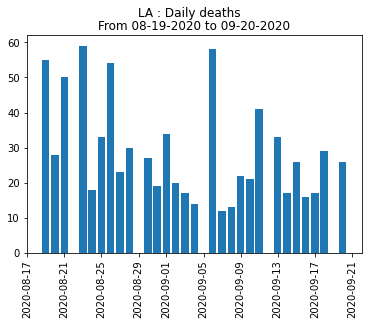

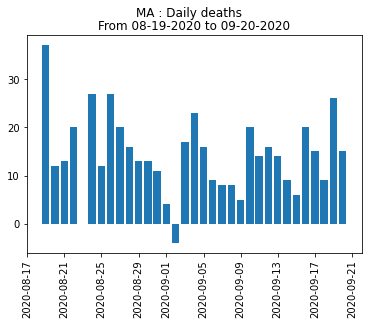

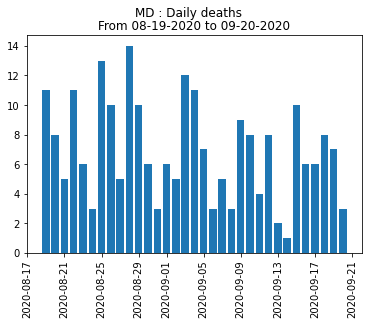

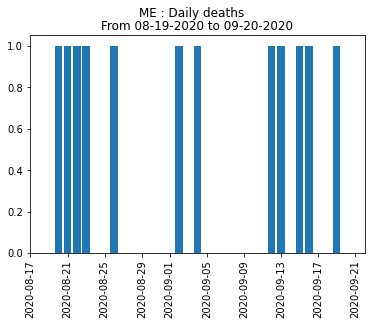

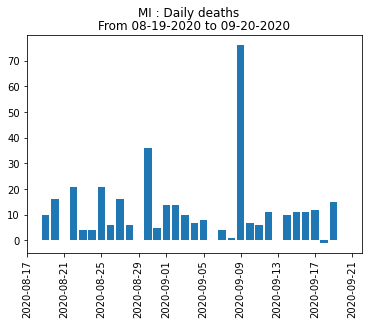

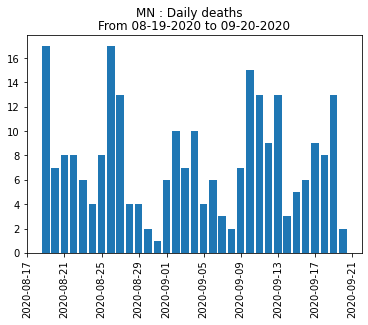

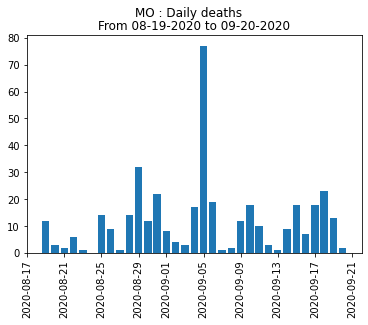

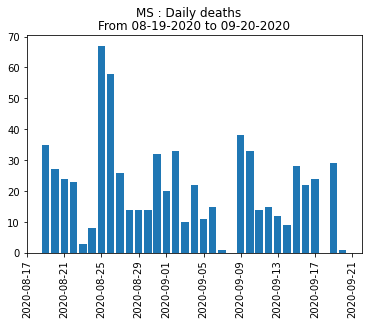

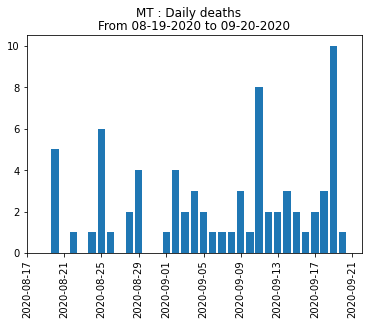

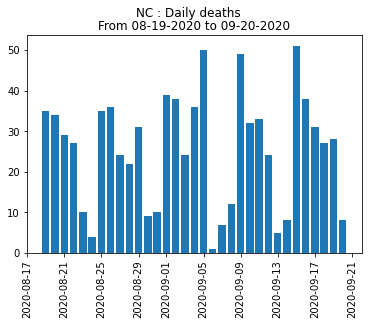

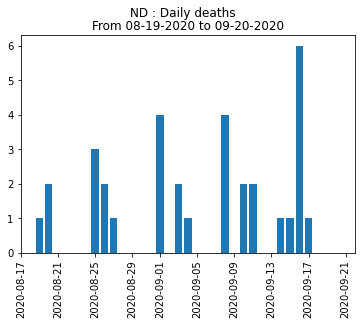

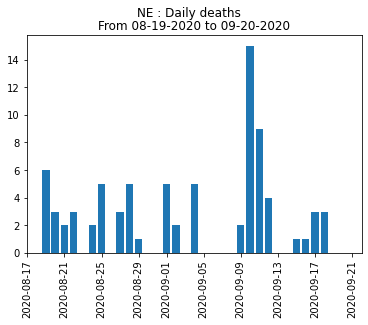

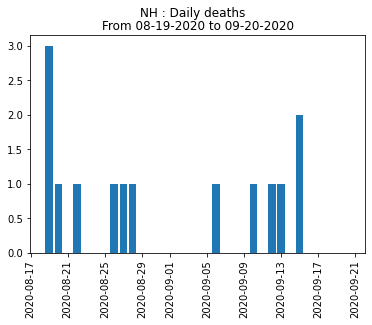

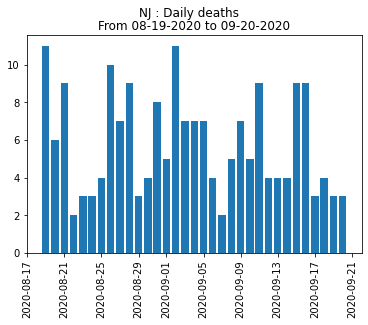

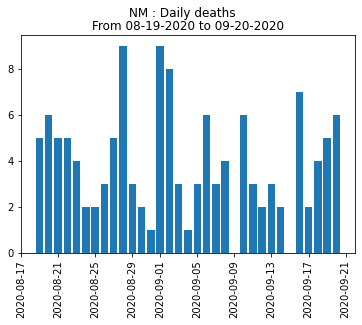

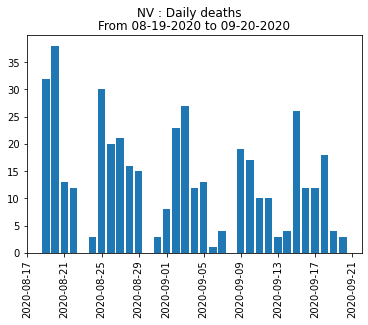

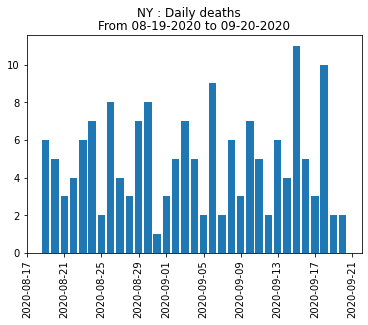

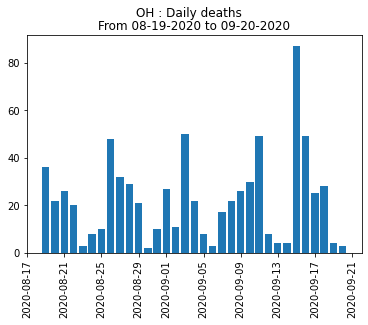

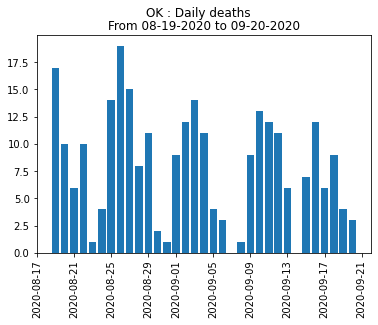

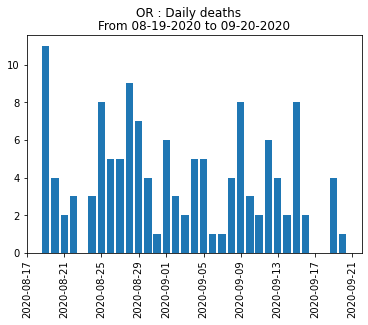

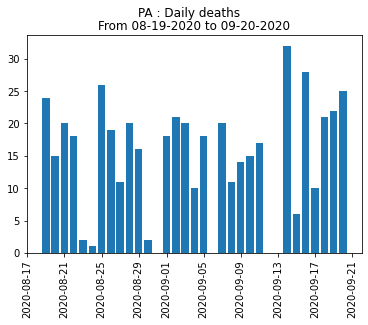

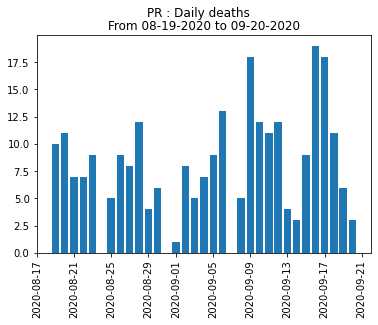

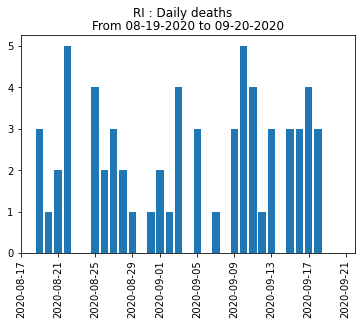

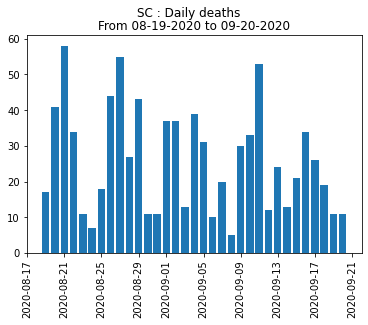

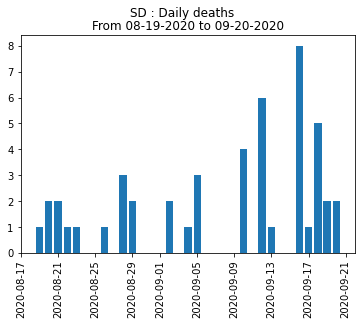

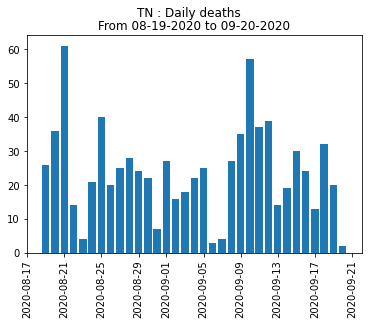

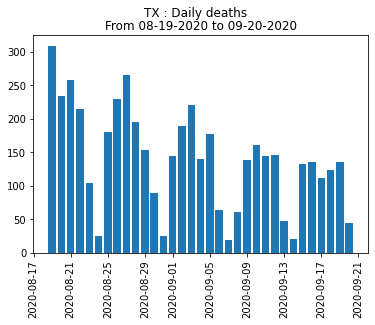

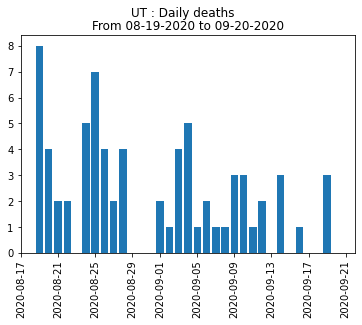

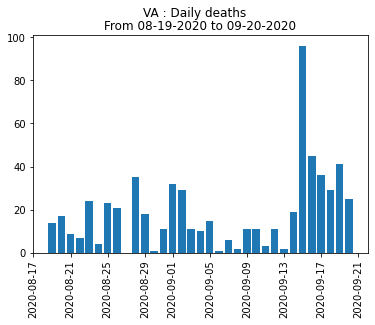

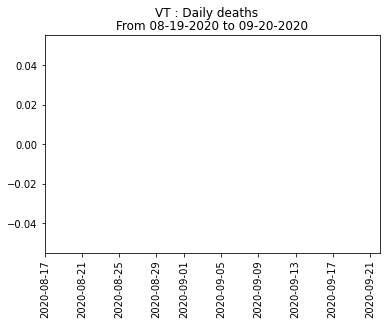

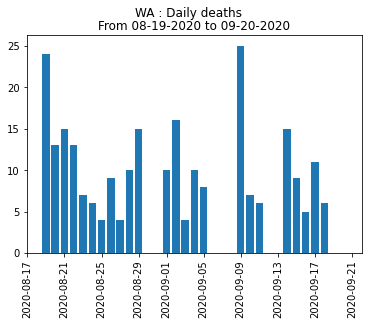

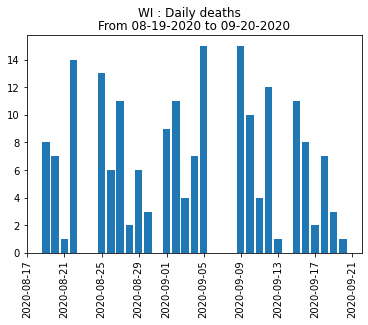

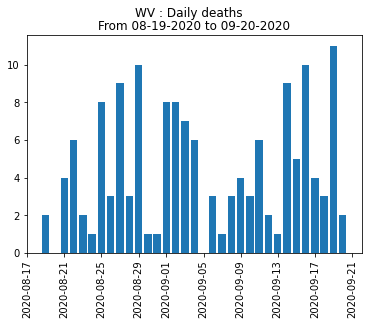

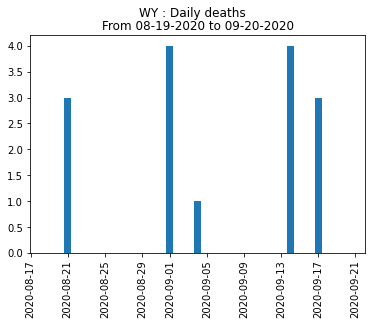

In [118]:
# Daily increase in deaths cases - short term charts

graph = 'Daily deaths'

#this is for 1 month  charts

for i in state_list:
    
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= onemonth) & (df.date <= tday)].date, 
            df[(df.date >= onemonth) & (df.date <= tday)].deathIncrease)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {onemonth} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

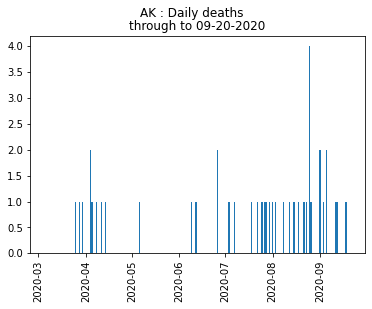

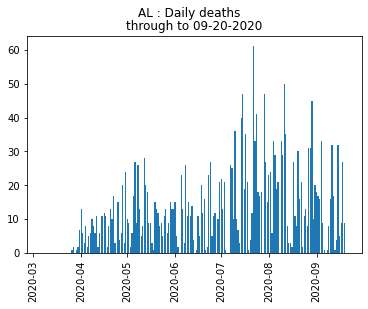

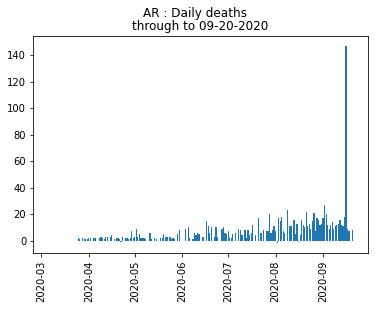

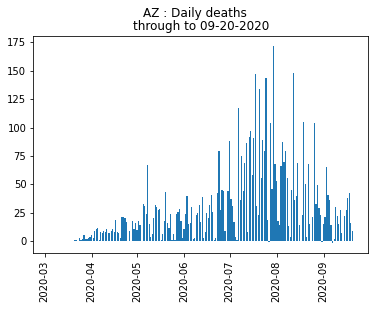

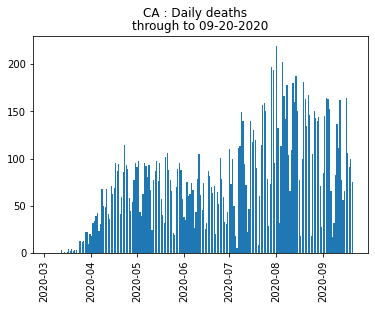

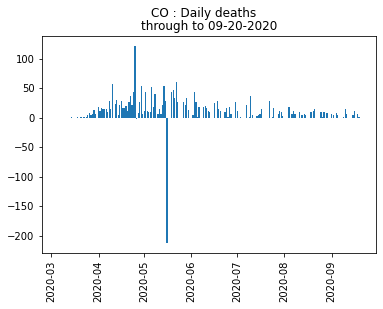

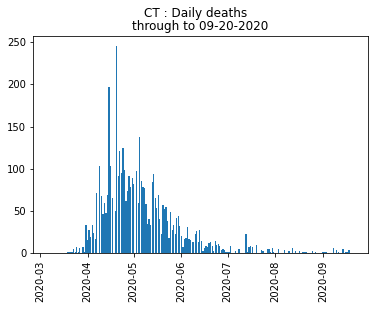

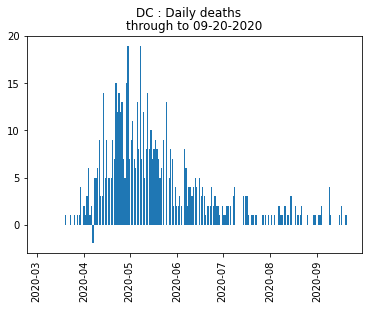

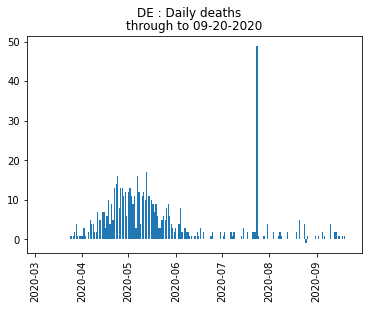

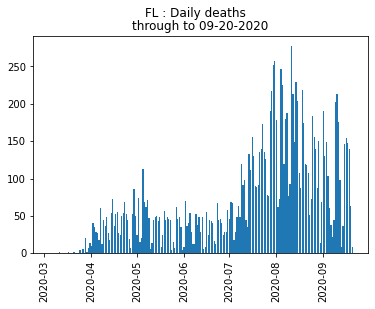

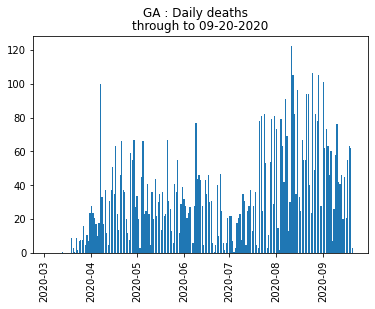

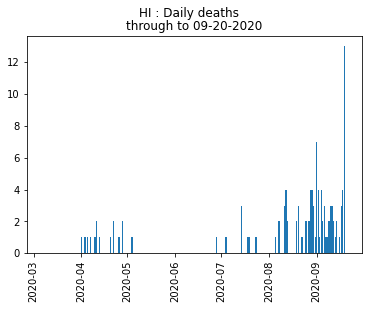

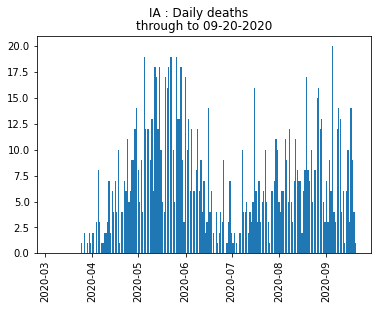

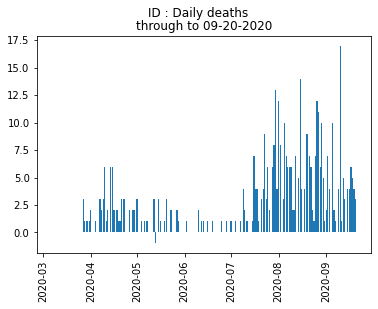

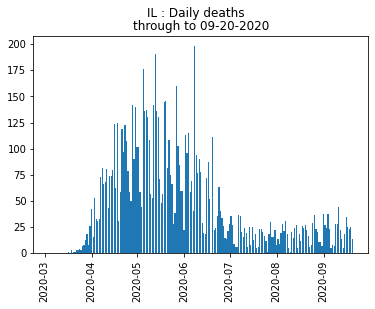

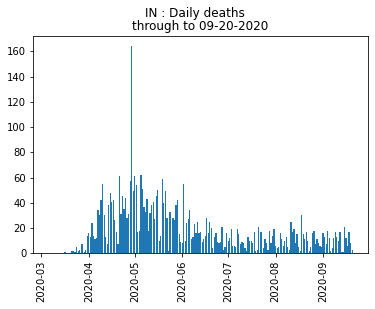

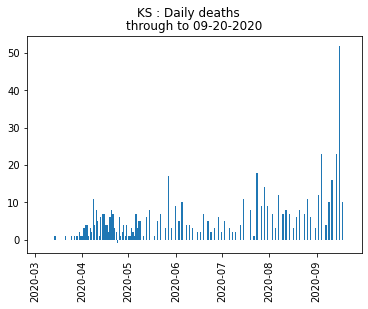

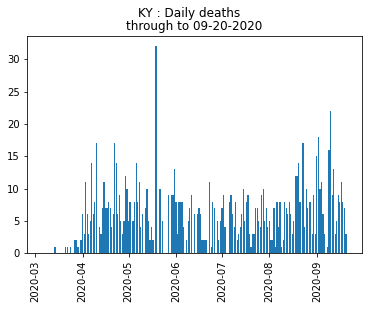

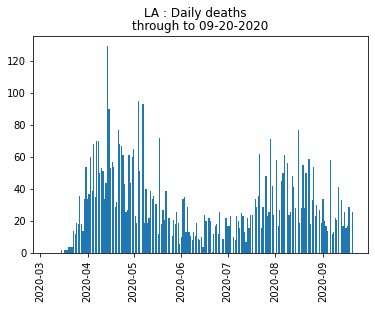

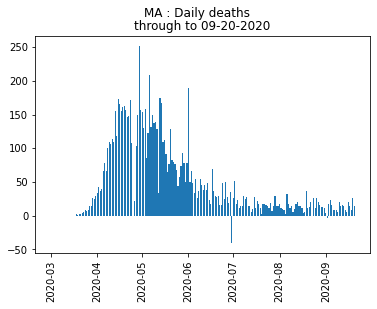

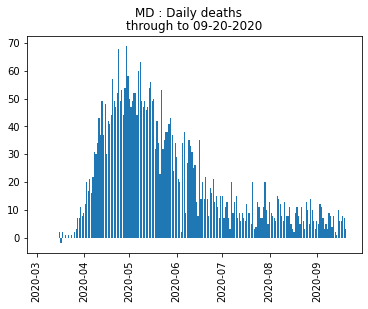

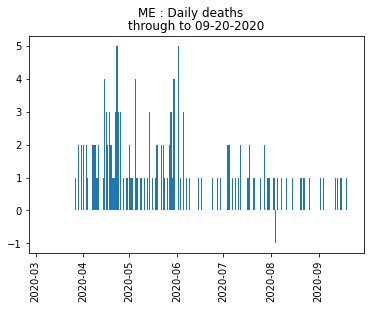

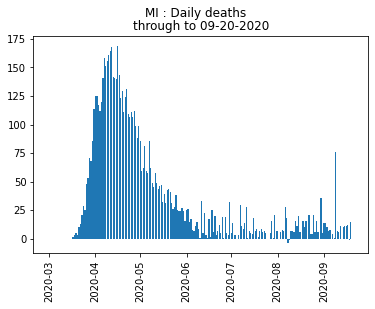

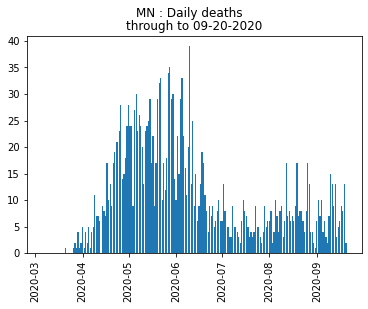

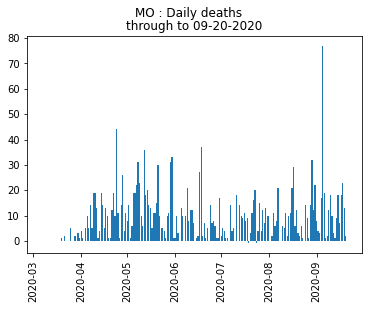

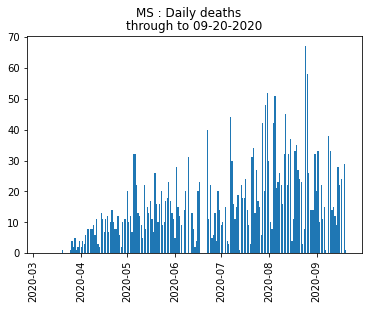

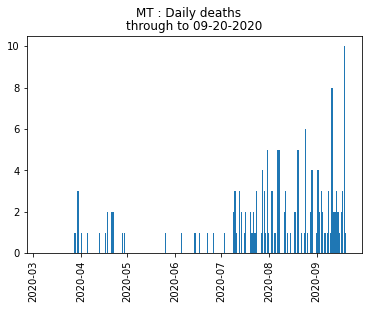

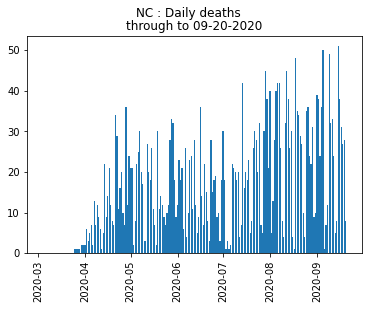

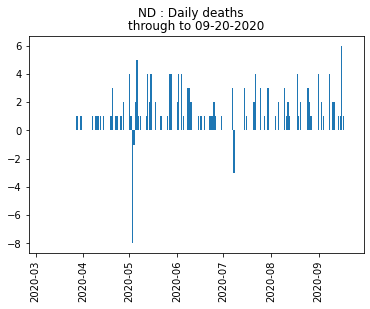

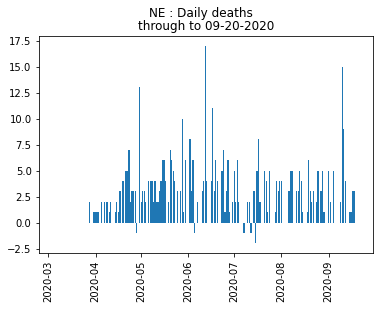

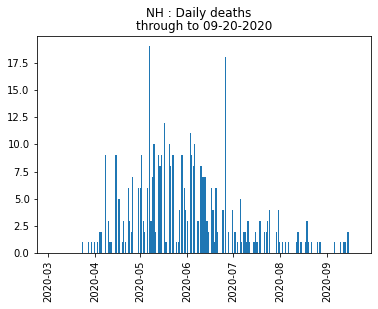

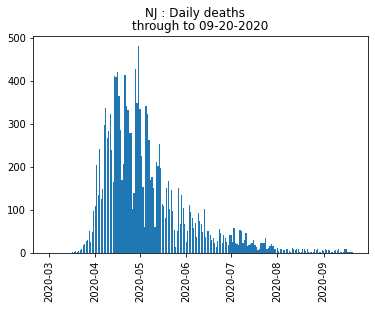

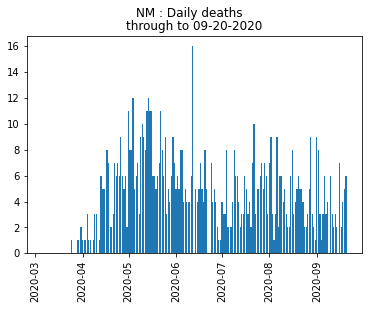

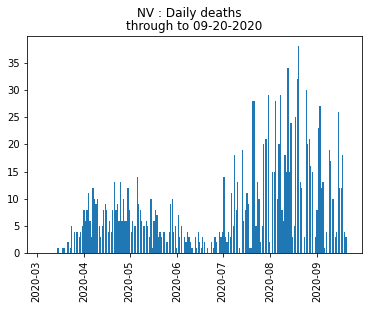

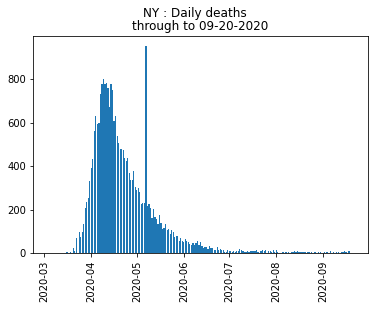

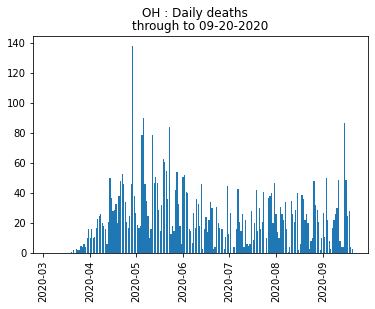

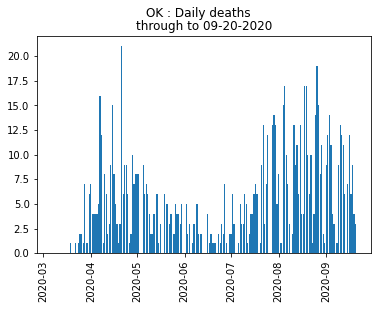

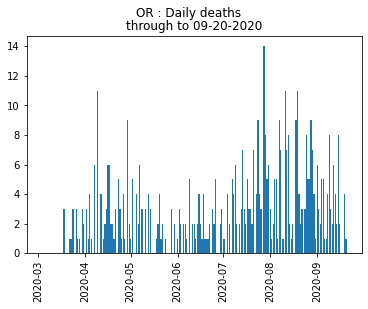

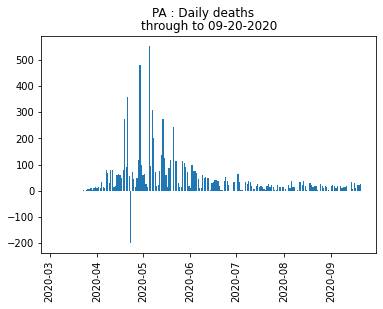

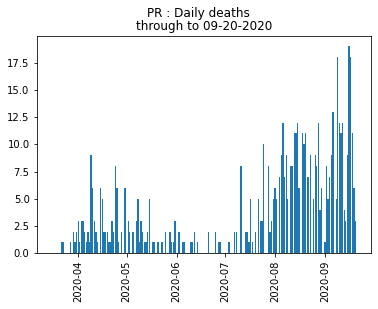

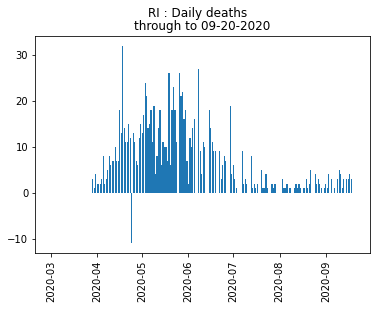

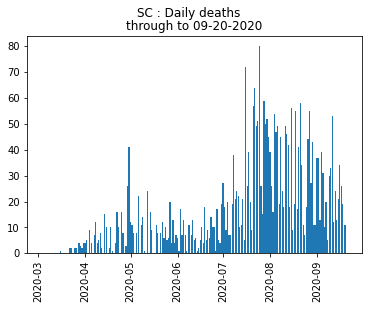

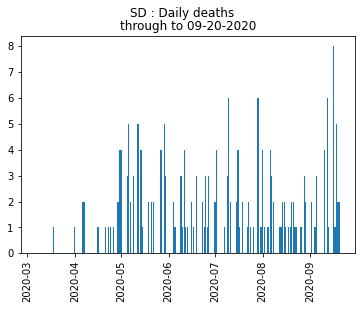

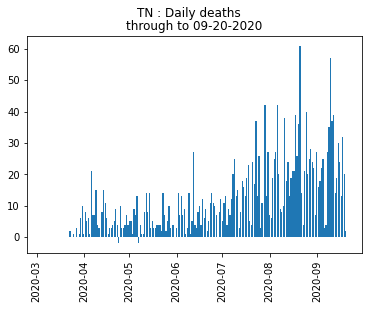

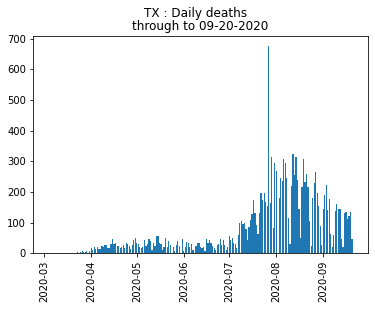

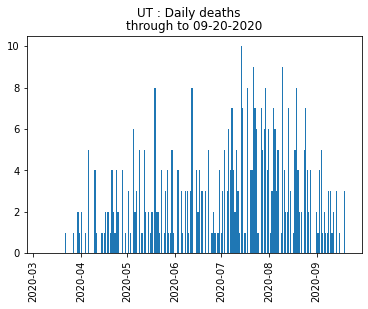

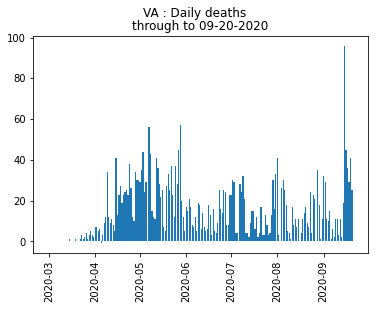

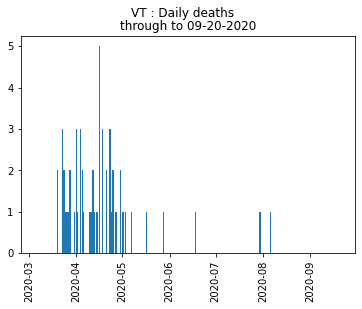

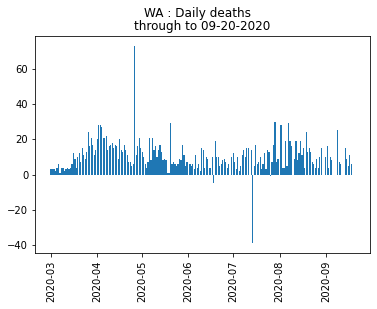

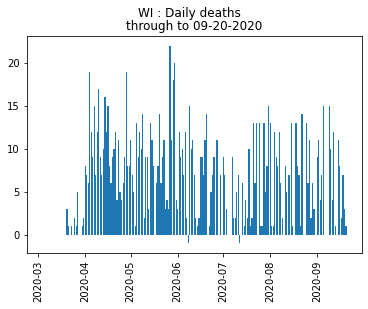

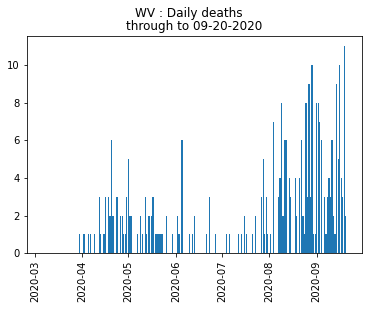

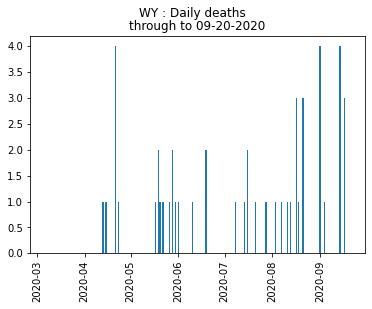

In [119]:
# Daily increase in deaths cases - long term charts

graph = 'Daily deaths'

for i in state_list:
    
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].deathIncrease)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'through to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

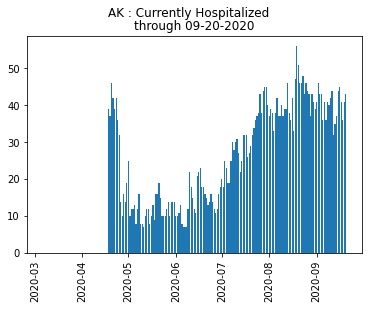

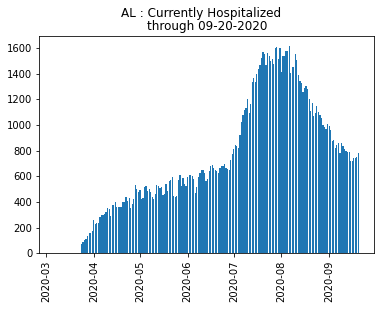

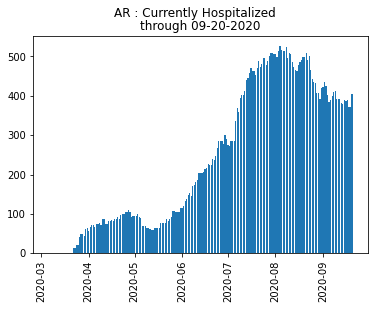

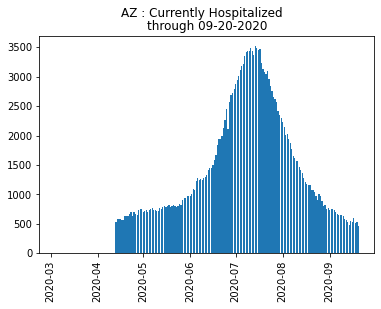

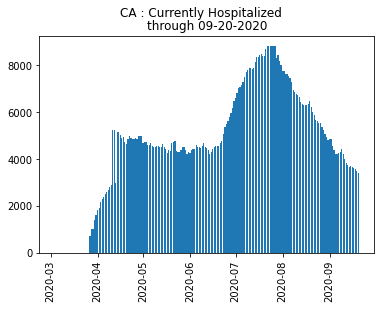

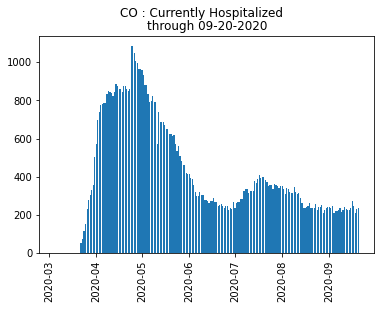

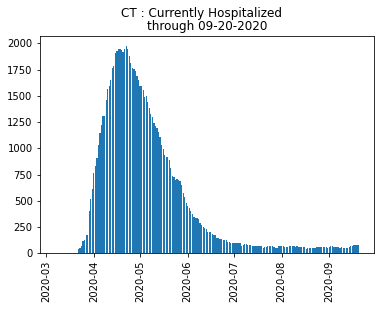

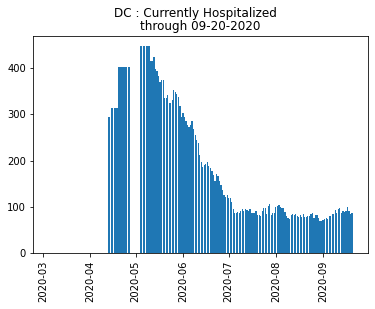

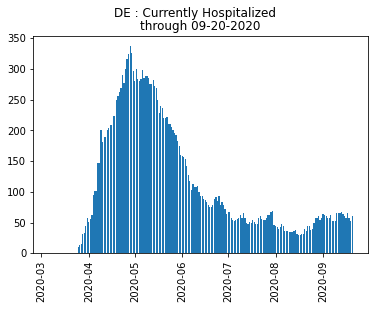

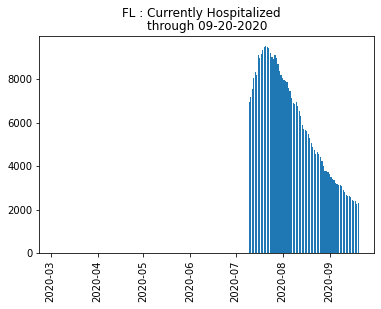

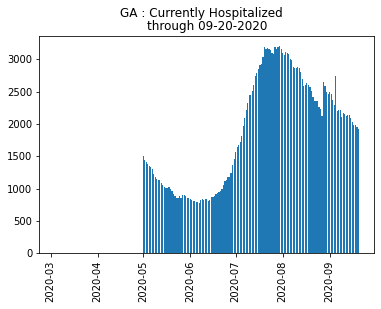

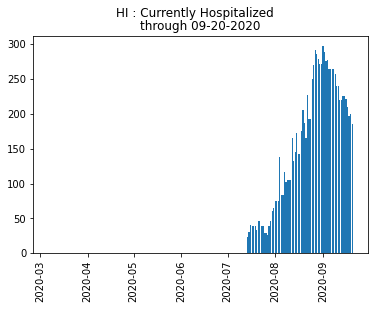

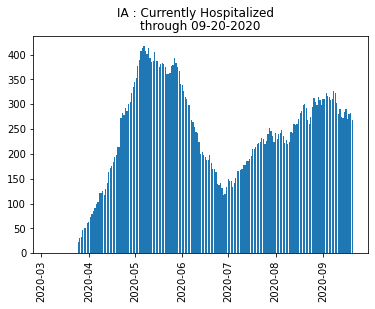

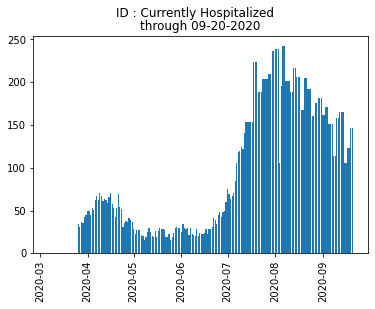

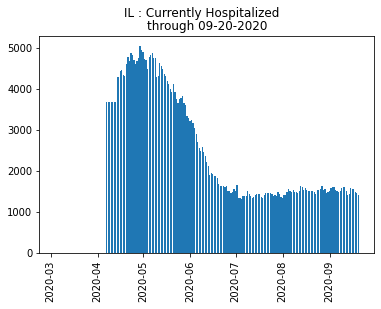

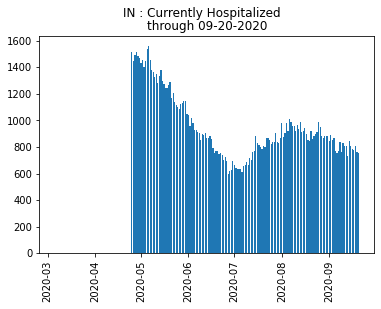

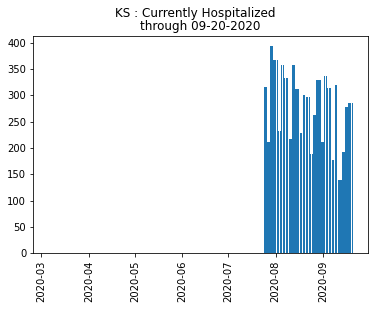

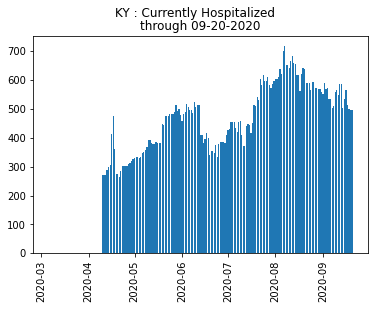

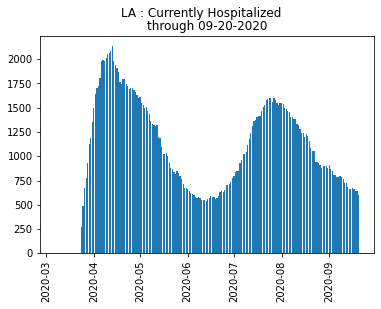

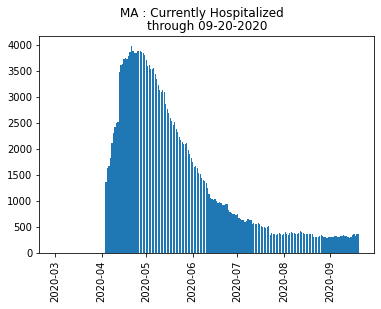

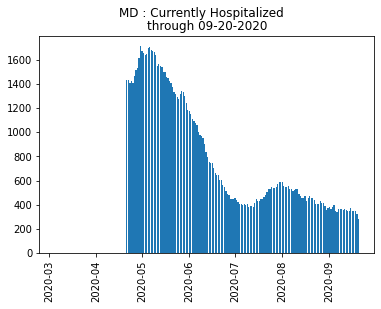

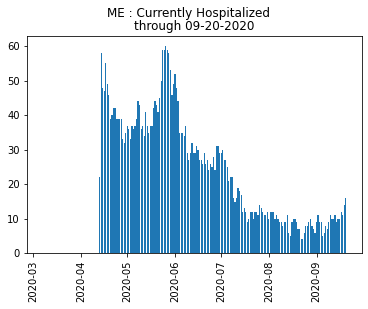

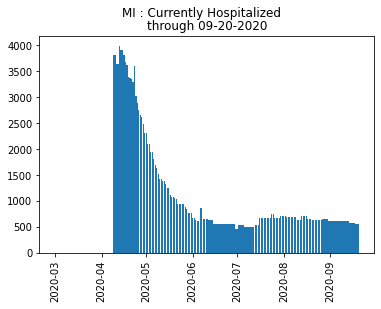

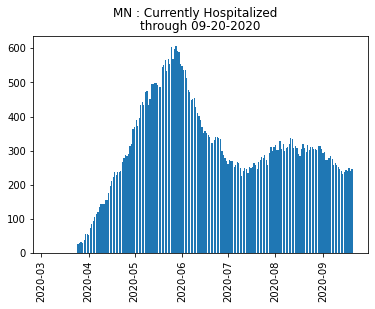

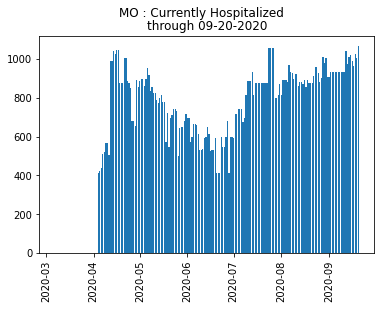

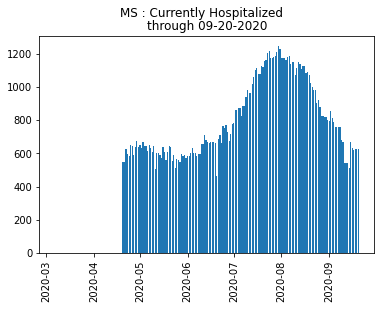

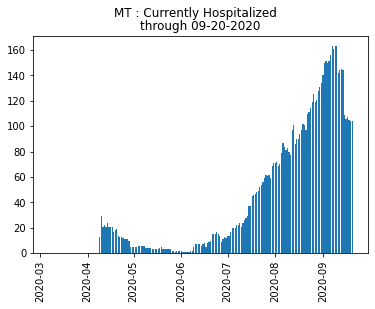

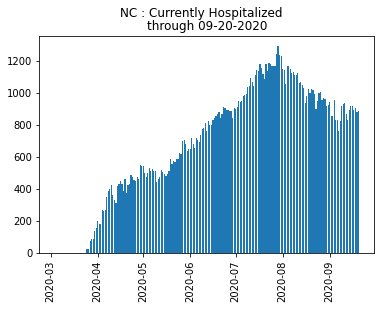

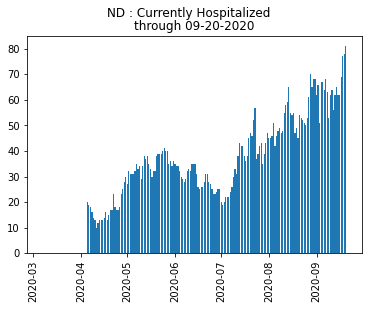

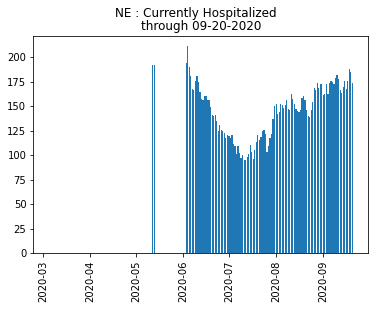

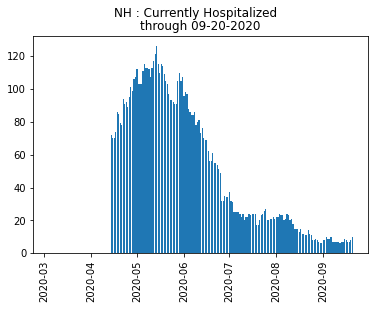

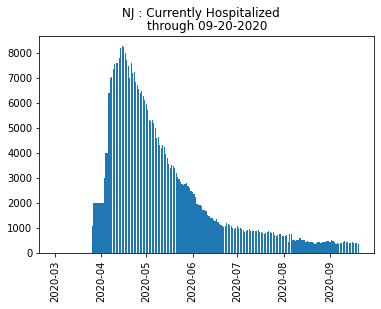

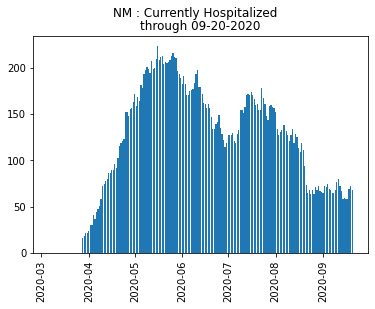

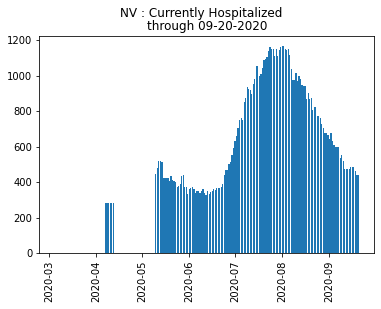

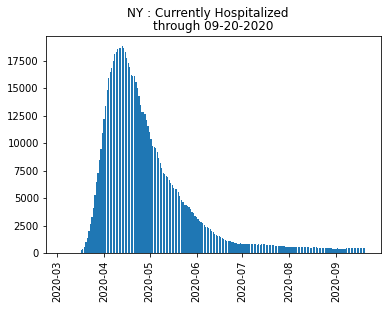

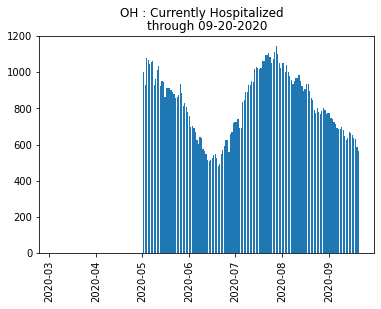

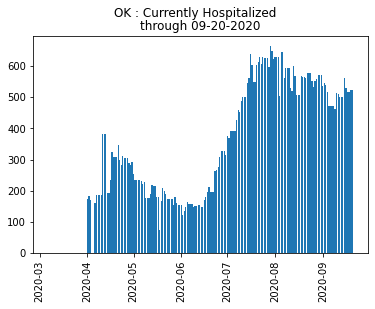

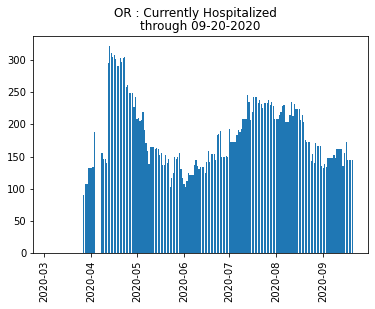

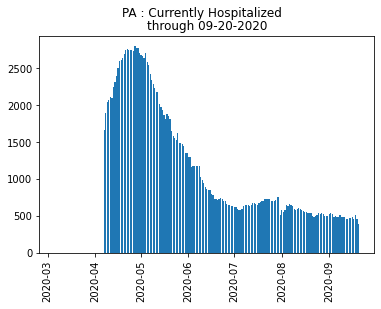

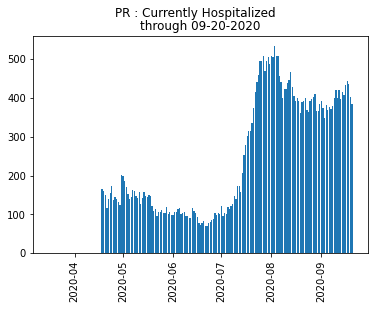

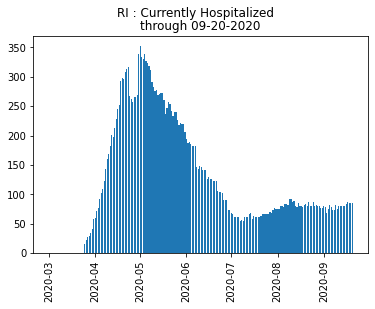

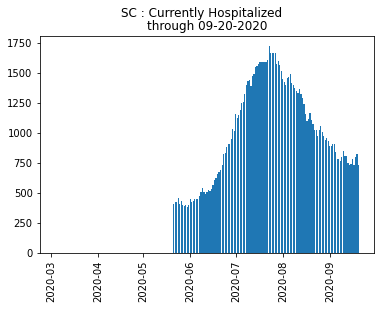

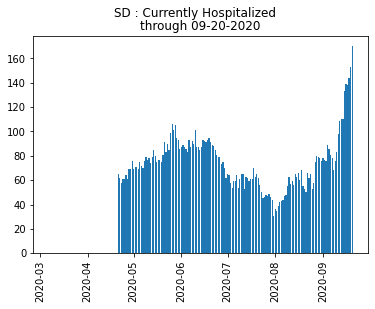

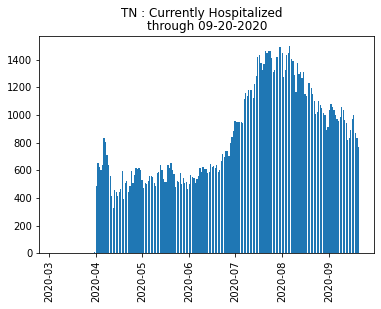

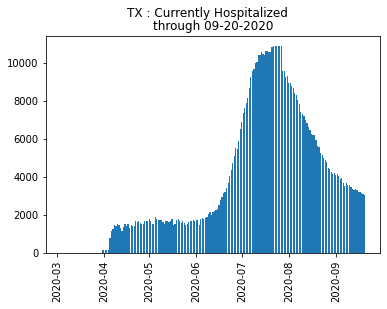

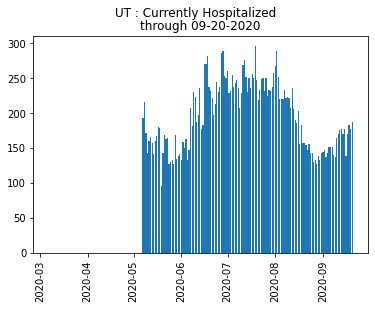

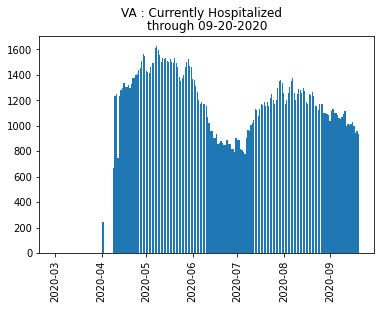

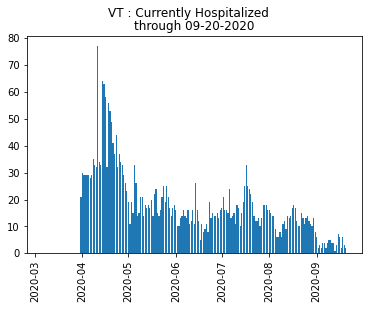

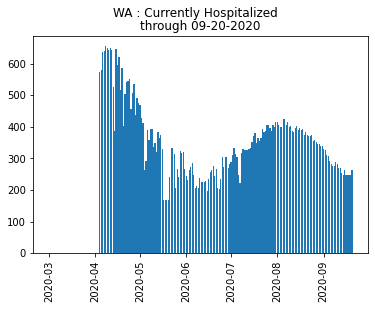

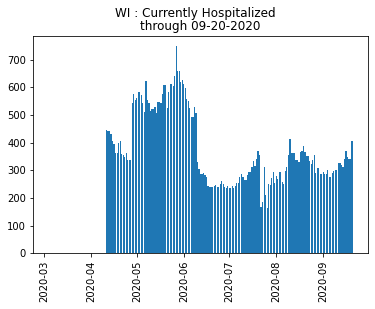

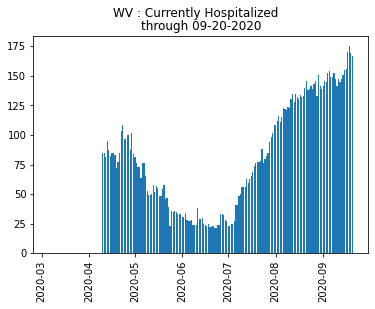

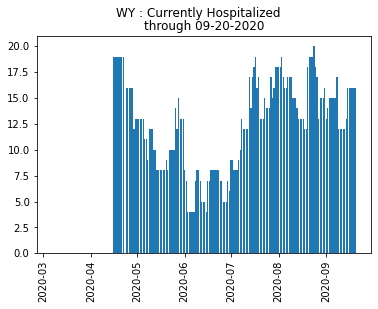

In [120]:
# Currently Hospitalized- long-term charts

graph = 'Currently Hospitalized'

for i in state_list:
    
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].hospitalizedCurrently)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'through {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

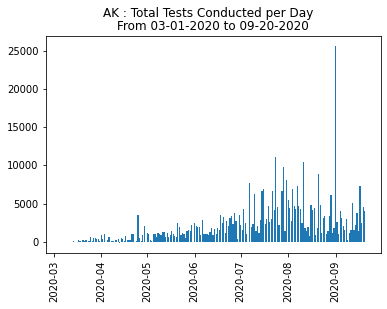

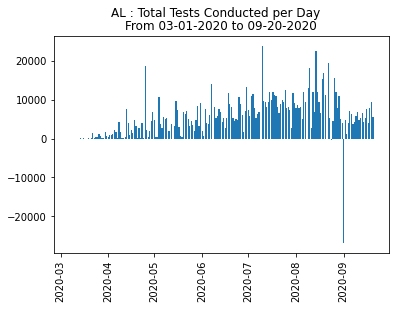

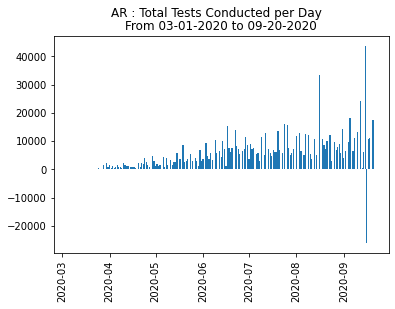

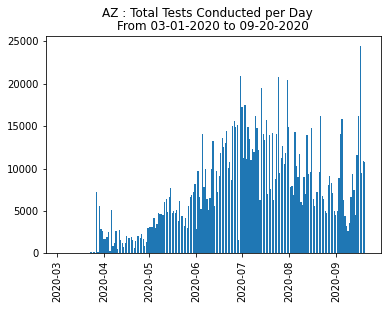

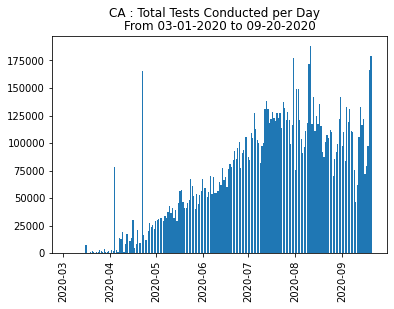

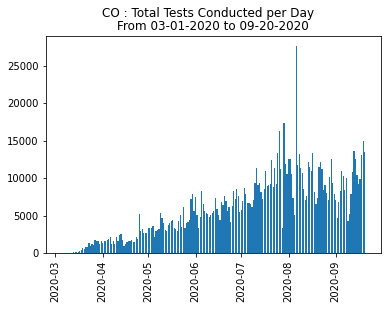

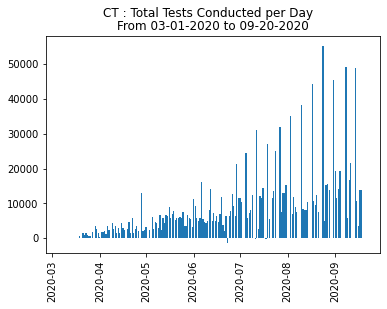

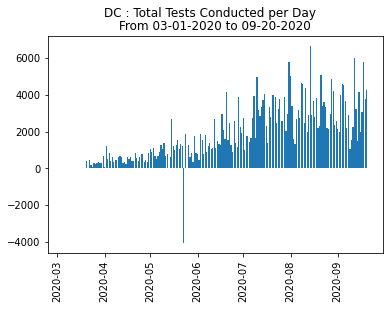

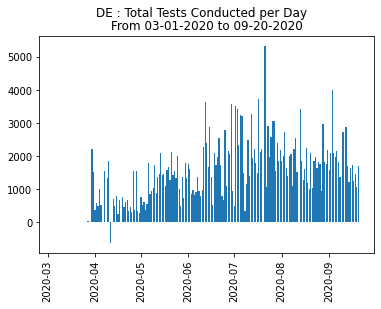

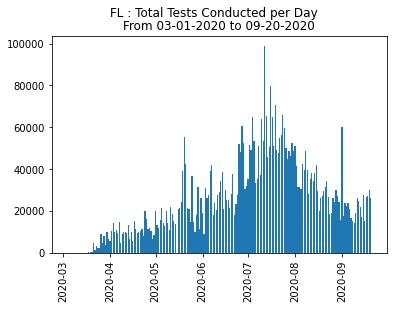

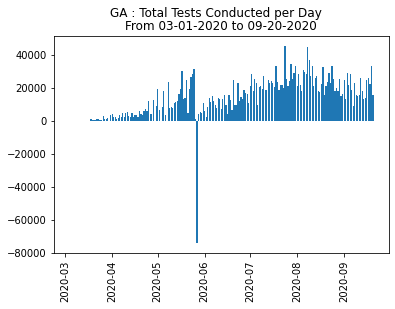

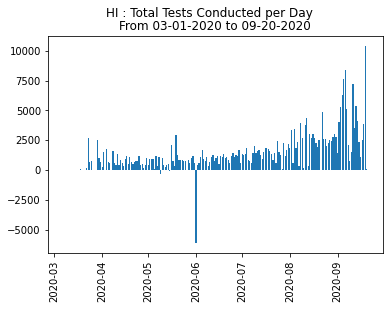

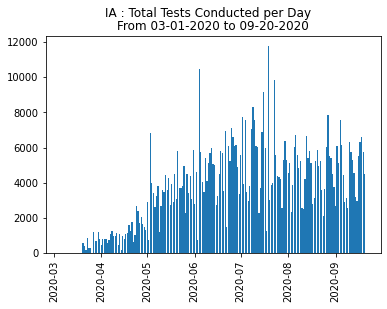

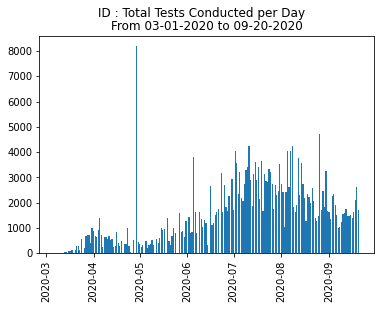

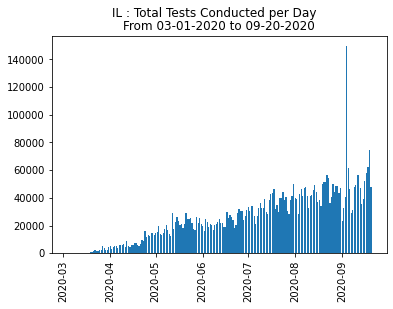

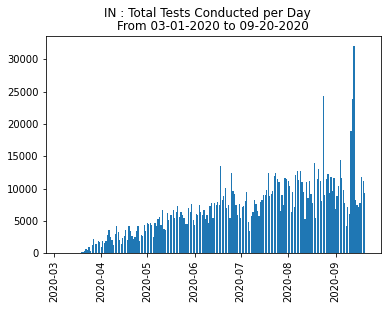

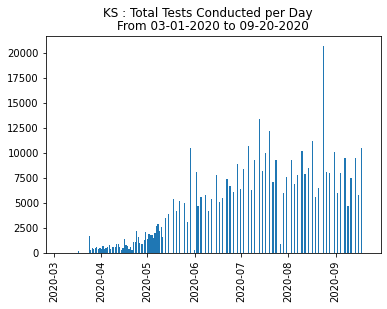

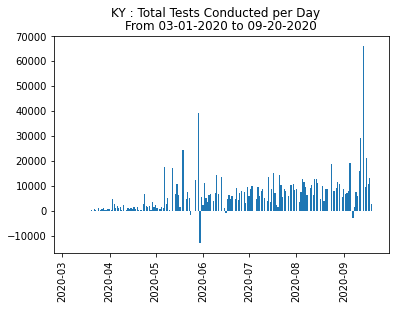

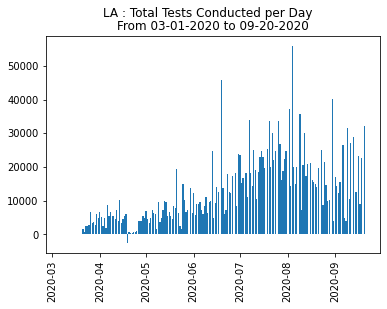

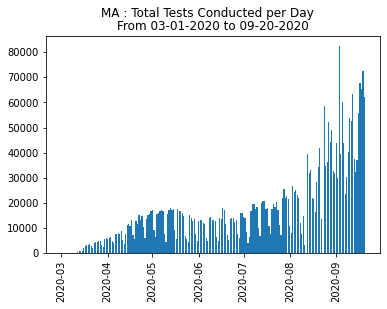

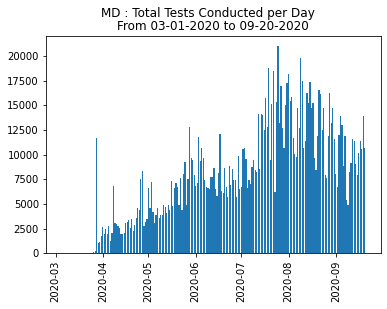

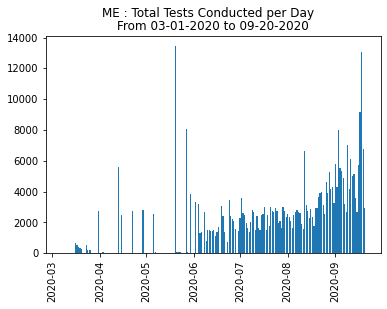

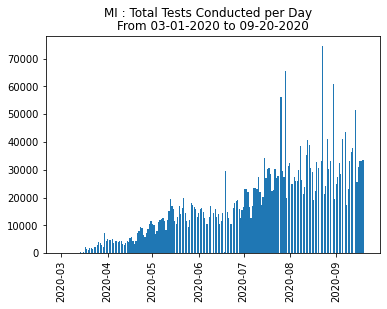

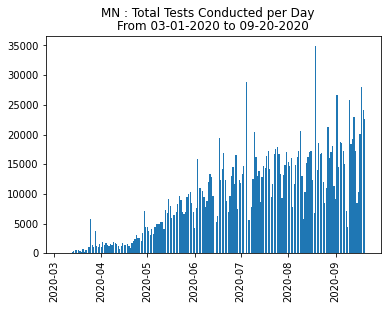

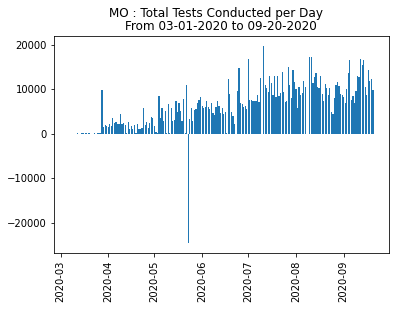

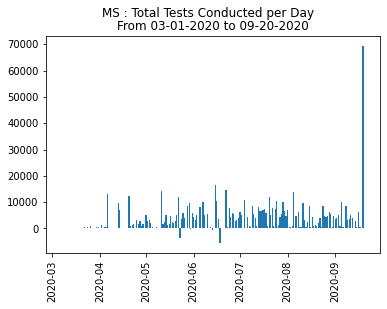

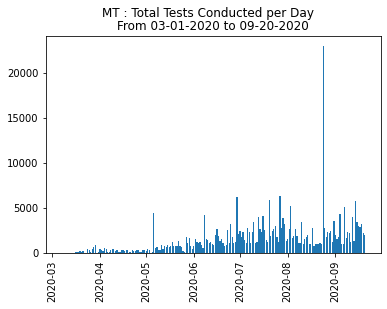

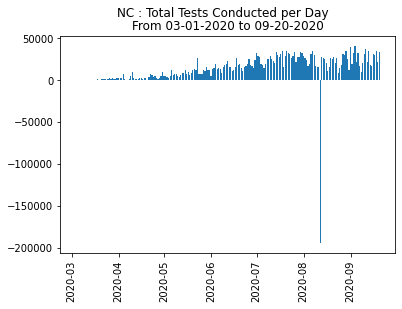

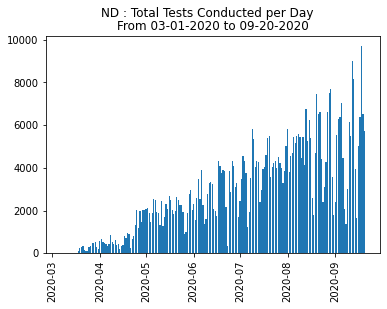

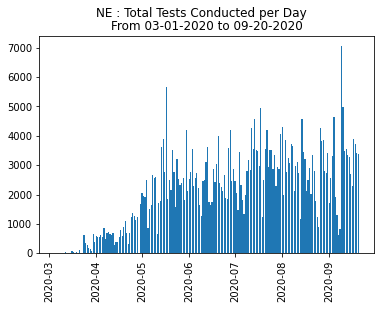

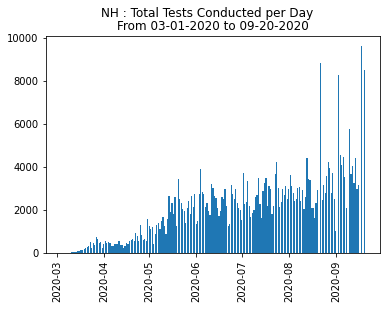

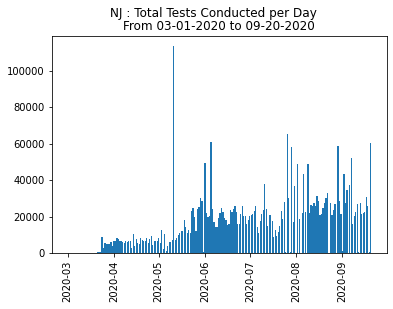

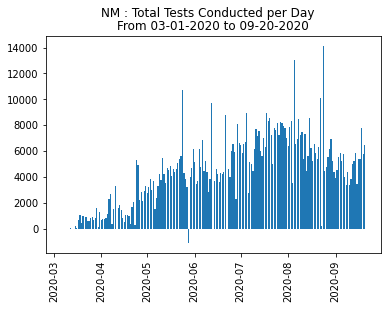

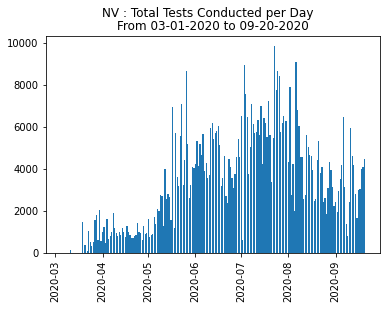

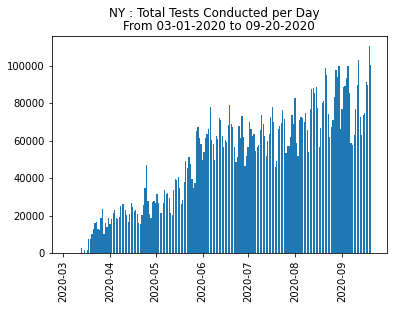

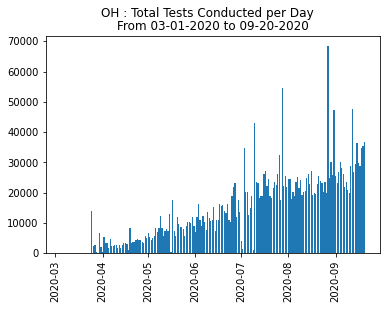

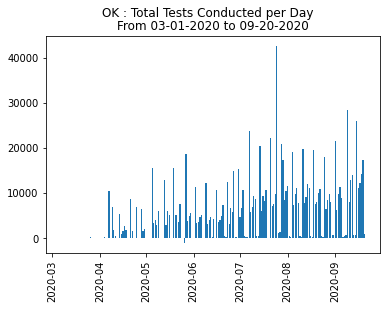

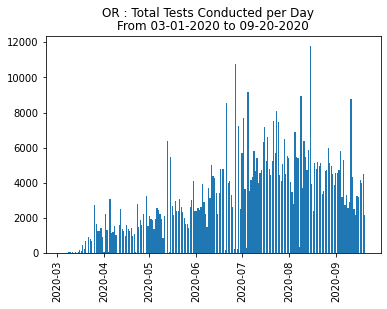

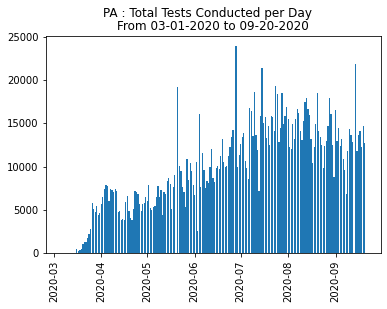

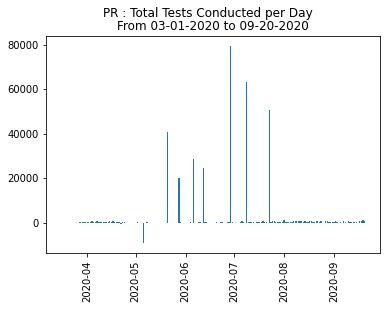

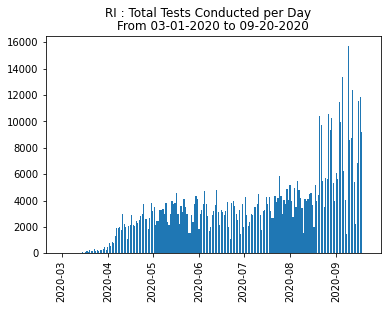

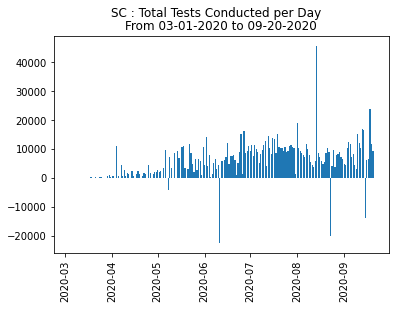

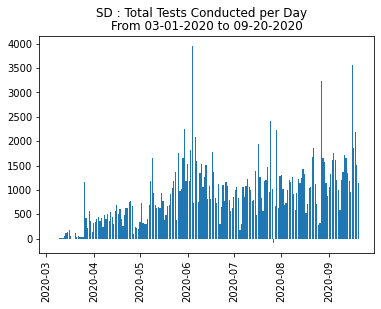

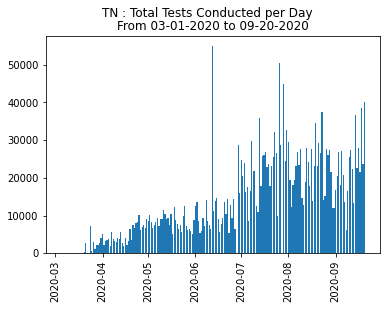

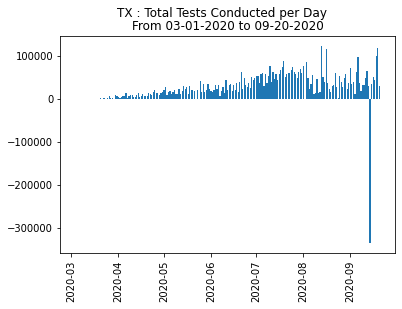

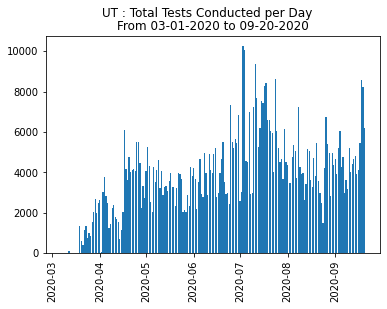

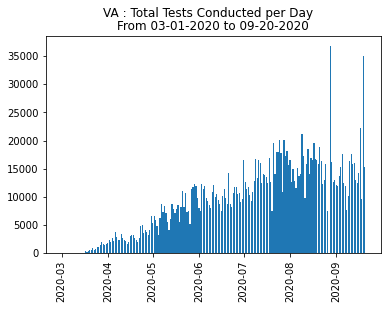

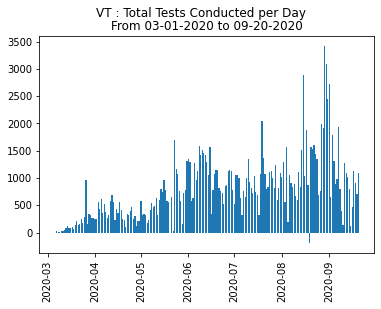

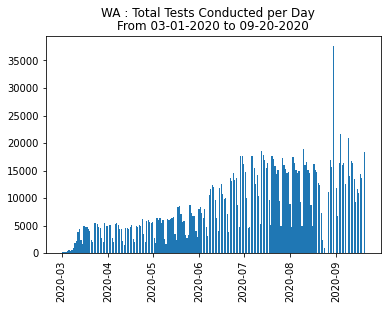

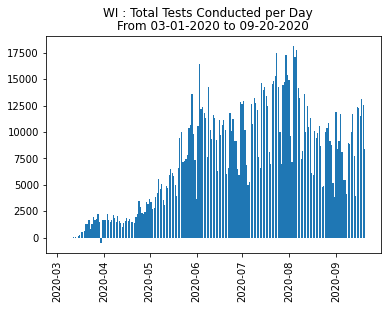

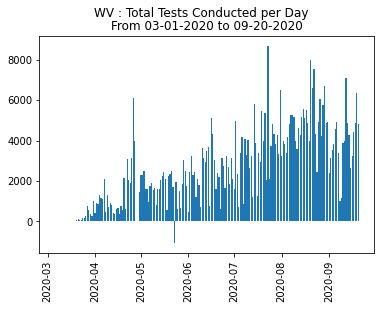

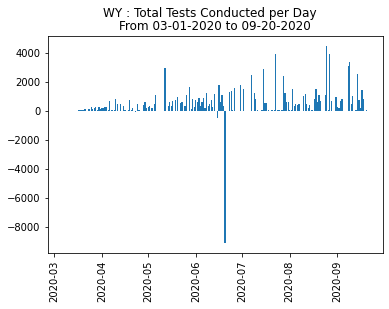

In [121]:
# Total Tests Conducted per Day

graph = 'Total Tests Conducted per Day'

for i in state_list:
    
    df = df_states[(df_states.state == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= alldata) & (df.date <= tday)].date, 
            df[(df.date >= alldata) & (df.date <= tday)].totalTestResultsIncrease)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {alldata} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
#plt.savefig(graph, bbox_inches='tight') # later I could save these files 

In [122]:
# Antibodies in NYC! this is over time- not sure its useful

#bring in the NYC C19 by age data from github

os.system('say "getting antibody data now"')

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/testing/antibody-by-week.csv'
df_antibyweek = pd.read_csv(url, error_bad_lines = False)
#df_antibyweek

df_antibyweek.PERCENT_POSITIVE *= 100
df_antibyweek[['weekdate', 'PERCENT_POSITIVE' ]].tail(10)


weekdate  PERCENT_POSITIVE
13  07/11/2020              19.7
14  07/18/2020              20.4
15  07/25/2020              20.8
16  08/01/2020              21.2
17  08/08/2020              20.6
18  08/15/2020              19.4
19  08/22/2020              20.1
20  08/29/2020              20.1
21  09/05/2020              20.2
22  09/12/2020              19.9

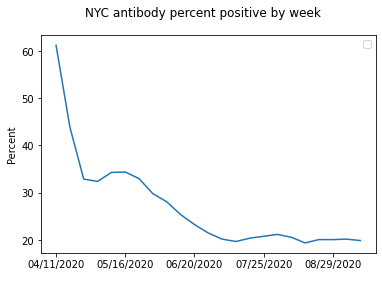

In [123]:
# antibody percent positive by week
df_antibyweek.plot( kind = 'line', x = 'weekdate', y = 'PERCENT_POSITIVE')
plt.suptitle('NYC antibody percent positive by week')
plt.legend('')
plt.ylabel('Percent')
plt.xlabel(' ')
plt.show()

In [124]:
# Antibodies in NYC by zipcode - want to play with this later

#bring in the NYC C19 by age data from github

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/testing/antibody-by-modzcta.csv'
df_antibyzip = pd.read_csv(url, error_bad_lines = False)

df_antibyzip.head(10)

modzcta_first  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  TEST_RATE
0          10001           7874          1240              15.7  33416.756
1          10002          19733          3290              16.7  25708.936
2          10003          14334          2096              14.6  26642.320
3          10004           1108           146              13.2  30351.126
4          10005           2419           368              15.2  28810.971
5          10006           1067           145              13.6  30858.027
6          10007           2474           311              12.6  29988.860
7          10009          15561          2450              15.7  26487.714
8          10010           9119          1244              13.6  28169.527
9          10011          15744          2278              14.5  31805.727

In [125]:
# Rename columns
df_antibyzip = df_antibyzip.rename(columns = {'modzcta_first':'zipcode', 
                                              'PERCENT_POSITIVE' : 'percent_positive', 
                                              'NUM_PEOP_TEST': 'number_people_tested',
                                              'NUM_PEOP_POS': 'number_people_positive',
                                              'TEST_RATE': 'test_rate'} )

df_antibyzip.head()

zipcode  number_people_tested  number_people_positive  percent_positive  \
0    10001                  7874                    1240              15.7   
1    10002                 19733                    3290              16.7   
2    10003                 14334                    2096              14.6   
3    10004                  1108                     146              13.2   
4    10005                  2419                     368              15.2   

   test_rate  
0  33416.756  
1  25708.936  
2  26642.320  
3  30351.126  
4  28810.971

In [126]:
df_antibyzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zipcode                 177 non-null    int64  
 1   number_people_tested    177 non-null    int64  
 2   number_people_positive  177 non-null    int64  
 3   percent_positive        177 non-null    float64
 4   test_rate               177 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.0 KB


In [127]:
# bring in NYC Zipcode excel here

df_city_zip = pd.read_csv('nyc_zip.csv')
df_city_zip

zcta10  stateco alloc  puma10  \
0     10451    36005     x    3710   
1     10452    36005     x    3708   
2     10453    36005     x    3707   
3     10454    36005     x    3710   
4     10455    36005     x    3710   
..      ...      ...   ...     ...   
206   10309    36085     x    3901   
207   10310    36085     x    3903   
208   10311    36085     x    3902   
209   10312    36085     x    3901   
210   10314    36085     x    3902   

                                              pumaname  \
0    NYC-Bronx Community District 1 & 2--Hunts Poin...   
1    NYC-Bronx Community District 4--Concourse, Hig...   
2    NYC-Bronx Community District 5--Morris Heights...   
3    NYC-Bronx Community District 1 & 2--Hunts Poin...   
4    NYC-Bronx Community District 1 & 2--Hunts Poin...   
..                                                 ...   
206  NYC-Staten Island Community District 3--Totten...   
207  NYC-Staten Island Community District 1--Port R...   
208  NYC-Staten Island Community District 2--New Sp...   
209  NYC-Staten Island Community District 3--Totten...   
210  NYC-Staten Island Community District 2--New Sp...   

                                      nameshort  per_in_puma  per_of_puma  
0               Hunts Point, Longwood & Melrose        0.482        0.141  
1            Concourse, Highbridge & Mount Eden        0.952        0.515  
2    Morris Heights, Fordham South & Mount Hope        0.984        0.574  
3               Hunts Point, Longwood & Melrose        1.000        0.239  
4               Hunts Point, Longwood & Melrose        1.000        0.254  
..                                          ...          ...          ...  
206         Tottenville, Great Kills & Annadale        1.000        0.203  
207  Port Richmond, Stapleton & Mariners Harbor        1.000        0.142  
208               New Springville & South Beach          NaN        0.000  
209         Tottenville, Great Kills & Annadale        1.000        0.371  
210               New Springville & South Beach        0.696        0.447  

[211 rows x 8 columns]

In [128]:
df_city_zip['zipcode'] = df_city_zip['zcta10']
df_city_zip

zcta10  stateco alloc  puma10  \
0     10451    36005     x    3710   
1     10452    36005     x    3708   
2     10453    36005     x    3707   
3     10454    36005     x    3710   
4     10455    36005     x    3710   
..      ...      ...   ...     ...   
206   10309    36085     x    3901   
207   10310    36085     x    3903   
208   10311    36085     x    3902   
209   10312    36085     x    3901   
210   10314    36085     x    3902   

                                              pumaname  \
0    NYC-Bronx Community District 1 & 2--Hunts Poin...   
1    NYC-Bronx Community District 4--Concourse, Hig...   
2    NYC-Bronx Community District 5--Morris Heights...   
3    NYC-Bronx Community District 1 & 2--Hunts Poin...   
4    NYC-Bronx Community District 1 & 2--Hunts Poin...   
..                                                 ...   
206  NYC-Staten Island Community District 3--Totten...   
207  NYC-Staten Island Community District 1--Port R...   
208  NYC-Staten Island Community District 2--New Sp...   
209  NYC-Staten Island Community District 3--Totten...   
210  NYC-Staten Island Community District 2--New Sp...   

                                      nameshort  per_in_puma  per_of_puma  \
0               Hunts Point, Longwood & Melrose        0.482        0.141   
1            Concourse, Highbridge & Mount Eden        0.952        0.515   
2    Morris Heights, Fordham South & Mount Hope        0.984        0.574   
3               Hunts Point, Longwood & Melrose        1.000        0.239   
4               Hunts Point, Longwood & Melrose        1.000        0.254   
..                                          ...          ...          ...   
206         Tottenville, Great Kills & Annadale        1.000        0.203   
207  Port Richmond, Stapleton & Mariners Harbor        1.000        0.142   
208               New Springville & South Beach          NaN        0.000   
209         Tottenville, Great Kills & Annadale        1.000        0.371   
210               New Springville & South Beach        0.696        0.447   

     zipcode  
0      10451  
1      10452  
2      10453  
3      10454  
4      10455  
..       ...  
206    10309  
207    10310  
208    10311  
209    10312  
210    10314  

[211 rows x 9 columns]

In [129]:
#df_city_zip.drop(['zcta10'], axis = 1)

df_city_zip = df_city_zip.drop(['zcta10', 'stateco', 'alloc', 'puma10', 'pumaname', 'per_in_puma', 'per_of_puma'], axis = 1)

In [130]:
# now, merge them!  Try outer joint first.  it worked!

df_antibyzip_new = pd.merge(df_antibyzip, df_city_zip, on = 'zipcode', how = 'outer')

df_antibyzip_new[['zipcode', 'nameshort', 'percent_positive', 'number_people_tested']]

zipcode                                     nameshort  percent_positive  \
0      10001  Chelsea, Clinton & Midtown Business District              15.7   
1      10002                   Chinatown & Lower East Side              16.7   
2      10003                   Chinatown & Lower East Side              14.6   
3      10004   Battery Park City, Greenwich Village & Soho              13.2   
4      10005   Battery Park City, Greenwich Village & Soho              15.2   
..       ...                                           ...               ...   
206    11371                Jackson Heights & North Corona               NaN   
207    11424                     Richmond Hill & Woodhaven               NaN   
208    11430                     Howard Beach & Ozone Park               NaN   
209    11451                  Jamaica, Hollis & St. Albans               NaN   
210    10311                 New Springville & South Beach               NaN   

     number_people_tested  
0                  7874.0  
1                 19733.0  
2                 14334.0  
3                  1108.0  
4                  2419.0  
..                    ...  
206                   NaN  
207                   NaN  
208                   NaN  
209                   NaN  
210                   NaN  

[211 rows x 4 columns]

In [131]:
# it worked! But interesting that some areas show no numbers

# maybe I should do a pickle here to keep the zipcode and name dbase for further use

In [132]:
# Just trying to see what the numbers look like  also : at end of string sets format spec

print(f'The highest % antibodies in any one zipcode is {int(df_antibyzip.percent_positive.max()):0.0f}%')
print(f'The lowest % antibodies in any one zipcode is {int(df_antibyzip.percent_positive.min()):0.0f}%')
print(f'The average % antibodies across zipcodes is {int(df_antibyzip.percent_positive.mean()):0.0f}%')
print(f'The % antibodies in Williamsburg is {float(df_antibyzip[df_antibyzip.zipcode == 11211].percent_positive)}%')

The highest % antibodies in any one zipcode is 48%
The lowest % antibodies in any one zipcode is 12%
The average % antibodies across zipcodes is 23%
The % antibodies in Williamsburg is 30.8%


In [133]:
#top ten zip codes
# I want to pull in a database of what area each zipcode is
#bring in the NYC zip data base and practice merging the two dataframes!

print('The zipcodes/neighborhoods with highest antibody rate:')
df_antibyzip_new[[ 'zipcode', 'nameshort', 'percent_positive' ]]\
.nlargest(10, 'percent_positive').reset_index(drop = True)

The zipcodes/neighborhoods with highest antibody rate:


zipcode                                   nameshort  percent_positive
0    11368                     Elmhurst & South Corona              48.9
1    11219    Borough Park, Kensington & Ocean Parkway              44.2
2    11369              Jackson Heights & North Corona              43.7
3    11372              Jackson Heights & North Corona              38.2
4    10452          Concourse, Highbridge & Mount Eden              37.9
5    10453  Morris Heights, Fordham South & Mount Hope              37.3
6    10468       Bedford Park, Fordham North & Norwood              37.1
7    11213      Crown Heights North & Prospect Heights              37.1
8    10474             Hunts Point, Longwood & Melrose              36.0
9    10457  Morris Heights, Fordham South & Mount Hope              35.7

Text(0.5, 0.98, 'Areas in NYC the highest antibody rate')

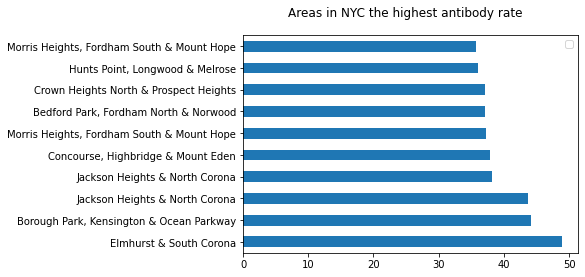

In [134]:
# try to do a bar plot here

df_antibyzip_new.nlargest(10, 'percent_positive').plot(kind = 'barh', x = 'nameshort', y = 'percent_positive')
plt.ylabel('')
plt.legend('')
plt.suptitle('Areas in NYC the highest antibody rate')

In [135]:
#bottom ten zip codes  (I guessed they would have a nsmallest and they do!)

print('The zipcodes/neighborhoods with the lowest antibody rates:')
df_antibyzip_new[[ 'zipcode', 'nameshort', 'percent_positive' ]]\
.nsmallest(10, 'percent_positive').reset_index(drop = True)

The zipcodes/neighborhoods with the lowest antibody rates:


zipcode                                    nameshort  percent_positive
0    10023                  Upper West Side & West Side              12.1
1    10065                              Upper East Side              12.1
2    10128                              Upper East Side              12.2
3    10280  Battery Park City, Greenwich Village & Soho              12.2
4    11109                         Sunnyside & Woodside              12.3
5    10017      Murray Hill, Gramercy & Stuyvesant Town              12.5
6    10069                  Upper West Side & West Side              12.5
7    10007  Battery Park City, Greenwich Village & Soho              12.6
8    10022      Murray Hill, Gramercy & Stuyvesant Town              12.6
9    11215       Park Slope, Carroll Gardens & Red Hook              12.6

Text(0.5, 0.98, 'Areas in NYC the lowest antibody rate')

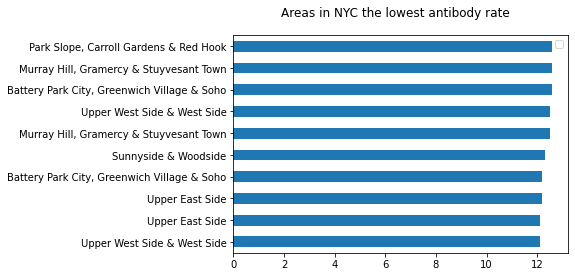

In [136]:
# do a plot

df_antibyzip_new.nsmallest(10, 'percent_positive').plot(kind ='barh', x = 'nameshort', y = 'percent_positive')
plt.ylabel('')
plt.legend('')
plt.suptitle('Areas in NYC the lowest antibody rate')

In [137]:
#define a function to determine the positive antibody rate in a zipcode
# just change the zipcode variable below

zip = 11211

print(f' {float(df_antibyzip[df_antibyzip.zipcode == zip].percent_positive)}% in zipcode {zip} have antibodies')

#williamsburg has a lot!

 30.8% in zipcode 11211 have antibodies


In [138]:
# Antibodies in NYC by age group

url = "https://raw.githubusercontent.com/nychealth/coronavirus-data/master/testing/antibody-by-age.csv"
df_antibyage = pd.read_csv(url, error_bad_lines = False)

df_antibyage.head(10)

demo_variable  NUM_PEOP_TEST  NUM_PEOP_POS  PERCENT_POSITIVE  TEST_RATE
0   AgeA_0-17_years         153822         46348             0.301   8907.295
1  AgeB_18-44_years         856814        206876             0.241  25427.121
2  AgeC_45-64_years         650910        176117             0.271  31658.308
3  AgeD_65-74_years         216199         49044             0.227  30924.536
4   AgeE_GE75_years         121184         24026             0.198  22155.309

In [139]:
# Rename columns here  

# Rename a column  (use inplace = True)
df_antibyage = df_antibyage.rename(columns = {  'demo_variable':'age_group', 
                                                'PERCENT_POSITIVE' : 'percent_positive', 
                                                'NUM_PEOP_TEST': 'number_people_tested', 
                                                'NUM_PEOP_POS': 'number_people_positive', 
                                                'TEST_RATE': 'test_rate'})

df_antibyage = df_antibyage.rename(index = {0:'0-17 years', 
                                                1: '18-44 years', 
                                                2: '45-64 years',
                                                3: '65-74 years', 
                                                4: 'over 75'})

df_antibyage = df_antibyage.drop(columns = 'age_group')

df_antibyage.head()

number_people_tested  number_people_positive  percent_positive  \
0-17 years                 153822                   46348             0.301   
18-44 years                856814                  206876             0.241   
45-64 years                650910                  176117             0.271   
65-74 years                216199                   49044             0.227   
over 75                    121184                   24026             0.198   

             test_rate  
0-17 years    8907.295  
18-44 years  25427.121  
45-64 years  31658.308  
65-74 years  30924.536  
over 75      22155.309

In [140]:
# do this just to make the units better for the chart

df_antibyage.percent_positive = df_antibyage.percent_positive * 100

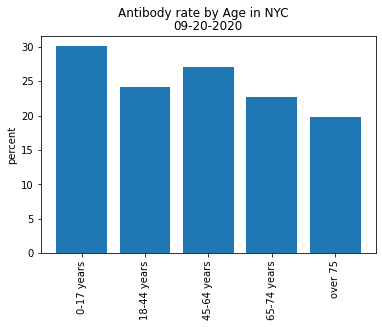

In [141]:
# Antibodies in NYC by age group: RATE - this is interesting!

plt.bar(df_antibyage.index , df_antibyage.percent_positive)
plt.suptitle(f'Antibody rate by Age in NYC')
plt.title(tday)
plt.ylabel('percent')
plt.savefig('antibyage.png', bbox_inches='tight')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

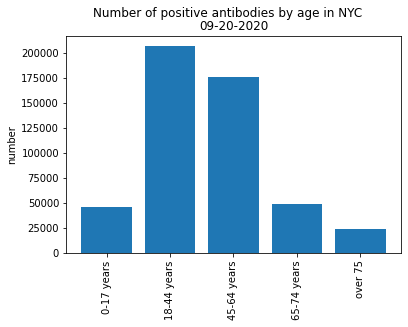

In [142]:
# Antibodies in NYC by age group: total positive - not real useful, actually

plt.bar(df_antibyage.index , df_antibyage.number_people_positive)
plt.suptitle(f'Number of positive antibodies by age in NYC')
plt.title(tday)
plt.ylabel('number')
plt.savefig('antibyagetotal.png', bbox_inches='tight')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

In [143]:
# Antibodies in NYC by age group - pull in data, rename columns, *100 percent

url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/testing/antibody-by-boro.csv'
df_antibyboro = pd.read_csv(url, error_bad_lines = False)

df_antibyboro = df_antibyboro.rename(columns = {'demo_variable':'boro', 
                                                'PERCENT_POSITIVE' : 'percent_positive', 
                                                'NUM_PEOP_TEST': 'number_people_tested',
                                                'NUM_PEOP_POS': 'number_people_positive', 
                                                'TEST_RATE': 'test_rate'})
df_antibyboro = df_antibyboro.rename(index = {0:'Bronx', 
                                                1: 'Brooklyn', 
                                                2: 'Manhattan',
                                                3: 'Queens', 
                                                4: 'Staten Island'})

df_antibyboro = df_antibyboro.drop(columns = 'boro')

df_antibyboro.percent_positive = df_antibyboro.percent_positive * 100
df_antibyboro.head()

number_people_tested  number_people_positive  percent_positive  \
Bronx                        276414                   87754              31.7   
Brooklyn                     607460                  160945              26.5   
Manhattan                    442591                   81882              18.5   
Queens                       568612                  151936              26.7   
Staten Island                105263                   20288              19.3   

               test_rate  
Bronx          19300.875  
Brooklyn       23519.163  
Manhattan      27174.478  
Queens         24951.095  
Staten Island  22105.763

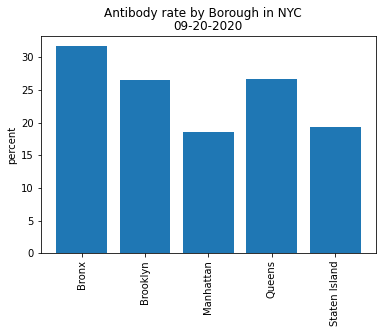

In [144]:
#Antibodies by Borough - rate
plt.bar(df_antibyboro.index, df_antibyboro.percent_positive)
plt.suptitle(f'Antibody rate by Borough in NYC')
plt.title(tday)
plt.ylabel('percent')
plt.savefig('antibyboro.png', bbox_inches='tight')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

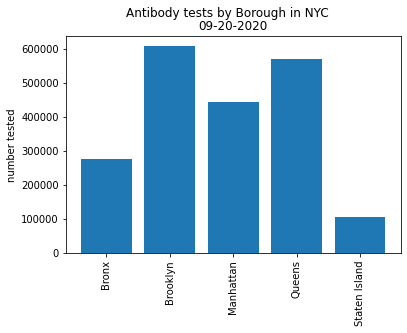

In [145]:
#Antibodies by Borough - total tested
plt.bar(df_antibyboro.index , df_antibyboro.number_people_tested)
plt.suptitle(f'Antibody tests by Borough in NYC')
plt.title(tday)
plt.ylabel('number tested')
plt.savefig('antibyborotest.png', bbox_inches='tight')
plt.xticks(rotation = 90)   # this rotates it 90 degrees
plt.show()

In [146]:
# bring in the global datbase

os.system('say "getting world data now"')
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

df_world = pd.read_csv(url, error_bad_lines = False)
df_world

iso_code continent       location        date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan  2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan  2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan  2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan  2020-01-04          0.0        0.0   
...        ...       ...            ...         ...          ...        ...   
44991      NaN       NaN  International  2020-09-16        696.0        NaN   
44992      NaN       NaN  International  2020-09-17        696.0        NaN   
44993      NaN       NaN  International  2020-09-18        696.0        NaN   
44994      NaN       NaN  International  2020-09-19        696.0        NaN   
44995      NaN       NaN  International  2020-09-20        696.0        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           0.0         0.0                  NaN  ...   
1                     NaN           0.0         0.0                  NaN  ...   
2                     NaN           0.0         0.0                  NaN  ...   
3                     NaN           0.0         0.0                  NaN  ...   
4                     NaN           0.0         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
44991                 NaN           7.0         NaN                  NaN  ...   
44992                 NaN           7.0         NaN                  NaN  ...   
44993                 NaN           7.0         NaN                  NaN  ...   
44994                 NaN           7.0         NaN                  NaN  ...   
44995                 NaN           7.0         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
44991             NaN              NaN                    NaN   
44992             NaN              NaN                    NaN   
44993             NaN              NaN                    NaN   
44994             NaN              NaN                    NaN   
44995             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
44991                  NaN             NaN           NaN   
44992                  NaN             NaN           NaN   
44993                  NaN             NaN           NaN   
44994                  NaN             NaN           NaN   
44995                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
44991                     NaN       

In [147]:
# world size

saysize(df_world)

The dataframe has 1,844,836 data points


In [148]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44731 non-null  object 
 1   continent                        44466 non-null  object 
 2   location                         44996 non-null  object 
 3   date                             44996 non-null  object 
 4   total_cases                      44393 non-null  float64
 5   new_cases                        44192 non-null  float64
 6   new_cases_smoothed               43410 non-null  float64
 7   total_deaths                     44393 non-null  float64
 8   new_deaths                       44192 non-null  float64
 9   new_deaths_smoothed              43410 non-null  float64
 10  total_cases_per_million          44128 non-null  float64
 11  new_cases_per_million            44128 non-null  float64
 12  new_cases_smoothed

In [149]:
df_world.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 41 columns]

In [150]:
#remove "World" location- I don't want the sum here
df_world = df_world[df_world.location != 'World']

In [151]:
# more clean up
df_world = df_world[df_world.location != 'International']

In [152]:
# Tell Pandas that the DATE_OF_INTEREST column contains a DATETIME
df_world.date = pd.to_datetime(df_world.date)
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 44465
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         44466 non-null  object        
 1   continent                        44466 non-null  object        
 2   location                         44466 non-null  object        
 3   date                             44466 non-null  datetime64[ns]
 4   total_cases                      43863 non-null  float64       
 5   new_cases                        43863 non-null  float64       
 6   new_cases_smoothed               43086 non-null  float64       
 7   total_deaths                     43863 non-null  float64       
 8   new_deaths                       43863 non-null  float64       
 9   new_deaths_smoothed              43086 non-null  float64       
 10  total_cases_per_million          43863 non-null  float64  

In [153]:
df_world.location.value_counts().reset_index().head()

index  location
0   Thailand       265
1  Singapore       265
2    Ecuador       265
3      India       265
4    Germany       265

In [154]:
df_world.groupby('location').new_cases.sum().head().reset_index()

location  new_cases
0  Afghanistan    39044.0
1      Albania    12226.0
2      Algeria    49623.0
3      Andorra     1564.0
4       Angola     3901.0

In [155]:
#top ten countries by number of cases

print('Total cases in the top 10 countries')
( df_world.groupby('location').total_cases.max().reset_index()
 .sort_values('total_cases', ascending = False).head(10) )

Total cases in the top 10 countries


location  total_cases
199  United States    6764962.0
90           India    5400619.0
27          Brazil    4528240.0
157         Russia    1097251.0
150           Peru     762865.0
42        Colombia     758398.0
125         Mexico     694121.0
174   South Africa     659656.0
177          Spain     640040.0
7        Argentina     613645.0

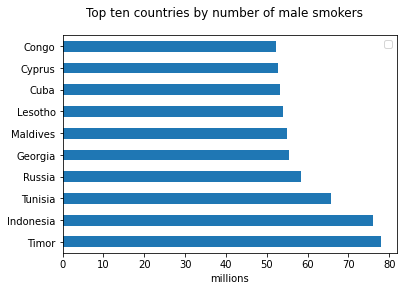

In [156]:
# a chart- OTHER STATS: MOST MALE SMOKERS

( df_world.groupby('location').male_smokers.mean().reset_index()
 .sort_values('male_smokers', ascending = False).head(10) ).plot(kind ='barh', x = 'location', y = 'male_smokers')
plt.suptitle('Top ten countries by number of male smokers')
plt.xlabel('millions')
plt.ylabel('')
plt.legend('')

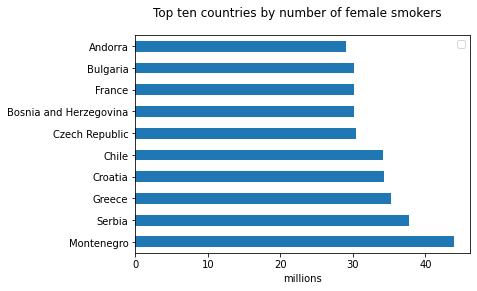

In [157]:
# a chart- OTHER STATS: MOST FEMALE SMOKERS

( df_world.groupby('location').female_smokers.mean().reset_index()
 .sort_values('female_smokers', ascending = False).head(10) ).plot(kind ='barh', x = 'location', y = 'female_smokers')
plt.suptitle('Top ten countries by number of female smokers')
plt.xlabel('millions')
plt.ylabel('')
plt.legend('')

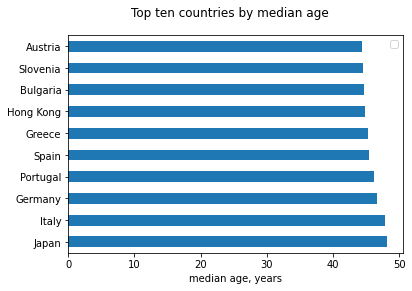

In [158]:
# a chart- OTHER STATS: MEDIAN AGE: OLDEST

( df_world.groupby('location').median_age.mean().reset_index()
 .sort_values('median_age', ascending = False).head(10) ).plot(kind ='barh', x = 'location', y = 'median_age')
plt.suptitle('Top ten countries by median age')
plt.xlabel('median age, years')
plt.ylabel('')
plt.legend('')

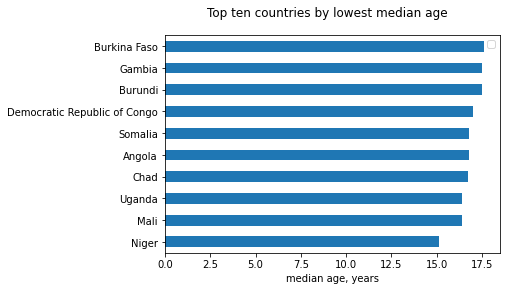

In [159]:
# a chart- OTHER STATS: MEDIAN AGE: YOUNGEST

( df_world.groupby('location').median_age.mean().reset_index()
 .sort_values('median_age', ascending = True).head(10) ).plot(kind ='barh', x = 'location', y = 'median_age')
plt.suptitle('Top ten countries by lowest median age')
plt.xlabel('median age, years')
plt.ylabel('')
plt.legend('')

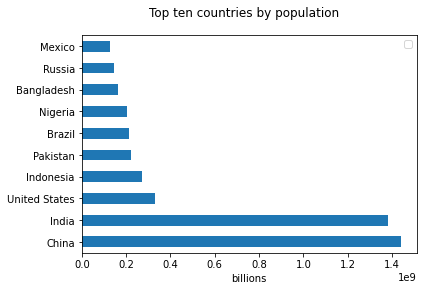

In [160]:
# a chart- OTHER STATS: POPULATION

( df_world.groupby('location').population.max().reset_index()
 .sort_values('population', ascending = False).head(10) ).plot(kind ='barh', x = 'location', y = 'population')
plt.suptitle('Top ten countries by population')
plt.ylabel('')
plt.xlabel('billions')
plt.legend('')

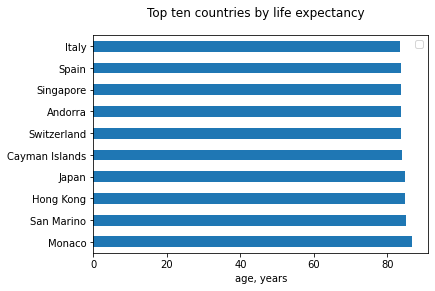

In [161]:
# a chart- OTHER STATS: longest life expectancy

( df_world.groupby('location').life_expectancy.max().reset_index()
 .sort_values('life_expectancy', ascending = False).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'life_expectancy')

plt.suptitle('Top ten countries by life expectancy')
plt.ylabel('')
plt.xlabel('age, years')
plt.legend('')

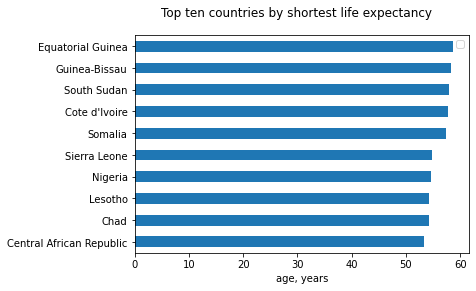

In [162]:
# a chart- OTHER STATS: shortest life expectancy

( df_world.groupby('location').life_expectancy.max().reset_index()
 .sort_values('life_expectancy', ascending = True).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'life_expectancy')

plt.suptitle('Top ten countries by shortest life expectancy')
plt.ylabel('')
plt.xlabel('age, years')
plt.legend('')

Text(0, 0.5, '')

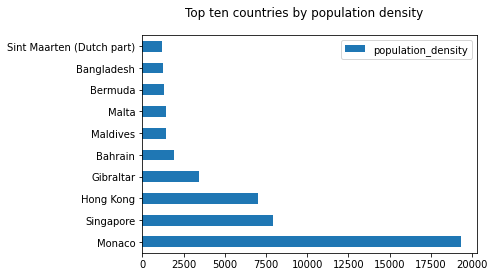

In [163]:
# a chart- OTHER STATS: highest population density

( df_world.groupby('location').population_density.max().reset_index()
 .sort_values('population_density', ascending = False).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'population_density')

plt.suptitle('Top ten countries by population density')
plt.ylabel('')
#plt.xlabel('')
#plt.legend('')

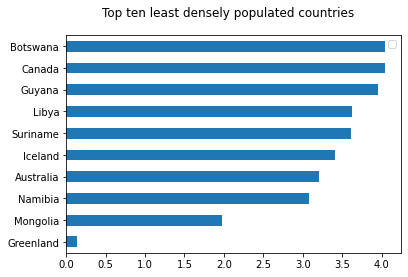

In [164]:
# a chart- OTHER STATS: least densely populated 

( df_world.groupby('location').population_density.max().reset_index()
 .sort_values('population_density', ascending = True).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'population_density')

plt.suptitle('Top ten least densely populated countries')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

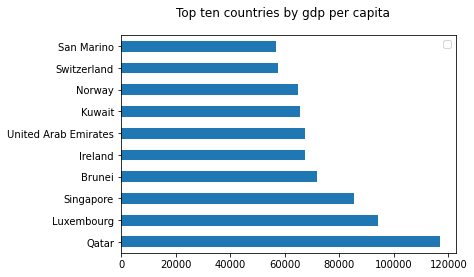

In [165]:
# a chart- OTHER STATS: highest GDP per capita

( df_world.groupby('location').gdp_per_capita.mean().reset_index()
 .sort_values('gdp_per_capita', ascending = False).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'gdp_per_capita')

plt.suptitle('Top ten countries by gdp per capita')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

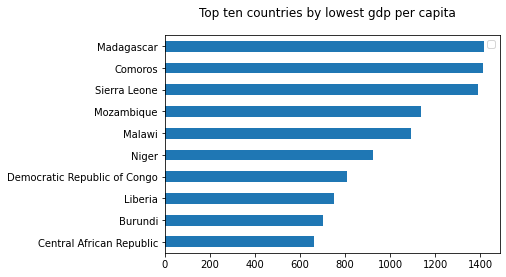

In [166]:
# a chart- OTHER STATS: lowest GDP per capita

( df_world.groupby('location').gdp_per_capita.mean().reset_index()
 .sort_values('gdp_per_capita', ascending = True).head(10) )\
 .plot(kind ='barh', x = 'location', y = 'gdp_per_capita')

plt.suptitle('Top ten countries by lowest gdp per capita')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

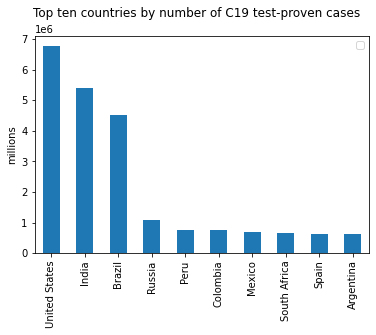

In [167]:
# a chart- TOTAL C19 CASES

( df_world.groupby('location').total_cases.max().reset_index()
 .sort_values('total_cases', ascending = False).head(10) ).plot(kind ='bar', x = 'location', y = 'total_cases')
plt.suptitle('Top ten countries by number of C19 test-proven cases')
plt.ylabel('millions')
plt.xlabel('')
plt.legend('')

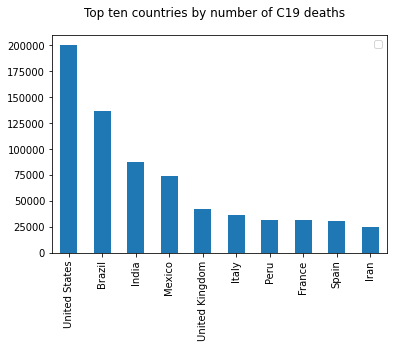

In [168]:
# a chart- TOTAL DEATHS

( df_world.groupby('location').total_deaths.max().reset_index()
 .sort_values('total_deaths', ascending = False).head(10) ).plot(kind ='bar', x = 'location', y = 'total_deaths')
plt.suptitle('Top ten countries by number of C19 deaths')
plt.ylabel('')
plt.xlabel('')
plt.legend('')
plt.show()

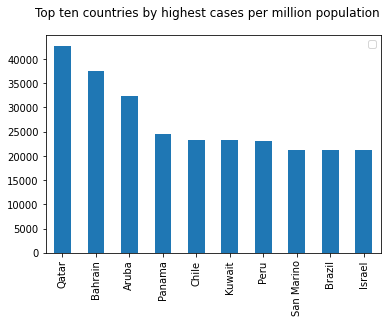

In [169]:
# a chart- TOTAL CASES PER MILLION POPULATION

( df_world.groupby('location').total_cases_per_million.max().reset_index()
       .sort_values('total_cases_per_million', ascending = False).head(10) )\
       .plot(kind ='bar', x = 'location', y = 'total_cases_per_million')

plt.suptitle('Top ten countries by highest cases per million population')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

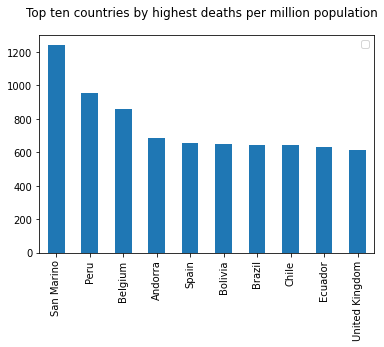

In [170]:
# a chart- TOTAL DEATHS PER MILLION POPULATION

( df_world.groupby('location').total_deaths_per_million.max().reset_index()
       .sort_values('total_deaths_per_million', ascending = False).head(10) )\
       .plot(kind ='bar', x = 'location', y = 'total_deaths_per_million')

plt.suptitle('Top ten countries by highest deaths per million population')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

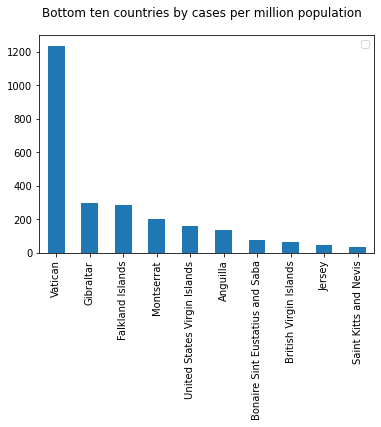

In [171]:
# a chart- LEAST CASES PER MILLION POPULATION

( df_world.groupby('location').total_cases_per_million.min().reset_index()
       .sort_values('total_cases_per_million', ascending = False).head(10) )\
       .plot(kind ='bar', x = 'location', y = 'total_cases_per_million')

plt.suptitle('Bottom ten countries by cases per million population')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

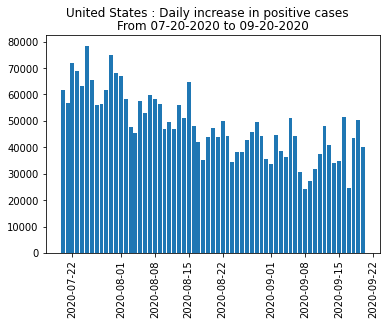

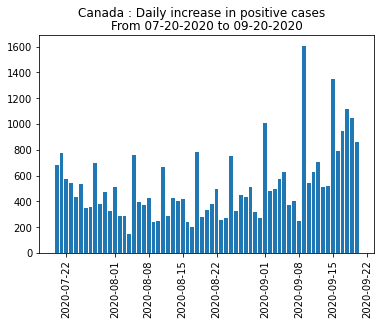

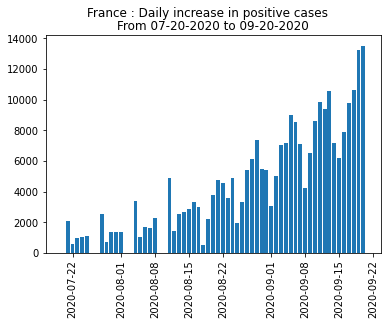

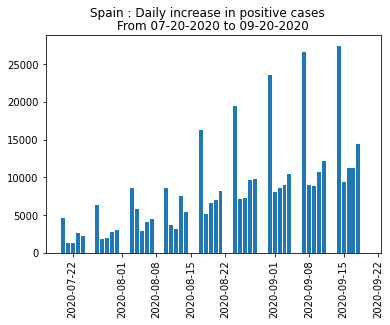

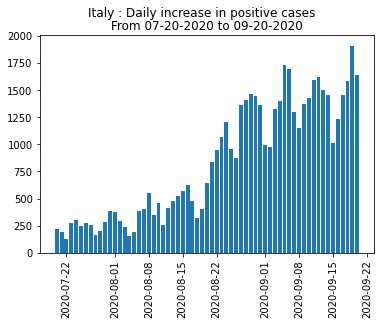

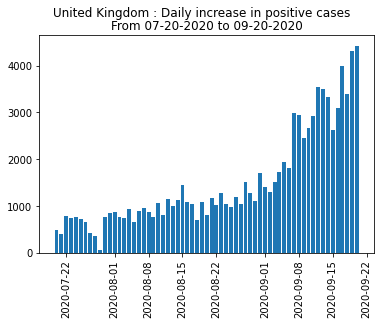

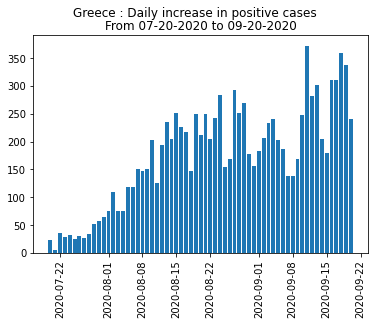

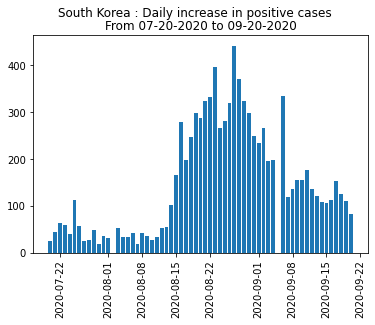

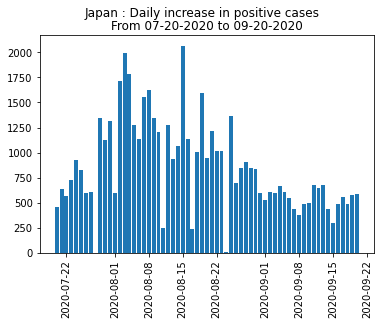

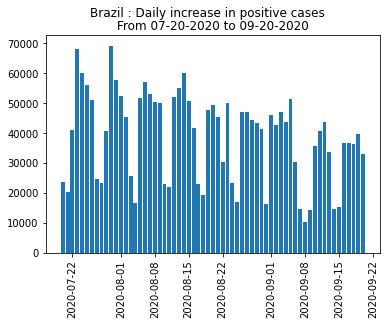

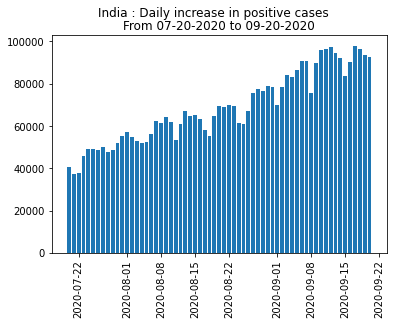

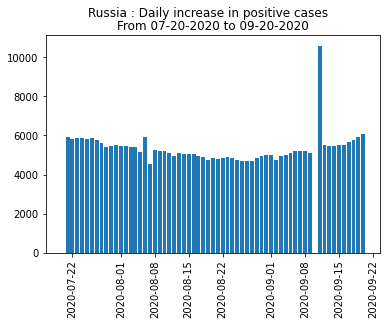

In [172]:
# Daily increase in positive cases  in countries- short term charts, loop them all through the  state_list


country_list = ['United States', 'Canada', 
                'France', 'Spain', 'Italy', 
                'United Kingdom', 'Greece',
                'South Korea', 'Japan',
                'Brazil', 'India', 'Russia']

for i in country_list:
    graph = 'Daily increase in positive cases'
    df = df_world[(df_world.location == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= twomonth) & (df.date <= tday)].date, 
            df[(df.date >= twomonth) & (df.date <= tday)].new_cases)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {twomonth} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()

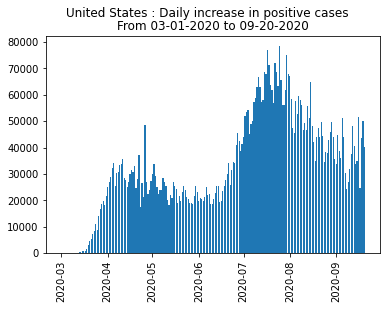

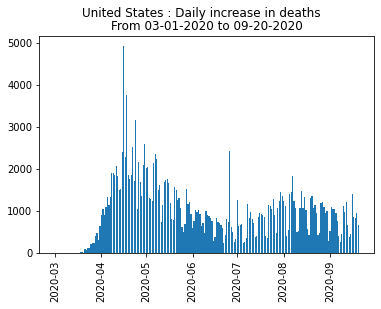

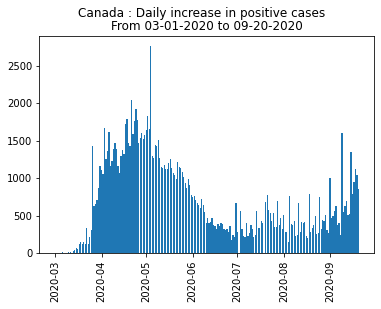

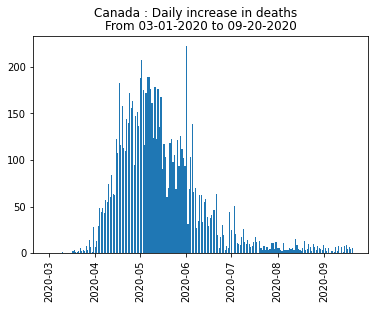

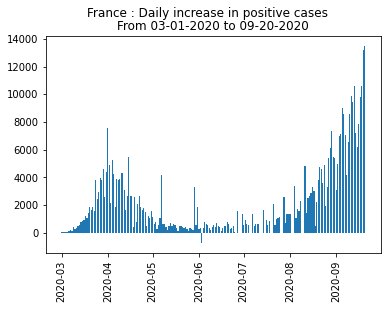

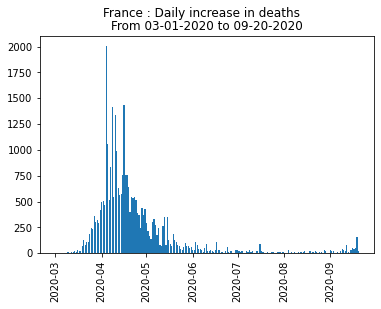

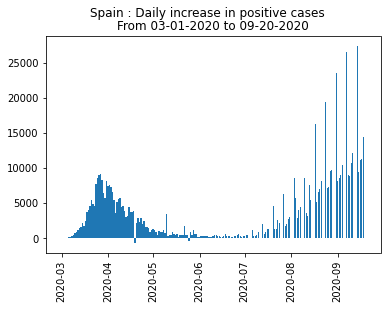

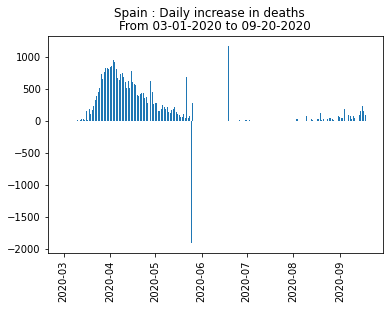

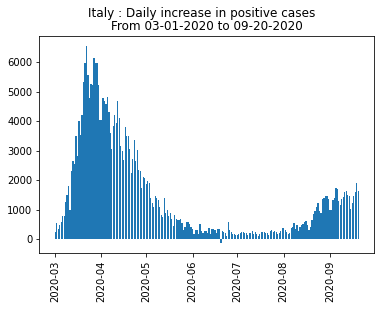

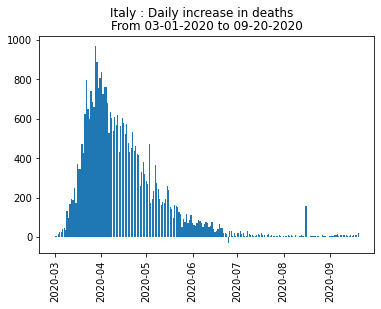

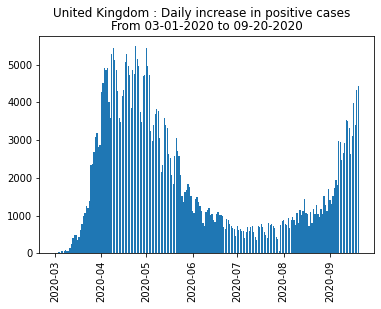

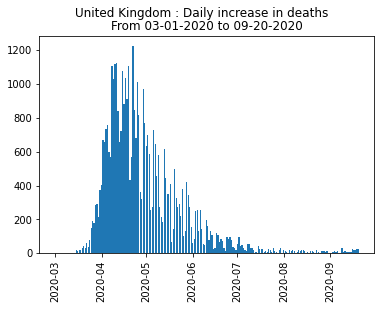

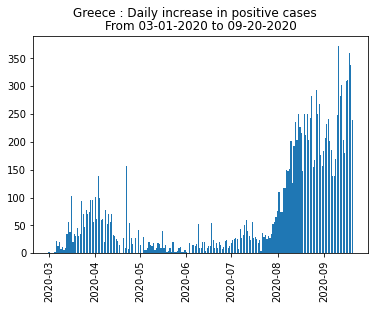

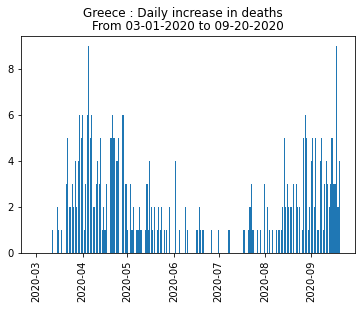

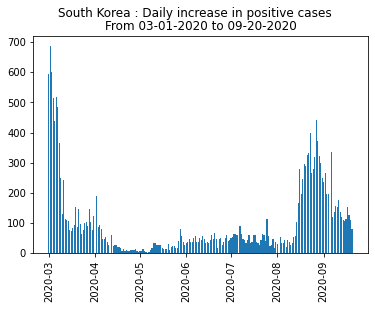

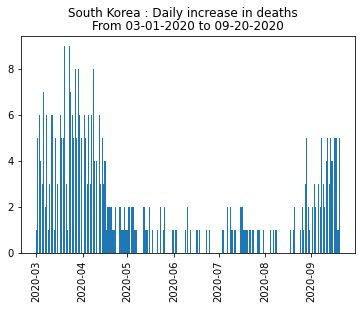

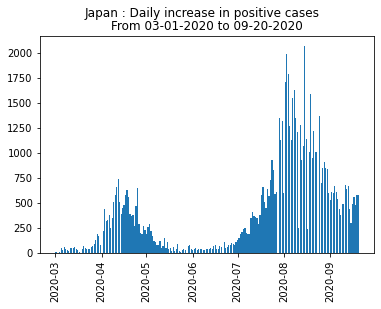

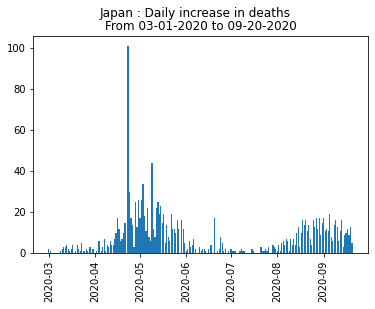

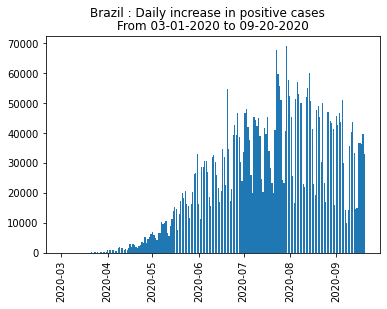

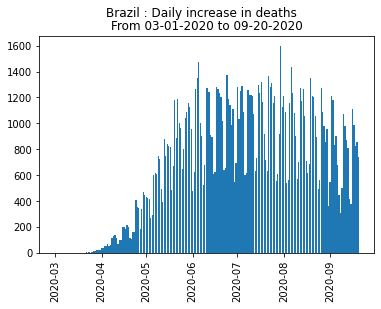

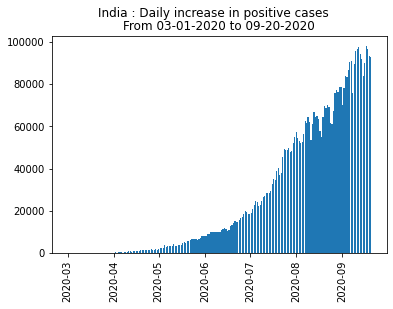

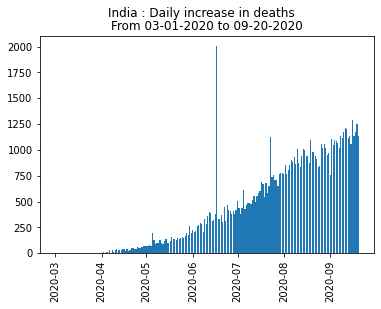

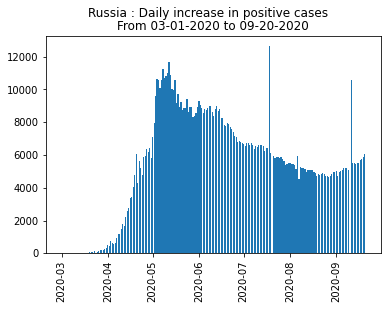

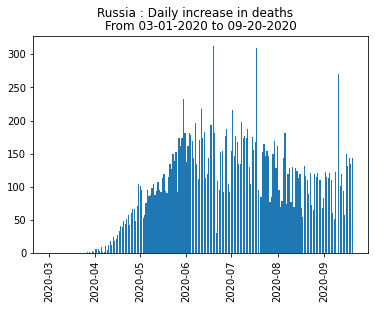

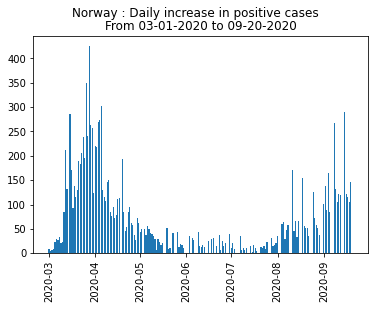

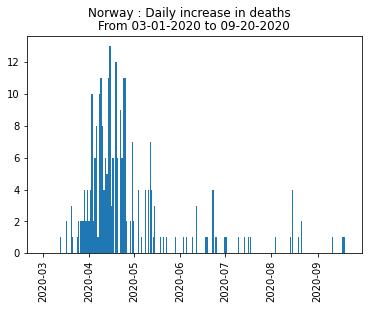

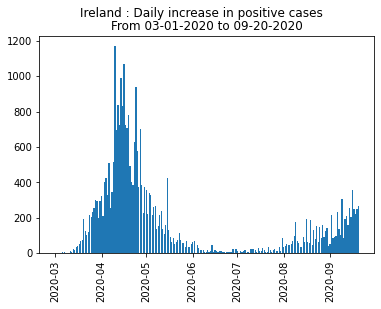

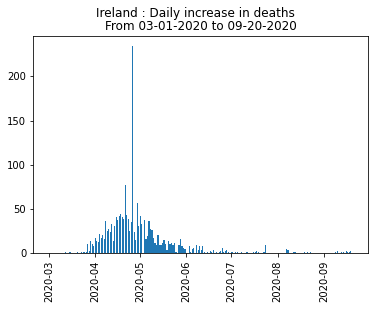

In [173]:
# Daily increase in positive cases  in countries- long term charts, loop them all through the  state_list

country_list = ['United States', 'Canada', 
                'France', 'Spain', 'Italy', 
                'United Kingdom', 'Greece',
                'South Korea', 'Japan',
                'Brazil', 'India', 'Russia', 
                'Norway', 'Ireland']

for i in country_list:
    graph = 'Daily increase in positive cases'
    df = df_world[(df_world.location == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= start_date) & (df.date <= tday)].date, 
            df[(df.date >= start_date) & (df.date <= tday)].new_cases)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {start_date} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()
    
    graph = 'Daily increase in deaths'
    df = df_world[(df_world.location == i)] #to make the code less complicated, I do this step first

    plt.bar(df[(df.date >= start_date) & (df.date <= tday)].date, 
            df[(df.date >= start_date) & (df.date <= tday)].new_deaths)

    plt.suptitle(f'{i} : {graph}')
    plt.title(f'From {start_date} to {tday}')
    plt.xticks(rotation = 90)   # this rotates it 90 degrees
    plt.show()

In [174]:
country_list = df_world.location.unique().tolist()

In [175]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 